In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 4


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 4


store_mean_0-lag0-offset4

 family_0-lag0-offset4

 city_0-lag0-offset4

 cluster_mv36-lag0-offset4

 cluster_0-lag0-offset4

 city_mv36-lag0-offset4

 item_mean_0-lag0-offset4

 class_0-lag0-offset4

 type_0-lag0-offset4

 type_mv36-lag0-offset4

 state_mv36-lag0-offset4

 class_mv36-lag0-offset4

 state_0-lag0-offset4

 family_mv36-lag0-offset4

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset4

 y_0-lag1-offset4

 y_0-lag2-offset4

 y_0-lag3-offset4

 y_0-lag4-offset4

 y_0-lag5-offset4

 y_0-lag6-offset4

 sales_ma_224-lag0-offset4

 sales_ma_14-lag0-offset4

 sales_ma_28-lag0-offset4

 sales_ma_112-lag0-offset4

 sales_ma_7-lag0-offset4

 sales_ma_3-lag0-offset4

 sales_ma_56-lag0-offset4

 sales_week_season_ma_p7-lag3-offset4

 sales_week_season_ma_p4-lag3-offset4

 sales_week_season_ma_p13-lag3-offset4

 sales_week_season_ma_p2-lag3-offset4

 sales_week_season_ma_p3-lag3-offset4

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 26.5 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset4  family_0-lag0-offset4  city_0-lag0-offset4  \
1683                   1.541992               1.696289             1.849609   
1684                   1.560547               1.639648             1.785156   
1685                   1.617188               1.627930             1.789062   
1686                   1.546875               1.627930             1.714844   
1687                   1.312500               1.722656             1.834961   
1688                   1.383789               1.694336             1.823242   
1689                   1.216797               1.751953             1.890625   

      cluster_mv36-lag0-offset4  cluster_0-lag0-offset4  \
1683                   1.645508                1.623047   
1684                   1.641602                1.563477   
1685                   1.641602                1.624023   
1686                   1.636719                1.526367   
1687                   1.636719                1.576172   
1688                   1.634766                1.574219   
1689                   1.631836                1.590820   

      city_mv36-lag0-offset4  item_mean_0-lag0-offset4  class_0-lag0-offset4  \
1683                1.876953                  1.683594              1.583008   
1684                1.872070                  1.707031              1.577148   
1685                1.869141                  1.795898              1.632812   
1686                1.864258                  2.003906              1.706055   
1687                1.866211                  2.191406              1.846680   
1688                1.865234                  2.173828              1.803711   
1689                1.862305                  1.844727              1.630859   

      type_0-lag0-offset4  type_mv36-lag0-offset4  state_mv36-lag0-offset4  \
1683             1.626953                1.658203                 1.875977   
1684             1.561523                1.654297                 1.871094   
1685             1.632812                1.654297                 1.868164   
1686             1.553711                1.650391                 1.863281   
1687             1.637695                1.652344                 1.865234   
1688             1.593750                1.650391                 1.864258   
1689             1.621094                1.648438                 1.861328   

      class_mv36-lag0-offset4  state_0-lag0-offset4  family_mv36-lag0-offset4  \
1683                 1.670898              1.851562                  1.722656   
1684                 1.669922              1.791016                  1.719727   
1685                 1.669922              1.790039                  1.716797   
1686                 1.671875              1.719727                  1.715820   
1687                 1.678711              1.834961                  1.717773   
1688                 1.679688              1.820312                  1.717773   
1689                 1.674805              1.885742                  1.715820   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset4  y_0-lag1-offset4  y_0-lag2-offset4  y_0-lag3-offset4  \
1683          2.484375          1.098633          2.080078          2.080078   
1684          2.302734          2.484375          1.098633          2.080078   
1685          2.080078          2.302734          2.484375          1.098633   
1686          2.773438          2.080078          2.302734          2.484375   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset4     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset4     0.0  0.0002  0.0002  0.0002   
2                     city_0-lag0-offset4     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset4     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset4     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset4     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset4  0.0844  0.0849   0.078  0.0827   
7                    class_0-lag0-offset4  0.0085  0.0093  0.0066  0.0071   
8                     type_0-lag0-offset4     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset4     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset4     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset4  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset4     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset4     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset4  0.5438  0.5549  0.5276  0.5249   
18                       y_0-lag1-offset4  0.5431  0.5438  0.5549  0.5276   
19                       y_0-lag2-offset4  0.5308  0.5431  0.5438  0.5549   
20                       y_0-lag3-offset4  0.4994  0.5308  0.5431  0.5438   
21                       y_0-lag4-offset4  0.4992  0.4994  0.5308  0.5431   
22                       y_0-lag5-offset4  0.5295  0.4992  0.4994  0.5308   
23                       y_0-lag6-offset4  0.5382  0.5295  0.4992  0.4994   
24              sales_ma_224-lag0-offset4  0.5027  0.5013  0.5006  0.5002   
25               sales_ma_14-lag0-offset4  0.5084   0.508  0.5072  0.5092   
26               sales_ma_28-lag0-offset4  0.5029  0.5026  0.5017  0.5029   
27              sales_ma_112-lag0-offset4  0.4898  0.4897  0.4897  0.4898   
28                sales_ma_7-lag0-offset4  0.5014  0.5043  0.5043  0.5092   
29                sales_ma_3-lag0-offset4  0.5264  0.5347   0.529  0.5213   
30               sales_ma_56-lag0-offset4  0.4944  0.4946  0.4945  0.4955   
31   sales_week_season_ma_p7-lag3-offset4     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag3-offset4     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag3-offset4     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag3-offset4  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag3-offset4     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0798  0.0824  
7   0.0068  0.0073  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5208  0.5359  
18  0.5249  0.5208  
19  0.5276  0.5249  
20  0.5549  0.5276  
21  0.5438  0.5549  
22  0.5431  0.5438  
23  0.5308  0.5431  
24  0.4986  0.4985  
25  0.5118  0.5132  
26  0.5039  0.5041  
27  0.4901  0.4905  
28  0.5128  0.5133  
29  0.5104  0.5127  
30  0.4961  0.4962  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2471:50:03 - loss: 1.3048

     9216/316424880 [..............................] - ETA: 275:08:25 - loss: 0.6767 

    17408/316424880 [..............................] - ETA: 145:56:04 - loss: 0.5051

    25600/316424880 [..............................] - ETA: 99:25:07 - loss: 0.4411 

    33792/316424880 [..............................] - ETA: 75:27:29 - loss: 0.3961

    41984/316424880 [..............................] - ETA: 60:50:35 - loss: 0.3696

    50176/316424880 [..............................] - ETA: 51:00:06 - loss: 0.3516

    58368/316424880 [..............................] - ETA: 43:55:26 - loss: 0.3411

    66560/316424880 [..............................] - ETA: 38:35:14 - loss: 0.3291

    74752/316424880 [..............................] - ETA: 34:25:24 - loss: 0.3217

    82944/316424880 [..............................] - ETA: 31:04:41 - loss: 0.3184

    91136/316424880 [..............................] - ETA: 28:20:03 - loss: 0.3131

    99328/316424880 [..............................] - ETA: 26:02:38 - loss: 0.3092

   107520/316424880 [..............................] - ETA: 24:06:11 - loss: 0.3068

   115712/316424880 [..............................] - ETA: 22:26:11 - loss: 0.3035

   123904/316424880 [..............................] - ETA: 20:59:27 - loss: 0.3035

   132096/316424880 [..............................] - ETA: 19:43:24 - loss: 0.3019

   140288/316424880 [..............................] - ETA: 18:36:14 - loss: 0.2996

   148480/316424880 [..............................] - ETA: 17:36:32 - loss: 0.2966

   156672/316424880 [..............................] - ETA: 16:43:06 - loss: 0.2949

   164864/316424880 [..............................] - ETA: 15:54:56 - loss: 0.2938

   173056/316424880 [..............................] - ETA: 15:11:20 - loss: 0.2921

   181248/316424880 [..............................] - ETA: 14:31:35 - loss: 0.2895

   189440/316424880 [..............................] - ETA: 13:55:22 - loss: 0.2883

   197632/316424880 [..............................] - ETA: 13:22:08 - loss: 0.2865

   205824/316424880 [..............................] - ETA: 12:51:29 - loss: 0.2844

   214016/316424880 [..............................] - ETA: 12:23:12 - loss: 0.2838

   222208/316424880 [..............................] - ETA: 11:57:04 - loss: 0.2824

   230400/316424880 [..............................] - ETA: 11:32:45 - loss: 0.2805

   238592/316424880 [..............................] - ETA: 11:10:08 - loss: 0.2786

   246784/316424880 [..............................] - ETA: 10:48:58 - loss: 0.2788

   254976/316424880 [..............................] - ETA: 10:29:12 - loss: 0.2777

   263168/316424880 [..............................] - ETA: 10:10:41 - loss: 0.2774

   271360/316424880 [..............................] - ETA: 9:53:18 - loss: 0.2768 

   279552/316424880 [..............................] - ETA: 9:36:54 - loss: 0.2758

   287744/316424880 [..............................] - ETA: 9:21:28 - loss: 0.2748

   295936/316424880 [..............................] - ETA: 9:06:50 - loss: 0.2741

   304128/316424880 [..............................] - ETA: 8:53:01 - loss: 0.2736

   312320/316424880 [..............................] - ETA: 8:39:56 - loss: 0.2726

   320512/316424880 [..............................] - ETA: 8:27:28 - loss: 0.2719

   328704/316424880 [..............................] - ETA: 8:15:40 - loss: 0.2716

   336896/316424880 [..............................] - ETA: 8:04:26 - loss: 0.2710

   345088/316424880 [..............................] - ETA: 7:53:42 - loss: 0.2706

   353280/316424880 [..............................] - ETA: 7:43:30 - loss: 0.2699

   361472/316424880 [..............................] - ETA: 7:33:45 - loss: 0.2691

   369664/316424880 [..............................] - ETA: 7:24:28 - loss: 0.2685

   377856/316424880 [..............................] - ETA: 7:15:34 - loss: 0.2680

   386048/316424880 [..............................] - ETA: 7:07:01 - loss: 0.2675

   394240/316424880 [..............................] - ETA: 6:58:51 - loss: 0.2668

   402432/316424880 [..............................] - ETA: 6:51:03 - loss: 0.2657

   410624/316424880 [..............................] - ETA: 6:43:30 - loss: 0.2653

   418816/316424880 [..............................] - ETA: 6:36:15 - loss: 0.2651

   427008/316424880 [..............................] - ETA: 6:29:19 - loss: 0.2648

   435200/316424880 [..............................] - ETA: 6:22:37 - loss: 0.2644

   443392/316424880 [..............................] - ETA: 6:16:09 - loss: 0.2640

   451584/316424880 [..............................] - ETA: 6:09:57 - loss: 0.2633

   459776/316424880 [..............................] - ETA: 6:03:56 - loss: 0.2632

   465920/316424880 [..............................] - ETA: 5:59:51 - loss: 0.2629

   473088/316424880 [..............................] - ETA: 5:54:58 - loss: 0.2629

   480256/316424880 [..............................] - ETA: 5:50:14 - loss: 0.2629

   488448/316424880 [..............................] - ETA: 5:44:55 - loss: 0.2625

   496640/316424880 [..............................] - ETA: 5:39:47 - loss: 0.2622

   504832/316424880 [..............................] - ETA: 5:34:48 - loss: 0.2614

   513024/316424880 [..............................] - ETA: 5:29:58 - loss: 0.2610

   521216/316424880 [..............................] - ETA: 5:25:17 - loss: 0.2609

   529408/316424880 [..............................] - ETA: 5:20:47 - loss: 0.2606

   537600/316424880 [..............................] - ETA: 5:16:25 - loss: 0.2602

   545792/316424880 [..............................] - ETA: 5:12:10 - loss: 0.2597

   553984/316424880 [..............................] - ETA: 5:08:03 - loss: 0.2593

   562176/316424880 [..............................] - ETA: 5:04:04 - loss: 0.2593

   570368/316424880 [..............................] - ETA: 5:00:11 - loss: 0.2592

   578560/316424880 [..............................] - ETA: 4:56:23 - loss: 0.2591

   586752/316424880 [..............................] - ETA: 4:52:44 - loss: 0.2589

   594944/316424880 [..............................] - ETA: 4:49:10 - loss: 0.2590

   603136/316424880 [..............................] - ETA: 4:45:42 - loss: 0.2589

   611328/316424880 [..............................] - ETA: 4:42:19 - loss: 0.2590

   619520/316424880 [..............................] - ETA: 4:39:02 - loss: 0.2589

   627712/316424880 [..............................] - ETA: 4:35:50 - loss: 0.2587

   635904/316424880 [..............................] - ETA: 4:32:43 - loss: 0.2587

   644096/316424880 [..............................] - ETA: 4:29:40 - loss: 0.2586

   652288/316424880 [..............................] - ETA: 4:26:43 - loss: 0.2584

   660480/316424880 [..............................] - ETA: 4:23:48 - loss: 0.2582

   668672/316424880 [..............................] - ETA: 4:21:00 - loss: 0.2580

   676864/316424880 [..............................] - ETA: 4:18:15 - loss: 0.2577

   685056/316424880 [..............................] - ETA: 4:15:34 - loss: 0.2577

   692224/316424880 [..............................] - ETA: 4:13:18 - loss: 0.2575

   700416/316424880 [..............................] - ETA: 4:10:44 - loss: 0.2575

   708608/316424880 [..............................] - ETA: 4:08:14 - loss: 0.2573

   716800/316424880 [..............................] - ETA: 4:05:47 - loss: 0.2572

   724992/316424880 [..............................] - ETA: 4:03:22 - loss: 0.2570

   733184/316424880 [..............................] - ETA: 4:01:02 - loss: 0.2567

   741376/316424880 [..............................] - ETA: 3:58:44 - loss: 0.2566

   749568/316424880 [..............................] - ETA: 3:56:30 - loss: 0.2565

   757760/316424880 [..............................] - ETA: 3:54:19 - loss: 0.2562

   765952/316424880 [..............................] - ETA: 3:52:10 - loss: 0.2561

   774144/316424880 [..............................] - ETA: 3:50:05 - loss: 0.2561

   782336/316424880 [..............................] - ETA: 3:48:01 - loss: 0.2560

   790528/316424880 [..............................] - ETA: 3:46:01 - loss: 0.2559

   798720/316424880 [..............................] - ETA: 3:44:02 - loss: 0.2558

   806912/316424880 [..............................] - ETA: 3:42:06 - loss: 0.2557

   815104/316424880 [..............................] - ETA: 3:40:12 - loss: 0.2554

   823296/316424880 [..............................] - ETA: 3:38:21 - loss: 0.2554

   831488/316424880 [..............................] - ETA: 3:36:33 - loss: 0.2553

   839680/316424880 [..............................] - ETA: 3:34:45 - loss: 0.2550

   847872/316424880 [..............................] - ETA: 3:33:00 - loss: 0.2548

   856064/316424880 [..............................] - ETA: 3:31:17 - loss: 0.2546

   864256/316424880 [..............................] - ETA: 3:29:36 - loss: 0.2545

   872448/316424880 [..............................] - ETA: 3:27:57 - loss: 0.2544

   880640/316424880 [..............................] - ETA: 3:26:20 - loss: 0.2543

   888832/316424880 [..............................] - ETA: 3:24:45 - loss: 0.2543

   897024/316424880 [..............................] - ETA: 3:23:10 - loss: 0.2541

   905216/316424880 [..............................] - ETA: 3:21:37 - loss: 0.2540

   913408/316424880 [..............................] - ETA: 3:20:07 - loss: 0.2539

   921600/316424880 [..............................] - ETA: 3:18:39 - loss: 0.2538

   929792/316424880 [..............................] - ETA: 3:17:12 - loss: 0.2537

   937984/316424880 [..............................] - ETA: 3:15:47 - loss: 0.2537

   946176/316424880 [..............................] - ETA: 3:14:23 - loss: 0.2536

   954368/316424880 [..............................] - ETA: 3:12:59 - loss: 0.2534

   962560/316424880 [..............................] - ETA: 3:11:39 - loss: 0.2535

   970752/316424880 [..............................] - ETA: 3:10:18 - loss: 0.2534

   978944/316424880 [..............................] - ETA: 3:09:00 - loss: 0.2533

   987136/316424880 [..............................] - ETA: 3:07:43 - loss: 0.2533

   995328/316424880 [..............................] - ETA: 3:06:27 - loss: 0.2533

  1003520/316424880 [..............................] - ETA: 3:05:12 - loss: 0.2532

  1011712/316424880 [..............................] - ETA: 3:03:58 - loss: 0.2533

  1019904/316424880 [..............................] - ETA: 3:02:45 - loss: 0.2533

  1028096/316424880 [..............................] - ETA: 3:01:34 - loss: 0.2532

  1036288/316424880 [..............................] - ETA: 3:00:24 - loss: 0.2531

  1043456/316424880 [..............................] - ETA: 2:59:26 - loss: 0.2529

  1051648/316424880 [..............................] - ETA: 2:58:18 - loss: 0.2528

  1059840/316424880 [..............................] - ETA: 2:57:11 - loss: 0.2528

  1068032/316424880 [..............................] - ETA: 2:56:05 - loss: 0.2528

  1076224/316424880 [..............................] - ETA: 2:55:00 - loss: 0.2528

  1084416/316424880 [..............................] - ETA: 2:53:56 - loss: 0.2527

  1092608/316424880 [..............................] - ETA: 2:52:53 - loss: 0.2526

  1100800/316424880 [..............................] - ETA: 2:51:50 - loss: 0.2525

  1108992/316424880 [..............................] - ETA: 2:50:49 - loss: 0.2524

  1117184/316424880 [..............................] - ETA: 2:49:48 - loss: 0.2523

  1125376/316424880 [..............................] - ETA: 2:48:48 - loss: 0.2522

  1133568/316424880 [..............................] - ETA: 2:47:50 - loss: 0.2522

  1141760/316424880 [..............................] - ETA: 2:46:53 - loss: 0.2521

  1149952/316424880 [..............................] - ETA: 2:45:56 - loss: 0.2521

  1158144/316424880 [..............................] - ETA: 2:45:00 - loss: 0.2520

  1166336/316424880 [..............................] - ETA: 2:44:05 - loss: 0.2520

  1174528/316424880 [..............................] - ETA: 2:43:10 - loss: 0.2520

  1182720/316424880 [..............................] - ETA: 2:42:16 - loss: 0.2519

  1190912/316424880 [..............................] - ETA: 2:41:24 - loss: 0.2518

  1199104/316424880 [..............................] - ETA: 2:40:30 - loss: 0.2517

  1207296/316424880 [..............................] - ETA: 2:39:40 - loss: 0.2516

  1215488/316424880 [..............................] - ETA: 2:38:49 - loss: 0.2516

  1223680/316424880 [..............................] - ETA: 2:37:59 - loss: 0.2515

  1231872/316424880 [..............................] - ETA: 2:37:09 - loss: 0.2514

  1240064/316424880 [..............................] - ETA: 2:36:20 - loss: 0.2513

  1248256/316424880 [..............................] - ETA: 2:35:31 - loss: 0.2513

  1256448/316424880 [..............................] - ETA: 2:34:44 - loss: 0.2512

  1264640/316424880 [..............................] - ETA: 2:33:56 - loss: 0.2511

  1272832/316424880 [..............................] - ETA: 2:33:10 - loss: 0.2509

  1281024/316424880 [..............................] - ETA: 2:32:24 - loss: 0.2508

  1289216/316424880 [..............................] - ETA: 2:31:39 - loss: 0.2507

  1297408/316424880 [..............................] - ETA: 2:30:54 - loss: 0.2506

  1305600/316424880 [..............................] - ETA: 2:30:10 - loss: 0.2506

  1313792/316424880 [..............................] - ETA: 2:29:26 - loss: 0.2505

  1321984/316424880 [..............................] - ETA: 2:28:43 - loss: 0.2504

  1330176/316424880 [..............................] - ETA: 2:28:00 - loss: 0.2503

  1338368/316424880 [..............................] - ETA: 2:27:19 - loss: 0.2502

  1346560/316424880 [..............................] - ETA: 2:26:37 - loss: 0.2502

  1354752/316424880 [..............................] - ETA: 2:25:56 - loss: 0.2501

  1361920/316424880 [..............................] - ETA: 2:25:21 - loss: 0.2500

  1370112/316424880 [..............................] - ETA: 2:24:40 - loss: 0.2499

  1378304/316424880 [..............................] - ETA: 2:24:01 - loss: 0.2500

  1386496/316424880 [..............................] - ETA: 2:23:21 - loss: 0.2500

  1394688/316424880 [..............................] - ETA: 2:22:42 - loss: 0.2499

  1402880/316424880 [..............................] - ETA: 2:22:04 - loss: 0.2499

  1411072/316424880 [..............................] - ETA: 2:21:26 - loss: 0.2499

  1419264/316424880 [..............................] - ETA: 2:20:48 - loss: 0.2498

  1427456/316424880 [..............................] - ETA: 2:20:11 - loss: 0.2497

  1435648/316424880 [..............................] - ETA: 2:19:35 - loss: 0.2498

  1443840/316424880 [..............................] - ETA: 2:18:59 - loss: 0.2498

  1452032/316424880 [..............................] - ETA: 2:18:24 - loss: 0.2498

  1460224/316424880 [..............................] - ETA: 2:17:48 - loss: 0.2497

  1468416/316424880 [..............................] - ETA: 2:17:13 - loss: 0.2496

  1476608/316424880 [..............................] - ETA: 2:16:38 - loss: 0.2495

  1484800/316424880 [..............................] - ETA: 2:16:04 - loss: 0.2495

  1492992/316424880 [..............................] - ETA: 2:15:30 - loss: 0.2494

  1501184/316424880 [..............................] - ETA: 2:14:57 - loss: 0.2494

  1509376/316424880 [..............................] - ETA: 2:14:24 - loss: 0.2493

  1517568/316424880 [..............................] - ETA: 2:13:51 - loss: 0.2494

  1525760/316424880 [..............................] - ETA: 2:13:18 - loss: 0.2494

  1533952/316424880 [..............................] - ETA: 2:12:47 - loss: 0.2495

  1542144/316424880 [..............................] - ETA: 2:12:15 - loss: 0.2494

  1550336/316424880 [..............................] - ETA: 2:11:43 - loss: 0.2494

  1558528/316424880 [..............................] - ETA: 2:11:11 - loss: 0.2493

  1566720/316424880 [..............................] - ETA: 2:10:40 - loss: 0.2493

  1574912/316424880 [..............................] - ETA: 2:10:10 - loss: 0.2492

  1583104/316424880 [..............................] - ETA: 2:09:39 - loss: 0.2492

  1591296/316424880 [..............................] - ETA: 2:09:09 - loss: 0.2491

  1599488/316424880 [..............................] - ETA: 2:08:39 - loss: 0.2491

  1607680/316424880 [..............................] - ETA: 2:08:10 - loss: 0.2492

  1615872/316424880 [..............................] - ETA: 2:07:42 - loss: 0.2492

  1624064/316424880 [..............................] - ETA: 2:07:13 - loss: 0.2492

  1632256/316424880 [..............................] - ETA: 2:06:44 - loss: 0.2492

  1640448/316424880 [..............................] - ETA: 2:06:16 - loss: 0.2491

  1648640/316424880 [..............................] - ETA: 2:05:48 - loss: 0.2492

  1656832/316424880 [..............................] - ETA: 2:05:21 - loss: 0.2492

  1665024/316424880 [..............................] - ETA: 2:04:54 - loss: 0.2491

  1673216/316424880 [..............................] - ETA: 2:04:27 - loss: 0.2490

  1681408/316424880 [..............................] - ETA: 2:04:01 - loss: 0.2490

  1689600/316424880 [..............................] - ETA: 2:03:35 - loss: 0.2490

  1697792/316424880 [..............................] - ETA: 2:03:09 - loss: 0.2489

  1705984/316424880 [..............................] - ETA: 2:02:42 - loss: 0.2489

  1714176/316424880 [..............................] - ETA: 2:02:17 - loss: 0.2488

  1722368/316424880 [..............................] - ETA: 2:01:51 - loss: 0.2488

  1730560/316424880 [..............................] - ETA: 2:01:26 - loss: 0.2489

  1738752/316424880 [..............................] - ETA: 2:01:01 - loss: 0.2488

  1747968/316424880 [..............................] - ETA: 2:00:33 - loss: 0.2487

  1756160/316424880 [..............................] - ETA: 2:00:08 - loss: 0.2486

  1764352/316424880 [..............................] - ETA: 1:59:44 - loss: 0.2487

  1771520/316424880 [..............................] - ETA: 1:59:24 - loss: 0.2486

  1780736/316424880 [..............................] - ETA: 1:58:56 - loss: 0.2486

  1788928/316424880 [..............................] - ETA: 1:58:33 - loss: 0.2485

  1797120/316424880 [..............................] - ETA: 1:58:09 - loss: 0.2485

  1805312/316424880 [..............................] - ETA: 1:57:46 - loss: 0.2485

  1813504/316424880 [..............................] - ETA: 1:57:23 - loss: 0.2484

  1821696/316424880 [..............................] - ETA: 1:57:01 - loss: 0.2485

  1829888/316424880 [..............................] - ETA: 1:56:38 - loss: 0.2484

  1838080/316424880 [..............................] - ETA: 1:56:15 - loss: 0.2485

  1846272/316424880 [..............................] - ETA: 1:55:54 - loss: 0.2484

  1854464/316424880 [..............................] - ETA: 1:55:32 - loss: 0.2485

  1862656/316424880 [..............................] - ETA: 1:55:10 - loss: 0.2483

  1870848/316424880 [..............................] - ETA: 1:54:48 - loss: 0.2484

  1879040/316424880 [..............................] - ETA: 1:54:27 - loss: 0.2483

  1887232/316424880 [..............................] - ETA: 1:54:06 - loss: 0.2483

  1895424/316424880 [..............................] - ETA: 1:53:44 - loss: 0.2482

  1903616/316424880 [..............................] - ETA: 1:53:23 - loss: 0.2482

  1911808/316424880 [..............................] - ETA: 1:53:03 - loss: 0.2482

  1920000/316424880 [..............................] - ETA: 1:52:42 - loss: 0.2481

  1928192/316424880 [..............................] - ETA: 1:52:22 - loss: 0.2481

  1936384/316424880 [..............................] - ETA: 1:52:02 - loss: 0.2481

  1944576/316424880 [..............................] - ETA: 1:51:42 - loss: 0.2481

  1952768/316424880 [..............................] - ETA: 1:51:23 - loss: 0.2480

  1960960/316424880 [..............................] - ETA: 1:51:03 - loss: 0.2479

  1969152/316424880 [..............................] - ETA: 1:50:44 - loss: 0.2479

  1977344/316424880 [..............................] - ETA: 1:50:24 - loss: 0.2479

  1984512/316424880 [..............................] - ETA: 1:50:08 - loss: 0.2479

  1992704/316424880 [..............................] - ETA: 1:49:49 - loss: 0.2478

  2000896/316424880 [..............................] - ETA: 1:49:31 - loss: 0.2478

  2009088/316424880 [..............................] - ETA: 1:49:12 - loss: 0.2477

  2017280/316424880 [..............................] - ETA: 1:48:53 - loss: 0.2476

  2025472/316424880 [..............................] - ETA: 1:48:35 - loss: 0.2476

  2033664/316424880 [..............................] - ETA: 1:48:16 - loss: 0.2475

  2041856/316424880 [..............................] - ETA: 1:47:58 - loss: 0.2474

  2050048/316424880 [..............................] - ETA: 1:47:40 - loss: 0.2474

  2058240/316424880 [..............................] - ETA: 1:47:23 - loss: 0.2475

  2066432/316424880 [..............................] - ETA: 1:47:05 - loss: 0.2475

  2074624/316424880 [..............................] - ETA: 1:46:47 - loss: 0.2475

  2082816/316424880 [..............................] - ETA: 1:46:30 - loss: 0.2474

  2091008/316424880 [..............................] - ETA: 1:46:13 - loss: 0.2474

  2099200/316424880 [..............................] - ETA: 1:45:56 - loss: 0.2474

  2107392/316424880 [..............................] - ETA: 1:45:39 - loss: 0.2474

  2115584/316424880 [..............................] - ETA: 1:45:22 - loss: 0.2474

  2123776/316424880 [..............................] - ETA: 1:45:05 - loss: 0.2474

  2131968/316424880 [..............................] - ETA: 1:44:48 - loss: 0.2473

  2140160/316424880 [..............................] - ETA: 1:44:32 - loss: 0.2473

  2148352/316424880 [..............................] - ETA: 1:44:16 - loss: 0.2473

  2156544/316424880 [..............................] - ETA: 1:44:00 - loss: 0.2473

  2164736/316424880 [..............................] - ETA: 1:43:44 - loss: 0.2472

  2172928/316424880 [..............................] - ETA: 1:43:28 - loss: 0.2472

  2181120/316424880 [..............................] - ETA: 1:43:12 - loss: 0.2472

  2189312/316424880 [..............................] - ETA: 1:42:56 - loss: 0.2472

  2197504/316424880 [..............................] - ETA: 1:42:41 - loss: 0.2472

  2205696/316424880 [..............................] - ETA: 1:42:25 - loss: 0.2471

  2213888/316424880 [..............................] - ETA: 1:42:10 - loss: 0.2471

  2222080/316424880 [..............................] - ETA: 1:41:54 - loss: 0.2471

  2230272/316424880 [..............................] - ETA: 1:41:39 - loss: 0.2471

  2238464/316424880 [..............................] - ETA: 1:41:24 - loss: 0.2470

  2246656/316424880 [..............................] - ETA: 1:41:09 - loss: 0.2470

  2254848/316424880 [..............................] - ETA: 1:40:55 - loss: 0.2469

  2263040/316424880 [..............................] - ETA: 1:40:40 - loss: 0.2469

  2271232/316424880 [..............................] - ETA: 1:40:26 - loss: 0.2468

  2279424/316424880 [..............................] - ETA: 1:40:11 - loss: 0.2468

  2287616/316424880 [..............................] - ETA: 1:39:57 - loss: 0.2467

  2295808/316424880 [..............................] - ETA: 1:39:43 - loss: 0.2467

  2304000/316424880 [..............................] - ETA: 1:39:28 - loss: 0.2466

  2312192/316424880 [..............................] - ETA: 1:39:14 - loss: 0.2467

  2320384/316424880 [..............................] - ETA: 1:39:00 - loss: 0.2466

  2328576/316424880 [..............................] - ETA: 1:38:46 - loss: 0.2467

  2336768/316424880 [..............................] - ETA: 1:38:32 - loss: 0.2466

  2344960/316424880 [..............................] - ETA: 1:38:18 - loss: 0.2466

  2353152/316424880 [..............................] - ETA: 1:38:04 - loss: 0.2466

  2361344/316424880 [..............................] - ETA: 1:37:51 - loss: 0.2465

  2369536/316424880 [..............................] - ETA: 1:37:37 - loss: 0.2465

  2377728/316424880 [..............................] - ETA: 1:37:24 - loss: 0.2464

  2385920/316424880 [..............................] - ETA: 1:37:10 - loss: 0.2465

  2394112/316424880 [..............................] - ETA: 1:36:57 - loss: 0.2464

  2402304/316424880 [..............................] - ETA: 1:36:44 - loss: 0.2464

  2410496/316424880 [..............................] - ETA: 1:36:31 - loss: 0.2464

  2418688/316424880 [..............................] - ETA: 1:36:18 - loss: 0.2463

  2426880/316424880 [..............................] - ETA: 1:36:05 - loss: 0.2463

  2435072/316424880 [..............................] - ETA: 1:35:53 - loss: 0.2463

  2443264/316424880 [..............................] - ETA: 1:35:40 - loss: 0.2463

  2451456/316424880 [..............................] - ETA: 1:35:28 - loss: 0.2463

  2459648/316424880 [..............................] - ETA: 1:35:15 - loss: 0.2462

  2467840/316424880 [..............................] - ETA: 1:35:03 - loss: 0.2462

  2476032/316424880 [..............................] - ETA: 1:34:51 - loss: 0.2462

  2484224/316424880 [..............................] - ETA: 1:34:38 - loss: 0.2461

  2492416/316424880 [..............................] - ETA: 1:34:26 - loss: 0.2461

  2500608/316424880 [..............................] - ETA: 1:34:14 - loss: 0.2461

  2508800/316424880 [..............................] - ETA: 1:34:02 - loss: 0.2461

  2516992/316424880 [..............................] - ETA: 1:33:50 - loss: 0.2461

  2525184/316424880 [..............................] - ETA: 1:33:38 - loss: 0.2460

  2533376/316424880 [..............................] - ETA: 1:33:26 - loss: 0.2460

  2541568/316424880 [..............................] - ETA: 1:33:15 - loss: 0.2460

  2549760/316424880 [..............................] - ETA: 1:33:03 - loss: 0.2459

  2557952/316424880 [..............................] - ETA: 1:32:52 - loss: 0.2459

  2566144/316424880 [..............................] - ETA: 1:32:40 - loss: 0.2458

  2574336/316424880 [..............................] - ETA: 1:32:29 - loss: 0.2458

  2582528/316424880 [..............................] - ETA: 1:32:17 - loss: 0.2458

  2590720/316424880 [..............................] - ETA: 1:32:06 - loss: 0.2458

  2598912/316424880 [..............................] - ETA: 1:31:55 - loss: 0.2458

  2607104/316424880 [..............................] - ETA: 1:31:44 - loss: 0.2457

  2615296/316424880 [..............................] - ETA: 1:31:33 - loss: 0.2457

  2623488/316424880 [..............................] - ETA: 1:31:22 - loss: 0.2457

  2631680/316424880 [..............................] - ETA: 1:31:11 - loss: 0.2457

  2639872/316424880 [..............................] - ETA: 1:31:01 - loss: 0.2456

  2648064/316424880 [..............................] - ETA: 1:30:50 - loss: 0.2456

  2656256/316424880 [..............................] - ETA: 1:30:39 - loss: 0.2456

  2664448/316424880 [..............................] - ETA: 1:30:28 - loss: 0.2455

  2672640/316424880 [..............................] - ETA: 1:30:18 - loss: 0.2455

  2680832/316424880 [..............................] - ETA: 1:30:07 - loss: 0.2455

  2689024/316424880 [..............................] - ETA: 1:29:57 - loss: 0.2455

  2697216/316424880 [..............................] - ETA: 1:29:47 - loss: 0.2455

  2705408/316424880 [..............................] - ETA: 1:29:36 - loss: 0.2454

  2713600/316424880 [..............................] - ETA: 1:29:26 - loss: 0.2454

  2721792/316424880 [..............................] - ETA: 1:29:16 - loss: 0.2454

  2729984/316424880 [..............................] - ETA: 1:29:06 - loss: 0.2453

  2738176/316424880 [..............................] - ETA: 1:28:56 - loss: 0.2453

  2746368/316424880 [..............................] - ETA: 1:28:46 - loss: 0.2453

  2754560/316424880 [..............................] - ETA: 1:28:36 - loss: 0.2453

  2762752/316424880 [..............................] - ETA: 1:28:26 - loss: 0.2453

  2770944/316424880 [..............................] - ETA: 1:28:16 - loss: 0.2453

  2779136/316424880 [..............................] - ETA: 1:28:06 - loss: 0.2452

  2787328/316424880 [..............................] - ETA: 1:27:56 - loss: 0.2452

  2795520/316424880 [..............................] - ETA: 1:27:47 - loss: 0.2452

  2803712/316424880 [..............................] - ETA: 1:27:38 - loss: 0.2451

  2811904/316424880 [..............................] - ETA: 1:27:28 - loss: 0.2452

  2820096/316424880 [..............................] - ETA: 1:27:19 - loss: 0.2452

  2828288/316424880 [..............................] - ETA: 1:27:09 - loss: 0.2451

  2836480/316424880 [..............................] - ETA: 1:27:00 - loss: 0.2451

  2844672/316424880 [..............................] - ETA: 1:26:50 - loss: 0.2450

  2852864/316424880 [..............................] - ETA: 1:26:41 - loss: 0.2450

  2861056/316424880 [..............................] - ETA: 1:26:32 - loss: 0.2451

  2869248/316424880 [..............................] - ETA: 1:26:23 - loss: 0.2451

  2877440/316424880 [..............................] - ETA: 1:26:14 - loss: 0.2451

  2885632/316424880 [..............................] - ETA: 1:26:06 - loss: 0.2451

  2893824/316424880 [..............................] - ETA: 1:25:57 - loss: 0.2451

  2902016/316424880 [..............................] - ETA: 1:25:47 - loss: 0.2451

  2910208/316424880 [..............................] - ETA: 1:25:38 - loss: 0.2451

  2918400/316424880 [..............................] - ETA: 1:25:30 - loss: 0.2450

  2926592/316424880 [..............................] - ETA: 1:25:21 - loss: 0.2450

  2934784/316424880 [..............................] - ETA: 1:25:13 - loss: 0.2450

  2942976/316424880 [..............................] - ETA: 1:25:04 - loss: 0.2450

  2951168/316424880 [..............................] - ETA: 1:24:55 - loss: 0.2450

  2959360/316424880 [..............................] - ETA: 1:24:47 - loss: 0.2450

  2967552/316424880 [..............................] - ETA: 1:24:38 - loss: 0.2449

  2975744/316424880 [..............................] - ETA: 1:24:29 - loss: 0.2449

  2983936/316424880 [..............................] - ETA: 1:24:21 - loss: 0.2448

  2992128/316424880 [..............................] - ETA: 1:24:12 - loss: 0.2448

  3000320/316424880 [..............................] - ETA: 1:24:04 - loss: 0.2448

  3008512/316424880 [..............................] - ETA: 1:23:56 - loss: 0.2447

  3016704/316424880 [..............................] - ETA: 1:23:48 - loss: 0.2447

  3024896/316424880 [..............................] - ETA: 1:23:40 - loss: 0.2447

  3033088/316424880 [..............................] - ETA: 1:23:32 - loss: 0.2447

  3041280/316424880 [..............................] - ETA: 1:23:23 - loss: 0.2447

  3049472/316424880 [..............................] - ETA: 1:23:15 - loss: 0.2447

  3057664/316424880 [..............................] - ETA: 1:23:07 - loss: 0.2447

  3065856/316424880 [..............................] - ETA: 1:22:59 - loss: 0.2446

  3074048/316424880 [..............................] - ETA: 1:22:51 - loss: 0.2446

  3082240/316424880 [..............................] - ETA: 1:22:43 - loss: 0.2446

  3090432/316424880 [..............................] - ETA: 1:22:35 - loss: 0.2446

  3098624/316424880 [..............................] - ETA: 1:22:27 - loss: 0.2445

  3106816/316424880 [..............................] - ETA: 1:22:19 - loss: 0.2445

  3115008/316424880 [..............................] - ETA: 1:22:11 - loss: 0.2445

  3123200/316424880 [..............................] - ETA: 1:22:04 - loss: 0.2444

  3131392/316424880 [..............................] - ETA: 1:21:56 - loss: 0.2444

  3139584/316424880 [..............................] - ETA: 1:21:48 - loss: 0.2444

  3147776/316424880 [..............................] - ETA: 1:21:40 - loss: 0.2444

  3155968/316424880 [..............................] - ETA: 1:21:33 - loss: 0.2444

  3164160/316424880 [..............................] - ETA: 1:21:25 - loss: 0.2444

  3172352/316424880 [..............................] - ETA: 1:21:18 - loss: 0.2444

  3180544/316424880 [..............................] - ETA: 1:21:10 - loss: 0.2444

  3188736/316424880 [..............................] - ETA: 1:21:03 - loss: 0.2443

  3196928/316424880 [..............................] - ETA: 1:20:56 - loss: 0.2443

  3205120/316424880 [..............................] - ETA: 1:20:48 - loss: 0.2443

  3213312/316424880 [..............................] - ETA: 1:20:41 - loss: 0.2442

  3221504/316424880 [..............................] - ETA: 1:20:34 - loss: 0.2442

  3229696/316424880 [..............................] - ETA: 1:20:27 - loss: 0.2442

  3237888/316424880 [..............................] - ETA: 1:20:19 - loss: 0.2442

  3246080/316424880 [..............................] - ETA: 1:20:12 - loss: 0.2442

  3254272/316424880 [..............................] - ETA: 1:20:05 - loss: 0.2442

  3262464/316424880 [..............................] - ETA: 1:19:58 - loss: 0.2442

  3270656/316424880 [..............................] - ETA: 1:19:51 - loss: 0.2441

  3278848/316424880 [..............................] - ETA: 1:19:44 - loss: 0.2441

  3287040/316424880 [..............................] - ETA: 1:19:37 - loss: 0.2441

  3295232/316424880 [..............................] - ETA: 1:19:30 - loss: 0.2441

  3303424/316424880 [..............................] - ETA: 1:19:23 - loss: 0.2441

  3311616/316424880 [..............................] - ETA: 1:19:16 - loss: 0.2440

  3319808/316424880 [..............................] - ETA: 1:19:09 - loss: 0.2440

  3328000/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2440

  3336192/316424880 [..............................] - ETA: 1:18:55 - loss: 0.2439

  3344384/316424880 [..............................] - ETA: 1:18:48 - loss: 0.2439

  3352576/316424880 [..............................] - ETA: 1:18:42 - loss: 0.2439

  3360768/316424880 [..............................] - ETA: 1:18:35 - loss: 0.2438

  3368960/316424880 [..............................] - ETA: 1:18:28 - loss: 0.2438

  3377152/316424880 [..............................] - ETA: 1:18:21 - loss: 0.2438

  3385344/316424880 [..............................] - ETA: 1:18:15 - loss: 0.2438

  3393536/316424880 [..............................] - ETA: 1:18:08 - loss: 0.2438

  3401728/316424880 [..............................] - ETA: 1:18:02 - loss: 0.2437

  3409920/316424880 [..............................] - ETA: 1:17:55 - loss: 0.2437

  3418112/316424880 [..............................] - ETA: 1:17:48 - loss: 0.2437

  3426304/316424880 [..............................] - ETA: 1:17:42 - loss: 0.2437

  3434496/316424880 [..............................] - ETA: 1:17:35 - loss: 0.2437

  3442688/316424880 [..............................] - ETA: 1:17:29 - loss: 0.2438

  3450880/316424880 [..............................] - ETA: 1:17:22 - loss: 0.2438

  3459072/316424880 [..............................] - ETA: 1:17:16 - loss: 0.2438

  3467264/316424880 [..............................] - ETA: 1:17:09 - loss: 0.2438

  3475456/316424880 [..............................] - ETA: 1:17:03 - loss: 0.2438

  3483648/316424880 [..............................] - ETA: 1:16:56 - loss: 0.2437

  3491840/316424880 [..............................] - ETA: 1:16:50 - loss: 0.2438

  3500032/316424880 [..............................] - ETA: 1:16:44 - loss: 0.2437

  3508224/316424880 [..............................] - ETA: 1:16:38 - loss: 0.2437

  3516416/316424880 [..............................] - ETA: 1:16:32 - loss: 0.2437

  3524608/316424880 [..............................] - ETA: 1:16:26 - loss: 0.2437

  3532800/316424880 [..............................] - ETA: 1:16:20 - loss: 0.2437

  3540992/316424880 [..............................] - ETA: 1:16:14 - loss: 0.2437

  3549184/316424880 [..............................] - ETA: 1:16:08 - loss: 0.2436

  3557376/316424880 [..............................] - ETA: 1:16:02 - loss: 0.2436

  3565568/316424880 [..............................] - ETA: 1:15:56 - loss: 0.2436

  3573760/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2437

  3581952/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2437

  3590144/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2437

  3598336/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2437

  3606528/316424880 [..............................] - ETA: 1:15:26 - loss: 0.2437

  3614720/316424880 [..............................] - ETA: 1:15:20 - loss: 0.2436

  3622912/316424880 [..............................] - ETA: 1:15:14 - loss: 0.2437

  3631104/316424880 [..............................] - ETA: 1:15:09 - loss: 0.2436

  3639296/316424880 [..............................] - ETA: 1:15:03 - loss: 0.2436

  3647488/316424880 [..............................] - ETA: 1:14:57 - loss: 0.2436

  3655680/316424880 [..............................] - ETA: 1:14:51 - loss: 0.2436

  3663872/316424880 [..............................] - ETA: 1:14:46 - loss: 0.2435

  3673088/316424880 [..............................] - ETA: 1:14:39 - loss: 0.2435

  3681280/316424880 [..............................] - ETA: 1:14:34 - loss: 0.2435

  3689472/316424880 [..............................] - ETA: 1:14:28 - loss: 0.2435

  3697664/316424880 [..............................] - ETA: 1:14:23 - loss: 0.2434

  3705856/316424880 [..............................] - ETA: 1:14:17 - loss: 0.2434

  3714048/316424880 [..............................] - ETA: 1:14:12 - loss: 0.2434

  3722240/316424880 [..............................] - ETA: 1:14:06 - loss: 0.2434

  3730432/316424880 [..............................] - ETA: 1:14:01 - loss: 0.2434

  3738624/316424880 [..............................] - ETA: 1:13:55 - loss: 0.2434

  3746816/316424880 [..............................] - ETA: 1:13:50 - loss: 0.2434

  3755008/316424880 [..............................] - ETA: 1:13:45 - loss: 0.2434

  3763200/316424880 [..............................] - ETA: 1:13:39 - loss: 0.2434

  3771392/316424880 [..............................] - ETA: 1:13:34 - loss: 0.2433

  3779584/316424880 [..............................] - ETA: 1:13:29 - loss: 0.2433

  3787776/316424880 [..............................] - ETA: 1:13:23 - loss: 0.2433

  3795968/316424880 [..............................] - ETA: 1:13:18 - loss: 0.2433

  3804160/316424880 [..............................] - ETA: 1:13:13 - loss: 0.2433

  3812352/316424880 [..............................] - ETA: 1:13:08 - loss: 0.2433

  3820544/316424880 [..............................] - ETA: 1:13:03 - loss: 0.2433

  3828736/316424880 [..............................] - ETA: 1:12:57 - loss: 0.2433

  3836928/316424880 [..............................] - ETA: 1:12:52 - loss: 0.2433

  3845120/316424880 [..............................] - ETA: 1:12:47 - loss: 0.2432

  3853312/316424880 [..............................] - ETA: 1:12:42 - loss: 0.2432

  3861504/316424880 [..............................] - ETA: 1:12:37 - loss: 0.2431

  3869696/316424880 [..............................] - ETA: 1:12:32 - loss: 0.2431

  3877888/316424880 [..............................] - ETA: 1:12:27 - loss: 0.2431

  3886080/316424880 [..............................] - ETA: 1:12:22 - loss: 0.2431

  3894272/316424880 [..............................] - ETA: 1:12:17 - loss: 0.2431

  3902464/316424880 [..............................] - ETA: 1:12:12 - loss: 0.2431

  3910656/316424880 [..............................] - ETA: 1:12:07 - loss: 0.2431

  3918848/316424880 [..............................] - ETA: 1:12:02 - loss: 0.2431

  3927040/316424880 [..............................] - ETA: 1:11:57 - loss: 0.2431

  3935232/316424880 [..............................] - ETA: 1:11:52 - loss: 0.2431

  3943424/316424880 [..............................] - ETA: 1:11:47 - loss: 0.2430

  3951616/316424880 [..............................] - ETA: 1:11:42 - loss: 0.2431

  3959808/316424880 [..............................] - ETA: 1:11:37 - loss: 0.2431

  3968000/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2430

  3976192/316424880 [..............................] - ETA: 1:11:28 - loss: 0.2430

  3984384/316424880 [..............................] - ETA: 1:11:23 - loss: 0.2430

  3992576/316424880 [..............................] - ETA: 1:11:18 - loss: 0.2430

  4000768/316424880 [..............................] - ETA: 1:11:13 - loss: 0.2430

  4008960/316424880 [..............................] - ETA: 1:11:09 - loss: 0.2429

  4017152/316424880 [..............................] - ETA: 1:11:04 - loss: 0.2429

  4025344/316424880 [..............................] - ETA: 1:10:59 - loss: 0.2429

  4033536/316424880 [..............................] - ETA: 1:10:54 - loss: 0.2429

  4041728/316424880 [..............................] - ETA: 1:10:50 - loss: 0.2429

  4049920/316424880 [..............................] - ETA: 1:10:45 - loss: 0.2429

  4058112/316424880 [..............................] - ETA: 1:10:40 - loss: 0.2429

  4066304/316424880 [..............................] - ETA: 1:10:36 - loss: 0.2429

  4074496/316424880 [..............................] - ETA: 1:10:31 - loss: 0.2428

  4082688/316424880 [..............................] - ETA: 1:10:27 - loss: 0.2428

  4090880/316424880 [..............................] - ETA: 1:10:22 - loss: 0.2428

  4099072/316424880 [..............................] - ETA: 1:10:18 - loss: 0.2427

  4107264/316424880 [..............................] - ETA: 1:10:13 - loss: 0.2427

  4115456/316424880 [..............................] - ETA: 1:10:08 - loss: 0.2427

  4123648/316424880 [..............................] - ETA: 1:10:04 - loss: 0.2428

  4131840/316424880 [..............................] - ETA: 1:10:00 - loss: 0.2428

  4139008/316424880 [..............................] - ETA: 1:09:56 - loss: 0.2428

  4147200/316424880 [..............................] - ETA: 1:09:52 - loss: 0.2428

  4155392/316424880 [..............................] - ETA: 1:09:48 - loss: 0.2428

  4163584/316424880 [..............................] - ETA: 1:09:43 - loss: 0.2428

  4171776/316424880 [..............................] - ETA: 1:09:39 - loss: 0.2428

  4179968/316424880 [..............................] - ETA: 1:09:34 - loss: 0.2428

  4188160/316424880 [..............................] - ETA: 1:09:30 - loss: 0.2428

  4196352/316424880 [..............................] - ETA: 1:09:26 - loss: 0.2428

  4204544/316424880 [..............................] - ETA: 1:09:21 - loss: 0.2428

  4212736/316424880 [..............................] - ETA: 1:09:17 - loss: 0.2428

  4220928/316424880 [..............................] - ETA: 1:09:13 - loss: 0.2427

  4229120/316424880 [..............................] - ETA: 1:09:09 - loss: 0.2427

  4237312/316424880 [..............................] - ETA: 1:09:04 - loss: 0.2427

  4245504/316424880 [..............................] - ETA: 1:09:00 - loss: 0.2426

  4253696/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2426

  4261888/316424880 [..............................] - ETA: 1:08:51 - loss: 0.2426

  4270080/316424880 [..............................] - ETA: 1:08:47 - loss: 0.2426

  4278272/316424880 [..............................] - ETA: 1:08:43 - loss: 0.2426

  4286464/316424880 [..............................] - ETA: 1:08:39 - loss: 0.2426

  4294656/316424880 [..............................] - ETA: 1:08:34 - loss: 0.2425

  4302848/316424880 [..............................] - ETA: 1:08:31 - loss: 0.2425

  4311040/316424880 [..............................] - ETA: 1:08:27 - loss: 0.2425

  4319232/316424880 [..............................] - ETA: 1:08:23 - loss: 0.2425

  4327424/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2425

  4335616/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2425

  4343808/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2425

  4352000/316424880 [..............................] - ETA: 1:08:06 - loss: 0.2424

  4360192/316424880 [..............................] - ETA: 1:08:02 - loss: 0.2424

  4368384/316424880 [..............................] - ETA: 1:07:58 - loss: 0.2424

  4376576/316424880 [..............................] - ETA: 1:07:54 - loss: 0.2424

  4385792/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2424

  4393984/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2424

  4402176/316424880 [..............................] - ETA: 1:07:41 - loss: 0.2424

  4410368/316424880 [..............................] - ETA: 1:07:37 - loss: 0.2424

  4418560/316424880 [..............................] - ETA: 1:07:33 - loss: 0.2423

  4426752/316424880 [..............................] - ETA: 1:07:29 - loss: 0.2423

  4434944/316424880 [..............................] - ETA: 1:07:25 - loss: 0.2423

  4443136/316424880 [..............................] - ETA: 1:07:22 - loss: 0.2423

  4451328/316424880 [..............................] - ETA: 1:07:18 - loss: 0.2423

  4459520/316424880 [..............................] - ETA: 1:07:14 - loss: 0.2422

  4467712/316424880 [..............................] - ETA: 1:07:10 - loss: 0.2422

  4475904/316424880 [..............................] - ETA: 1:07:06 - loss: 0.2422

  4484096/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2422

  4492288/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2422

  4500480/316424880 [..............................] - ETA: 1:06:55 - loss: 0.2422

  4508672/316424880 [..............................] - ETA: 1:06:51 - loss: 0.2422

  4516864/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2422

  4525056/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2422

  4533248/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2422

  4541440/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2421

  4549632/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2421

  4557824/316424880 [..............................] - ETA: 1:06:28 - loss: 0.2421

  4566016/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2421

  4574208/316424880 [..............................] - ETA: 1:06:21 - loss: 0.2421

  4582400/316424880 [..............................] - ETA: 1:06:17 - loss: 0.2420

  4590592/316424880 [..............................] - ETA: 1:06:14 - loss: 0.2420

  4598784/316424880 [..............................] - ETA: 1:06:10 - loss: 0.2420

  4606976/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2420

  4615168/316424880 [..............................] - ETA: 1:06:03 - loss: 0.2420

  4623360/316424880 [..............................] - ETA: 1:05:59 - loss: 0.2420

  4631552/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2420

  4639744/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2420

  4647936/316424880 [..............................] - ETA: 1:05:49 - loss: 0.2419

  4656128/316424880 [..............................] - ETA: 1:05:45 - loss: 0.2419

  4664320/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2419

  4672512/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2419

  4680704/316424880 [..............................] - ETA: 1:05:34 - loss: 0.2419

  4688896/316424880 [..............................] - ETA: 1:05:31 - loss: 0.2419

  4697088/316424880 [..............................] - ETA: 1:05:27 - loss: 0.2418

  4705280/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2419

  4713472/316424880 [..............................] - ETA: 1:05:20 - loss: 0.2418

  4721664/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2418

  4729856/316424880 [..............................] - ETA: 1:05:13 - loss: 0.2418

  4738048/316424880 [..............................] - ETA: 1:05:10 - loss: 0.2418

  4746240/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2418

  4754432/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2418

  4762624/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2418

  4770816/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2417

  4779008/316424880 [..............................] - ETA: 1:04:53 - loss: 0.2417

  4787200/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2417

  4795392/316424880 [..............................] - ETA: 1:04:46 - loss: 0.2417

  4803584/316424880 [..............................] - ETA: 1:04:43 - loss: 0.2417

  4811776/316424880 [..............................] - ETA: 1:04:40 - loss: 0.2417

  4819968/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2417

  4828160/316424880 [..............................] - ETA: 1:04:33 - loss: 0.2417

  4836352/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2417

  4844544/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2417

  4852736/316424880 [..............................] - ETA: 1:04:24 - loss: 0.2416

  4860928/316424880 [..............................] - ETA: 1:04:20 - loss: 0.2416

  4869120/316424880 [..............................] - ETA: 1:04:17 - loss: 0.2416

  4877312/316424880 [..............................] - ETA: 1:04:14 - loss: 0.2416

  4885504/316424880 [..............................] - ETA: 1:04:11 - loss: 0.2416

  4893696/316424880 [..............................] - ETA: 1:04:07 - loss: 0.2416

  4901888/316424880 [..............................] - ETA: 1:04:04 - loss: 0.2416

  4910080/316424880 [..............................] - ETA: 1:04:01 - loss: 0.2416

  4918272/316424880 [..............................] - ETA: 1:03:58 - loss: 0.2416

  4926464/316424880 [..............................] - ETA: 1:03:55 - loss: 0.2416

  4934656/316424880 [..............................] - ETA: 1:03:52 - loss: 0.2416

  4942848/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2416

  4951040/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2416

  4959232/316424880 [..............................] - ETA: 1:03:42 - loss: 0.2416

  4967424/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2416

  4975616/316424880 [..............................] - ETA: 1:03:36 - loss: 0.2416

  4983808/316424880 [..............................] - ETA: 1:03:33 - loss: 0.2416

  4992000/316424880 [..............................] - ETA: 1:03:30 - loss: 0.2416

  5000192/316424880 [..............................] - ETA: 1:03:27 - loss: 0.2416

  5008384/316424880 [..............................] - ETA: 1:03:24 - loss: 0.2416

  5016576/316424880 [..............................] - ETA: 1:03:21 - loss: 0.2416

  5024768/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2416

  5032960/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2416

  5041152/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2416

  5049344/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2416

  5057536/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2416

  5065728/316424880 [..............................] - ETA: 1:03:03 - loss: 0.2416

  5073920/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2416

  5082112/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2416

  5090304/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2416

  5098496/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2416

  5106688/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2415

  5114880/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2415

  5123072/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2415

  5131264/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2415

  5139456/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2415

  5147648/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2415

  5155840/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2415

  5164032/316424880 [..............................] - ETA: 1:02:27 - loss: 0.2415

  5172224/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2415

  5180416/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2415

  5188608/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2415

  5196800/316424880 [..............................] - ETA: 1:02:16 - loss: 0.2415

  5204992/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2415

  5213184/316424880 [..............................] - ETA: 1:02:10 - loss: 0.2414

  5221376/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2414

  5229568/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2414

  5237760/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2414

  5245952/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2414

  5254144/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2413

  5262336/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2413

  5270528/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2413

  5278720/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2413

  5286912/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2413

  5295104/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2413

  5303296/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2413

  5311488/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2413

  5319680/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2413

  5327872/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2413

  5336064/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2413

  5344256/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2413

  5351424/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2412

  5359616/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2412

  5367808/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2412

  5376000/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2412

  5384192/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2412

  5392384/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2412

  5400576/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2412

  5408768/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2412

  5416960/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2412

  5425152/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2412

  5433344/316424880 [..............................] - ETA: 1:00:58 - loss: 0.2412

  5441536/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2412

  5449728/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2412

  5457920/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2412

  5466112/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2411

  5474304/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2411

  5482496/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2411

  5490688/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2411

  5498880/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2411

  5507072/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2410

  5515264/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2410

  5523456/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2410

  5531648/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2410

  5539840/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2410

  5548032/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2410

  5556224/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2410

  5564416/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2410

  5572608/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2410

  5580800/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2410

  5588992/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2409

  5597184/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2409

  5605376/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2409

  5613568/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2409

  5620736/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2409

  5628928/316424880 [..............................] - ETA: 59:58 - loss: 0.2409  

  5637120/316424880 [..............................] - ETA: 59:55 - loss: 0.2409

  5645312/316424880 [..............................] - ETA: 59:53 - loss: 0.2409

  5653504/316424880 [..............................] - ETA: 59:51 - loss: 0.2409

  5661696/316424880 [..............................] - ETA: 59:48 - loss: 0.2409

  5669888/316424880 [..............................] - ETA: 59:46 - loss: 0.2409

  5678080/316424880 [..............................] - ETA: 59:43 - loss: 0.2409

  5686272/316424880 [..............................] - ETA: 59:41 - loss: 0.2409

  5694464/316424880 [..............................] - ETA: 59:39 - loss: 0.2409

  5702656/316424880 [..............................] - ETA: 59:36 - loss: 0.2409

  5710848/316424880 [..............................] - ETA: 59:34 - loss: 0.2409

  5719040/316424880 [..............................] - ETA: 59:32 - loss: 0.2409

  5727232/316424880 [..............................] - ETA: 59:29 - loss: 0.2409

  5735424/316424880 [..............................] - ETA: 59:27 - loss: 0.2409

  5743616/316424880 [..............................] - ETA: 59:25 - loss: 0.2409

  5751808/316424880 [..............................] - ETA: 59:22 - loss: 0.2408

  5760000/316424880 [..............................] - ETA: 59:20 - loss: 0.2408

  5768192/316424880 [..............................] - ETA: 59:18 - loss: 0.2408

  5776384/316424880 [..............................] - ETA: 59:15 - loss: 0.2408

  5784576/316424880 [..............................] - ETA: 59:13 - loss: 0.2408

  5792768/316424880 [..............................] - ETA: 59:11 - loss: 0.2408

  5800960/316424880 [..............................] - ETA: 59:09 - loss: 0.2408

  5809152/316424880 [..............................] - ETA: 59:06 - loss: 0.2408

  5817344/316424880 [..............................] - ETA: 59:04 - loss: 0.2408

  5825536/316424880 [..............................] - ETA: 59:02 - loss: 0.2408

  5833728/316424880 [..............................] - ETA: 59:00 - loss: 0.2408

  5841920/316424880 [..............................] - ETA: 58:57 - loss: 0.2408

  5850112/316424880 [..............................] - ETA: 58:55 - loss: 0.2407

  5858304/316424880 [..............................] - ETA: 58:53 - loss: 0.2408

  5866496/316424880 [..............................] - ETA: 58:51 - loss: 0.2408

  5874688/316424880 [..............................] - ETA: 58:48 - loss: 0.2408

  5882880/316424880 [..............................] - ETA: 58:46 - loss: 0.2407

  5891072/316424880 [..............................] - ETA: 58:44 - loss: 0.2407

  5899264/316424880 [..............................] - ETA: 58:42 - loss: 0.2407

  5907456/316424880 [..............................] - ETA: 58:40 - loss: 0.2407

  5915648/316424880 [..............................] - ETA: 58:37 - loss: 0.2407

  5923840/316424880 [..............................] - ETA: 58:35 - loss: 0.2407

  5932032/316424880 [..............................] - ETA: 58:33 - loss: 0.2406

  5940224/316424880 [..............................] - ETA: 58:31 - loss: 0.2406

  5948416/316424880 [..............................] - ETA: 58:29 - loss: 0.2406

  5956608/316424880 [..............................] - ETA: 58:27 - loss: 0.2406

  5964800/316424880 [..............................] - ETA: 58:24 - loss: 0.2406

  5972992/316424880 [..............................] - ETA: 58:22 - loss: 0.2406

  5981184/316424880 [..............................] - ETA: 58:20 - loss: 0.2406

  5989376/316424880 [..............................] - ETA: 58:18 - loss: 0.2406

  5996544/316424880 [..............................] - ETA: 58:16 - loss: 0.2406

  6004736/316424880 [..............................] - ETA: 58:14 - loss: 0.2406

  6012928/316424880 [..............................] - ETA: 58:12 - loss: 0.2406

  6021120/316424880 [..............................] - ETA: 58:10 - loss: 0.2406

  6029312/316424880 [..............................] - ETA: 58:08 - loss: 0.2406

  6037504/316424880 [..............................] - ETA: 58:06 - loss: 0.2406

  6045696/316424880 [..............................] - ETA: 58:04 - loss: 0.2405

  6053888/316424880 [..............................] - ETA: 58:01 - loss: 0.2405

  6062080/316424880 [..............................] - ETA: 57:59 - loss: 0.2405

  6070272/316424880 [..............................] - ETA: 57:57 - loss: 0.2405

  6078464/316424880 [..............................] - ETA: 57:55 - loss: 0.2405

  6086656/316424880 [..............................] - ETA: 57:53 - loss: 0.2405

  6094848/316424880 [..............................] - ETA: 57:51 - loss: 0.2404

  6103040/316424880 [..............................] - ETA: 57:49 - loss: 0.2404

  6111232/316424880 [..............................] - ETA: 57:47 - loss: 0.2405

  6119424/316424880 [..............................] - ETA: 57:44 - loss: 0.2404

  6127616/316424880 [..............................] - ETA: 57:42 - loss: 0.2404

  6135808/316424880 [..............................] - ETA: 57:40 - loss: 0.2404

  6144000/316424880 [..............................] - ETA: 57:38 - loss: 0.2404

  6152192/316424880 [..............................] - ETA: 57:36 - loss: 0.2404

  6160384/316424880 [..............................] - ETA: 57:34 - loss: 0.2404

  6168576/316424880 [..............................] - ETA: 57:32 - loss: 0.2404

  6176768/316424880 [..............................] - ETA: 57:30 - loss: 0.2404

  6184960/316424880 [..............................] - ETA: 57:28 - loss: 0.2404

  6193152/316424880 [..............................] - ETA: 57:26 - loss: 0.2404

  6201344/316424880 [..............................] - ETA: 57:24 - loss: 0.2403

  6209536/316424880 [..............................] - ETA: 57:22 - loss: 0.2403

  6217728/316424880 [..............................] - ETA: 57:20 - loss: 0.2403

  6225920/316424880 [..............................] - ETA: 57:18 - loss: 0.2403

  6234112/316424880 [..............................] - ETA: 57:16 - loss: 0.2403

  6242304/316424880 [..............................] - ETA: 57:14 - loss: 0.2403

  6250496/316424880 [..............................] - ETA: 57:12 - loss: 0.2403

  6258688/316424880 [..............................] - ETA: 57:10 - loss: 0.2403

  6266880/316424880 [..............................] - ETA: 57:08 - loss: 0.2403

  6275072/316424880 [..............................] - ETA: 57:06 - loss: 0.2402

  6283264/316424880 [..............................] - ETA: 57:04 - loss: 0.2403

  6291456/316424880 [..............................] - ETA: 57:02 - loss: 0.2402

  6299648/316424880 [..............................] - ETA: 57:00 - loss: 0.2402

  6307840/316424880 [..............................] - ETA: 56:58 - loss: 0.2402

  6316032/316424880 [..............................] - ETA: 56:56 - loss: 0.2402

  6324224/316424880 [..............................] - ETA: 56:54 - loss: 0.2402

  6332416/316424880 [..............................] - ETA: 56:52 - loss: 0.2402

  6340608/316424880 [..............................] - ETA: 56:51 - loss: 0.2402

  6348800/316424880 [..............................] - ETA: 56:49 - loss: 0.2402

  6356992/316424880 [..............................] - ETA: 56:47 - loss: 0.2402

  6365184/316424880 [..............................] - ETA: 56:45 - loss: 0.2402

  6373376/316424880 [..............................] - ETA: 56:43 - loss: 0.2401

  6381568/316424880 [..............................] - ETA: 56:41 - loss: 0.2401

  6389760/316424880 [..............................] - ETA: 56:39 - loss: 0.2401

  6397952/316424880 [..............................] - ETA: 56:37 - loss: 0.2401

  6406144/316424880 [..............................] - ETA: 56:35 - loss: 0.2401

  6414336/316424880 [..............................] - ETA: 56:33 - loss: 0.2401

  6422528/316424880 [..............................] - ETA: 56:31 - loss: 0.2401

  6430720/316424880 [..............................] - ETA: 56:30 - loss: 0.2401

  6438912/316424880 [..............................] - ETA: 56:28 - loss: 0.2401

  6447104/316424880 [..............................] - ETA: 56:26 - loss: 0.2401

  6455296/316424880 [..............................] - ETA: 56:24 - loss: 0.2401

  6463488/316424880 [..............................] - ETA: 56:22 - loss: 0.2400

  6471680/316424880 [..............................] - ETA: 56:20 - loss: 0.2400

  6479872/316424880 [..............................] - ETA: 56:19 - loss: 0.2400

  6488064/316424880 [..............................] - ETA: 56:17 - loss: 0.2400

  6496256/316424880 [..............................] - ETA: 56:15 - loss: 0.2400

  6504448/316424880 [..............................] - ETA: 56:13 - loss: 0.2400

  6512640/316424880 [..............................] - ETA: 56:11 - loss: 0.2400

  6520832/316424880 [..............................] - ETA: 56:09 - loss: 0.2400

  6529024/316424880 [..............................] - ETA: 56:08 - loss: 0.2400

  6537216/316424880 [..............................] - ETA: 56:06 - loss: 0.2400

  6545408/316424880 [..............................] - ETA: 56:04 - loss: 0.2400

  6553600/316424880 [..............................] - ETA: 56:02 - loss: 0.2400

  6561792/316424880 [..............................] - ETA: 56:00 - loss: 0.2400

  6569984/316424880 [..............................] - ETA: 55:58 - loss: 0.2399

  6578176/316424880 [..............................] - ETA: 55:56 - loss: 0.2399

  6586368/316424880 [..............................] - ETA: 55:55 - loss: 0.2399

  6594560/316424880 [..............................] - ETA: 55:53 - loss: 0.2399

  6602752/316424880 [..............................] - ETA: 55:51 - loss: 0.2399

  6610944/316424880 [..............................] - ETA: 55:49 - loss: 0.2399

  6619136/316424880 [..............................] - ETA: 55:48 - loss: 0.2399

  6627328/316424880 [..............................] - ETA: 55:46 - loss: 0.2399

  6635520/316424880 [..............................] - ETA: 55:44 - loss: 0.2398

  6643712/316424880 [..............................] - ETA: 55:42 - loss: 0.2398

  6651904/316424880 [..............................] - ETA: 55:40 - loss: 0.2399

  6660096/316424880 [..............................] - ETA: 55:39 - loss: 0.2399

  6668288/316424880 [..............................] - ETA: 55:37 - loss: 0.2399

  6676480/316424880 [..............................] - ETA: 55:35 - loss: 0.2399

  6684672/316424880 [..............................] - ETA: 55:34 - loss: 0.2399

  6692864/316424880 [..............................] - ETA: 55:32 - loss: 0.2399

  6701056/316424880 [..............................] - ETA: 55:30 - loss: 0.2399

  6709248/316424880 [..............................] - ETA: 55:28 - loss: 0.2399

  6717440/316424880 [..............................] - ETA: 55:27 - loss: 0.2399

  6725632/316424880 [..............................] - ETA: 55:25 - loss: 0.2399

  6733824/316424880 [..............................] - ETA: 55:23 - loss: 0.2398

  6742016/316424880 [..............................] - ETA: 55:21 - loss: 0.2398

  6750208/316424880 [..............................] - ETA: 55:20 - loss: 0.2398

  6758400/316424880 [..............................] - ETA: 55:18 - loss: 0.2398

  6766592/316424880 [..............................] - ETA: 55:16 - loss: 0.2399

  6774784/316424880 [..............................] - ETA: 55:14 - loss: 0.2399

  6782976/316424880 [..............................] - ETA: 55:13 - loss: 0.2399

  6791168/316424880 [..............................] - ETA: 55:11 - loss: 0.2398

  6799360/316424880 [..............................] - ETA: 55:09 - loss: 0.2398

  6807552/316424880 [..............................] - ETA: 55:08 - loss: 0.2398

  6815744/316424880 [..............................] - ETA: 55:06 - loss: 0.2398

  6823936/316424880 [..............................] - ETA: 55:04 - loss: 0.2398

  6832128/316424880 [..............................] - ETA: 55:03 - loss: 0.2398

  6840320/316424880 [..............................] - ETA: 55:01 - loss: 0.2398

  6848512/316424880 [..............................] - ETA: 54:59 - loss: 0.2398

  6856704/316424880 [..............................] - ETA: 54:58 - loss: 0.2398

  6864896/316424880 [..............................] - ETA: 54:56 - loss: 0.2398

  6873088/316424880 [..............................] - ETA: 54:55 - loss: 0.2398

  6881280/316424880 [..............................] - ETA: 54:53 - loss: 0.2398

  6889472/316424880 [..............................] - ETA: 54:51 - loss: 0.2398

  6897664/316424880 [..............................] - ETA: 54:50 - loss: 0.2398

  6905856/316424880 [..............................] - ETA: 54:48 - loss: 0.2398

  6913024/316424880 [..............................] - ETA: 54:47 - loss: 0.2398

  6921216/316424880 [..............................] - ETA: 54:45 - loss: 0.2398

  6929408/316424880 [..............................] - ETA: 54:43 - loss: 0.2397

  6937600/316424880 [..............................] - ETA: 54:42 - loss: 0.2397

  6945792/316424880 [..............................] - ETA: 54:40 - loss: 0.2397

  6953984/316424880 [..............................] - ETA: 54:39 - loss: 0.2397

  6962176/316424880 [..............................] - ETA: 54:37 - loss: 0.2397

  6970368/316424880 [..............................] - ETA: 54:35 - loss: 0.2397

  6978560/316424880 [..............................] - ETA: 54:34 - loss: 0.2397

  6986752/316424880 [..............................] - ETA: 54:32 - loss: 0.2397

  6994944/316424880 [..............................] - ETA: 54:30 - loss: 0.2397

  7003136/316424880 [..............................] - ETA: 54:29 - loss: 0.2397

  7011328/316424880 [..............................] - ETA: 54:27 - loss: 0.2397

  7019520/316424880 [..............................] - ETA: 54:26 - loss: 0.2397

  7027712/316424880 [..............................] - ETA: 54:24 - loss: 0.2397

  7035904/316424880 [..............................] - ETA: 54:22 - loss: 0.2397

  7044096/316424880 [..............................] - ETA: 54:21 - loss: 0.2397

  7052288/316424880 [..............................] - ETA: 54:19 - loss: 0.2397

  7060480/316424880 [..............................] - ETA: 54:18 - loss: 0.2397

  7068672/316424880 [..............................] - ETA: 54:16 - loss: 0.2396

  7076864/316424880 [..............................] - ETA: 54:15 - loss: 0.2396

  7085056/316424880 [..............................] - ETA: 54:13 - loss: 0.2396

  7093248/316424880 [..............................] - ETA: 54:11 - loss: 0.2396

  7101440/316424880 [..............................] - ETA: 54:10 - loss: 0.2396

  7109632/316424880 [..............................] - ETA: 54:08 - loss: 0.2396

  7117824/316424880 [..............................] - ETA: 54:07 - loss: 0.2396

  7126016/316424880 [..............................] - ETA: 54:05 - loss: 0.2396

  7134208/316424880 [..............................] - ETA: 54:04 - loss: 0.2396

  7142400/316424880 [..............................] - ETA: 54:02 - loss: 0.2396

  7150592/316424880 [..............................] - ETA: 54:01 - loss: 0.2396

  7158784/316424880 [..............................] - ETA: 53:59 - loss: 0.2395

  7166976/316424880 [..............................] - ETA: 53:58 - loss: 0.2395

  7175168/316424880 [..............................] - ETA: 53:56 - loss: 0.2395

  7183360/316424880 [..............................] - ETA: 53:55 - loss: 0.2395

  7192576/316424880 [..............................] - ETA: 53:53 - loss: 0.2395

  7200768/316424880 [..............................] - ETA: 53:51 - loss: 0.2395

  7208960/316424880 [..............................] - ETA: 53:50 - loss: 0.2395

  7217152/316424880 [..............................] - ETA: 53:48 - loss: 0.2395

  7225344/316424880 [..............................] - ETA: 53:47 - loss: 0.2395

  7233536/316424880 [..............................] - ETA: 53:45 - loss: 0.2395

  7240704/316424880 [..............................] - ETA: 53:44 - loss: 0.2395

  7248896/316424880 [..............................] - ETA: 53:43 - loss: 0.2395

  7257088/316424880 [..............................] - ETA: 53:41 - loss: 0.2395

  7265280/316424880 [..............................] - ETA: 53:40 - loss: 0.2395

  7273472/316424880 [..............................] - ETA: 53:38 - loss: 0.2394

  7281664/316424880 [..............................] - ETA: 53:37 - loss: 0.2395

  7289856/316424880 [..............................] - ETA: 53:35 - loss: 0.2395

  7298048/316424880 [..............................] - ETA: 53:34 - loss: 0.2395

  7306240/316424880 [..............................] - ETA: 53:32 - loss: 0.2394

  7314432/316424880 [..............................] - ETA: 53:31 - loss: 0.2394

  7322624/316424880 [..............................] - ETA: 53:29 - loss: 0.2394

  7330816/316424880 [..............................] - ETA: 53:28 - loss: 0.2394

  7339008/316424880 [..............................] - ETA: 53:27 - loss: 0.2394

  7347200/316424880 [..............................] - ETA: 53:25 - loss: 0.2394

  7356416/316424880 [..............................] - ETA: 53:23 - loss: 0.2394

  7364608/316424880 [..............................] - ETA: 53:22 - loss: 0.2394

  7372800/316424880 [..............................] - ETA: 53:21 - loss: 0.2394

  7380992/316424880 [..............................] - ETA: 53:19 - loss: 0.2394

  7389184/316424880 [..............................] - ETA: 53:18 - loss: 0.2394

  7397376/316424880 [..............................] - ETA: 53:16 - loss: 0.2394

  7405568/316424880 [..............................] - ETA: 53:15 - loss: 0.2394

  7413760/316424880 [..............................] - ETA: 53:13 - loss: 0.2394

  7421952/316424880 [..............................] - ETA: 53:12 - loss: 0.2394

  7430144/316424880 [..............................] - ETA: 53:11 - loss: 0.2394

  7438336/316424880 [..............................] - ETA: 53:09 - loss: 0.2393

  7446528/316424880 [..............................] - ETA: 53:08 - loss: 0.2393

  7454720/316424880 [..............................] - ETA: 53:06 - loss: 0.2393

  7462912/316424880 [..............................] - ETA: 53:05 - loss: 0.2393

  7471104/316424880 [..............................] - ETA: 53:03 - loss: 0.2393

  7479296/316424880 [..............................] - ETA: 53:02 - loss: 0.2393

  7487488/316424880 [..............................] - ETA: 53:01 - loss: 0.2393

  7495680/316424880 [..............................] - ETA: 52:59 - loss: 0.2393

  7503872/316424880 [..............................] - ETA: 52:58 - loss: 0.2393

  7512064/316424880 [..............................] - ETA: 52:56 - loss: 0.2393

  7521280/316424880 [..............................] - ETA: 52:55 - loss: 0.2393

  7529472/316424880 [..............................] - ETA: 52:53 - loss: 0.2393

  7537664/316424880 [..............................] - ETA: 52:52 - loss: 0.2393

  7545856/316424880 [..............................] - ETA: 52:51 - loss: 0.2393

  7555072/316424880 [..............................] - ETA: 52:49 - loss: 0.2392

  7563264/316424880 [..............................] - ETA: 52:48 - loss: 0.2392

  7571456/316424880 [..............................] - ETA: 52:46 - loss: 0.2392

  7579648/316424880 [..............................] - ETA: 52:45 - loss: 0.2392

  7587840/316424880 [..............................] - ETA: 52:43 - loss: 0.2392

  7596032/316424880 [..............................] - ETA: 52:42 - loss: 0.2392

  7604224/316424880 [..............................] - ETA: 52:41 - loss: 0.2392

  7612416/316424880 [..............................] - ETA: 52:39 - loss: 0.2392

  7620608/316424880 [..............................] - ETA: 52:38 - loss: 0.2392

  7628800/316424880 [..............................] - ETA: 52:37 - loss: 0.2392

  7638016/316424880 [..............................] - ETA: 52:35 - loss: 0.2391

  7646208/316424880 [..............................] - ETA: 52:34 - loss: 0.2391

  7654400/316424880 [..............................] - ETA: 52:32 - loss: 0.2391

  7662592/316424880 [..............................] - ETA: 52:31 - loss: 0.2391

  7670784/316424880 [..............................] - ETA: 52:29 - loss: 0.2391

  7678976/316424880 [..............................] - ETA: 52:28 - loss: 0.2391

  7687168/316424880 [..............................] - ETA: 52:27 - loss: 0.2391

  7695360/316424880 [..............................] - ETA: 52:26 - loss: 0.2391

  7703552/316424880 [..............................] - ETA: 52:24 - loss: 0.2391

  7711744/316424880 [..............................] - ETA: 52:23 - loss: 0.2390

  7719936/316424880 [..............................] - ETA: 52:22 - loss: 0.2390

  7728128/316424880 [..............................] - ETA: 52:20 - loss: 0.2390

  7736320/316424880 [..............................] - ETA: 52:19 - loss: 0.2390

  7745536/316424880 [..............................] - ETA: 52:17 - loss: 0.2390

  7753728/316424880 [..............................] - ETA: 52:16 - loss: 0.2390

  7761920/316424880 [..............................] - ETA: 52:15 - loss: 0.2390

  7770112/316424880 [..............................] - ETA: 52:13 - loss: 0.2390

  7778304/316424880 [..............................] - ETA: 52:12 - loss: 0.2389

  7786496/316424880 [..............................] - ETA: 52:11 - loss: 0.2389

  7794688/316424880 [..............................] - ETA: 52:10 - loss: 0.2389

  7802880/316424880 [..............................] - ETA: 52:08 - loss: 0.2389

  7811072/316424880 [..............................] - ETA: 52:07 - loss: 0.2389

  7819264/316424880 [..............................] - ETA: 52:06 - loss: 0.2389

  7827456/316424880 [..............................] - ETA: 52:04 - loss: 0.2389

  7835648/316424880 [..............................] - ETA: 52:03 - loss: 0.2389

  7843840/316424880 [..............................] - ETA: 52:02 - loss: 0.2389

  7852032/316424880 [..............................] - ETA: 52:01 - loss: 0.2389

  7860224/316424880 [..............................] - ETA: 51:59 - loss: 0.2388

  7868416/316424880 [..............................] - ETA: 51:58 - loss: 0.2388

  7876608/316424880 [..............................] - ETA: 51:57 - loss: 0.2388

  7884800/316424880 [..............................] - ETA: 51:56 - loss: 0.2388

  7892992/316424880 [..............................] - ETA: 51:54 - loss: 0.2389

  7901184/316424880 [..............................] - ETA: 51:53 - loss: 0.2388

  7909376/316424880 [..............................] - ETA: 51:52 - loss: 0.2388

  7917568/316424880 [..............................] - ETA: 51:51 - loss: 0.2388

  7925760/316424880 [..............................] - ETA: 51:49 - loss: 0.2388

  7933952/316424880 [..............................] - ETA: 51:48 - loss: 0.2388

  7942144/316424880 [..............................] - ETA: 51:47 - loss: 0.2388

  7950336/316424880 [..............................] - ETA: 51:46 - loss: 0.2388

  7958528/316424880 [..............................] - ETA: 51:44 - loss: 0.2388

  7966720/316424880 [..............................] - ETA: 51:43 - loss: 0.2388

  7974912/316424880 [..............................] - ETA: 51:42 - loss: 0.2388

  7983104/316424880 [..............................] - ETA: 51:41 - loss: 0.2388

  7991296/316424880 [..............................] - ETA: 51:39 - loss: 0.2388

  7999488/316424880 [..............................] - ETA: 51:38 - loss: 0.2388

  8007680/316424880 [..............................] - ETA: 51:37 - loss: 0.2388

  8015872/316424880 [..............................] - ETA: 51:36 - loss: 0.2387

  8024064/316424880 [..............................] - ETA: 51:35 - loss: 0.2387

  8032256/316424880 [..............................] - ETA: 51:33 - loss: 0.2387

  8040448/316424880 [..............................] - ETA: 51:32 - loss: 0.2387

  8048640/316424880 [..............................] - ETA: 51:31 - loss: 0.2387

  8056832/316424880 [..............................] - ETA: 51:30 - loss: 0.2387

  8065024/316424880 [..............................] - ETA: 51:29 - loss: 0.2387

  8073216/316424880 [..............................] - ETA: 51:27 - loss: 0.2387

  8081408/316424880 [..............................] - ETA: 51:26 - loss: 0.2387

  8089600/316424880 [..............................] - ETA: 51:25 - loss: 0.2387

  8097792/316424880 [..............................] - ETA: 51:24 - loss: 0.2386

  8105984/316424880 [..............................] - ETA: 51:23 - loss: 0.2386

  8114176/316424880 [..............................] - ETA: 51:21 - loss: 0.2387

  8122368/316424880 [..............................] - ETA: 51:20 - loss: 0.2387

  8130560/316424880 [..............................] - ETA: 51:19 - loss: 0.2386

  8138752/316424880 [..............................] - ETA: 51:18 - loss: 0.2386

  8146944/316424880 [..............................] - ETA: 51:17 - loss: 0.2386

  8155136/316424880 [..............................] - ETA: 51:15 - loss: 0.2386

  8163328/316424880 [..............................] - ETA: 51:14 - loss: 0.2386

  8171520/316424880 [..............................] - ETA: 51:13 - loss: 0.2386

  8179712/316424880 [..............................] - ETA: 51:12 - loss: 0.2386

  8187904/316424880 [..............................] - ETA: 51:11 - loss: 0.2386

  8196096/316424880 [..............................] - ETA: 51:09 - loss: 0.2386

  8204288/316424880 [..............................] - ETA: 51:08 - loss: 0.2386

  8212480/316424880 [..............................] - ETA: 51:07 - loss: 0.2386

  8220672/316424880 [..............................] - ETA: 51:06 - loss: 0.2386

  8228864/316424880 [..............................] - ETA: 51:05 - loss: 0.2386

  8237056/316424880 [..............................] - ETA: 51:04 - loss: 0.2385

  8245248/316424880 [..............................] - ETA: 51:03 - loss: 0.2385

  8253440/316424880 [..............................] - ETA: 51:01 - loss: 0.2385

  8261632/316424880 [..............................] - ETA: 51:00 - loss: 0.2385

  8269824/316424880 [..............................] - ETA: 50:59 - loss: 0.2385

  8278016/316424880 [..............................] - ETA: 50:58 - loss: 0.2385

  8286208/316424880 [..............................] - ETA: 50:57 - loss: 0.2385

  8295424/316424880 [..............................] - ETA: 50:55 - loss: 0.2385

  8303616/316424880 [..............................] - ETA: 50:54 - loss: 0.2385

  8311808/316424880 [..............................] - ETA: 50:53 - loss: 0.2385

  8320000/316424880 [..............................] - ETA: 50:52 - loss: 0.2385

  8328192/316424880 [..............................] - ETA: 50:51 - loss: 0.2385

  8336384/316424880 [..............................] - ETA: 50:49 - loss: 0.2385

  8344576/316424880 [..............................] - ETA: 50:48 - loss: 0.2385

  8352768/316424880 [..............................] - ETA: 50:47 - loss: 0.2384

  8360960/316424880 [..............................] - ETA: 50:46 - loss: 0.2384

  8369152/316424880 [..............................] - ETA: 50:45 - loss: 0.2384

  8377344/316424880 [..............................] - ETA: 50:44 - loss: 0.2384

  8385536/316424880 [..............................] - ETA: 50:42 - loss: 0.2384

  8393728/316424880 [..............................] - ETA: 50:41 - loss: 0.2384

  8401920/316424880 [..............................] - ETA: 50:40 - loss: 0.2384

  8410112/316424880 [..............................] - ETA: 50:39 - loss: 0.2384

  8418304/316424880 [..............................] - ETA: 50:38 - loss: 0.2384

  8426496/316424880 [..............................] - ETA: 50:37 - loss: 0.2384

  8434688/316424880 [..............................] - ETA: 50:36 - loss: 0.2384

  8442880/316424880 [..............................] - ETA: 50:35 - loss: 0.2384

  8451072/316424880 [..............................] - ETA: 50:33 - loss: 0.2384

  8459264/316424880 [..............................] - ETA: 50:32 - loss: 0.2384

  8467456/316424880 [..............................] - ETA: 50:31 - loss: 0.2384

  8475648/316424880 [..............................] - ETA: 50:30 - loss: 0.2384

  8483840/316424880 [..............................] - ETA: 50:29 - loss: 0.2384

  8492032/316424880 [..............................] - ETA: 50:28 - loss: 0.2384

  8500224/316424880 [..............................] - ETA: 50:27 - loss: 0.2383

  8508416/316424880 [..............................] - ETA: 50:26 - loss: 0.2383

  8516608/316424880 [..............................] - ETA: 50:25 - loss: 0.2383

  8524800/316424880 [..............................] - ETA: 50:24 - loss: 0.2383

  8532992/316424880 [..............................] - ETA: 50:23 - loss: 0.2383

  8541184/316424880 [..............................] - ETA: 50:21 - loss: 0.2383

  8549376/316424880 [..............................] - ETA: 50:20 - loss: 0.2383

  8557568/316424880 [..............................] - ETA: 50:19 - loss: 0.2383

  8565760/316424880 [..............................] - ETA: 50:18 - loss: 0.2382

  8573952/316424880 [..............................] - ETA: 50:17 - loss: 0.2382

  8582144/316424880 [..............................] - ETA: 50:16 - loss: 0.2382

  8590336/316424880 [..............................] - ETA: 50:15 - loss: 0.2382

  8598528/316424880 [..............................] - ETA: 50:14 - loss: 0.2382

  8606720/316424880 [..............................] - ETA: 50:13 - loss: 0.2382

  8614912/316424880 [..............................] - ETA: 50:11 - loss: 0.2382

  8623104/316424880 [..............................] - ETA: 50:10 - loss: 0.2382

  8631296/316424880 [..............................] - ETA: 50:09 - loss: 0.2382

  8639488/316424880 [..............................] - ETA: 50:08 - loss: 0.2382

  8647680/316424880 [..............................] - ETA: 50:07 - loss: 0.2382

  8655872/316424880 [..............................] - ETA: 50:06 - loss: 0.2382

  8664064/316424880 [..............................] - ETA: 50:05 - loss: 0.2382

  8672256/316424880 [..............................] - ETA: 50:04 - loss: 0.2382

  8680448/316424880 [..............................] - ETA: 50:03 - loss: 0.2382

  8688640/316424880 [..............................] - ETA: 50:02 - loss: 0.2382

  8696832/316424880 [..............................] - ETA: 50:01 - loss: 0.2382

  8705024/316424880 [..............................] - ETA: 50:00 - loss: 0.2382

  8713216/316424880 [..............................] - ETA: 49:59 - loss: 0.2382

  8721408/316424880 [..............................] - ETA: 49:57 - loss: 0.2382

  8729600/316424880 [..............................] - ETA: 49:57 - loss: 0.2382

  8737792/316424880 [..............................] - ETA: 49:56 - loss: 0.2382

  8745984/316424880 [..............................] - ETA: 49:54 - loss: 0.2382

  8754176/316424880 [..............................] - ETA: 49:53 - loss: 0.2382

  8763392/316424880 [..............................] - ETA: 49:52 - loss: 0.2382

  8771584/316424880 [..............................] - ETA: 49:51 - loss: 0.2382

  8779776/316424880 [..............................] - ETA: 49:50 - loss: 0.2382

  8788992/316424880 [..............................] - ETA: 49:49 - loss: 0.2381

  8797184/316424880 [..............................] - ETA: 49:48 - loss: 0.2381

  8805376/316424880 [..............................] - ETA: 49:47 - loss: 0.2381

  8814592/316424880 [..............................] - ETA: 49:46 - loss: 0.2381

  8822784/316424880 [..............................] - ETA: 49:45 - loss: 0.2381

  8830976/316424880 [..............................] - ETA: 49:44 - loss: 0.2381

  8839168/316424880 [..............................] - ETA: 49:42 - loss: 0.2381

  8847360/316424880 [..............................] - ETA: 49:41 - loss: 0.2381

  8855552/316424880 [..............................] - ETA: 49:40 - loss: 0.2381

  8863744/316424880 [..............................] - ETA: 49:40 - loss: 0.2381

  8871936/316424880 [..............................] - ETA: 49:39 - loss: 0.2381

  8880128/316424880 [..............................] - ETA: 49:38 - loss: 0.2381

  8888320/316424880 [..............................] - ETA: 49:37 - loss: 0.2381

  8896512/316424880 [..............................] - ETA: 49:36 - loss: 0.2381

  8904704/316424880 [..............................] - ETA: 49:35 - loss: 0.2381

  8912896/316424880 [..............................] - ETA: 49:34 - loss: 0.2380

  8921088/316424880 [..............................] - ETA: 49:33 - loss: 0.2380

  8929280/316424880 [..............................] - ETA: 49:32 - loss: 0.2380

  8937472/316424880 [..............................] - ETA: 49:31 - loss: 0.2380

  8945664/316424880 [..............................] - ETA: 49:30 - loss: 0.2380

  8953856/316424880 [..............................] - ETA: 49:29 - loss: 0.2381

  8962048/316424880 [..............................] - ETA: 49:28 - loss: 0.2380

  8970240/316424880 [..............................] - ETA: 49:27 - loss: 0.2380

  8979456/316424880 [..............................] - ETA: 49:25 - loss: 0.2380

  8987648/316424880 [..............................] - ETA: 49:24 - loss: 0.2380

  8995840/316424880 [..............................] - ETA: 49:23 - loss: 0.2380

  9004032/316424880 [..............................] - ETA: 49:22 - loss: 0.2380

  9012224/316424880 [..............................] - ETA: 49:21 - loss: 0.2380

  9020416/316424880 [..............................] - ETA: 49:21 - loss: 0.2380

  9028608/316424880 [..............................] - ETA: 49:20 - loss: 0.2380

  9036800/316424880 [..............................] - ETA: 49:19 - loss: 0.2380

  9044992/316424880 [..............................] - ETA: 49:18 - loss: 0.2380

  9053184/316424880 [..............................] - ETA: 49:17 - loss: 0.2380

  9061376/316424880 [..............................] - ETA: 49:16 - loss: 0.2379

  9069568/316424880 [..............................] - ETA: 49:15 - loss: 0.2379

  9077760/316424880 [..............................] - ETA: 49:14 - loss: 0.2380

  9085952/316424880 [..............................] - ETA: 49:13 - loss: 0.2380

  9095168/316424880 [..............................] - ETA: 49:12 - loss: 0.2379

  9104384/316424880 [..............................] - ETA: 49:10 - loss: 0.2379

  9112576/316424880 [..............................] - ETA: 49:09 - loss: 0.2379

  9120768/316424880 [..............................] - ETA: 49:08 - loss: 0.2379

  9128960/316424880 [..............................] - ETA: 49:08 - loss: 0.2379

  9137152/316424880 [..............................] - ETA: 49:07 - loss: 0.2379

  9145344/316424880 [..............................] - ETA: 49:06 - loss: 0.2379

  9153536/316424880 [..............................] - ETA: 49:05 - loss: 0.2379

  9161728/316424880 [..............................] - ETA: 49:04 - loss: 0.2379

  9169920/316424880 [..............................] - ETA: 49:03 - loss: 0.2379

  9178112/316424880 [..............................] - ETA: 49:02 - loss: 0.2379

  9186304/316424880 [..............................] - ETA: 49:01 - loss: 0.2379

  9194496/316424880 [..............................] - ETA: 49:00 - loss: 0.2379

  9202688/316424880 [..............................] - ETA: 48:59 - loss: 0.2379

  9210880/316424880 [..............................] - ETA: 48:58 - loss: 0.2379

  9219072/316424880 [..............................] - ETA: 48:57 - loss: 0.2379

  9227264/316424880 [..............................] - ETA: 48:56 - loss: 0.2378

  9235456/316424880 [..............................] - ETA: 48:55 - loss: 0.2378

  9243648/316424880 [..............................] - ETA: 48:54 - loss: 0.2378

  9252864/316424880 [..............................] - ETA: 48:53 - loss: 0.2378

  9261056/316424880 [..............................] - ETA: 48:52 - loss: 0.2378

  9269248/316424880 [..............................] - ETA: 48:51 - loss: 0.2378

  9277440/316424880 [..............................] - ETA: 48:50 - loss: 0.2378

  9285632/316424880 [..............................] - ETA: 48:50 - loss: 0.2378

  9293824/316424880 [..............................] - ETA: 48:49 - loss: 0.2378

  9302016/316424880 [..............................] - ETA: 48:48 - loss: 0.2378

  9310208/316424880 [..............................] - ETA: 48:47 - loss: 0.2378

  9318400/316424880 [..............................] - ETA: 48:46 - loss: 0.2378

  9326592/316424880 [..............................] - ETA: 48:45 - loss: 0.2378

  9334784/316424880 [..............................] - ETA: 48:44 - loss: 0.2378

  9342976/316424880 [..............................] - ETA: 48:43 - loss: 0.2378

  9351168/316424880 [..............................] - ETA: 48:42 - loss: 0.2378

  9359360/316424880 [..............................] - ETA: 48:41 - loss: 0.2378

  9367552/316424880 [..............................] - ETA: 48:40 - loss: 0.2378

  9375744/316424880 [..............................] - ETA: 48:39 - loss: 0.2378

  9383936/316424880 [..............................] - ETA: 48:39 - loss: 0.2378

  9392128/316424880 [..............................] - ETA: 48:38 - loss: 0.2378

  9400320/316424880 [..............................] - ETA: 48:37 - loss: 0.2377

  9409536/316424880 [..............................] - ETA: 48:36 - loss: 0.2377

  9417728/316424880 [..............................] - ETA: 48:35 - loss: 0.2377

  9425920/316424880 [..............................] - ETA: 48:34 - loss: 0.2377

  9434112/316424880 [..............................] - ETA: 48:33 - loss: 0.2377

  9442304/316424880 [..............................] - ETA: 48:32 - loss: 0.2377

  9450496/316424880 [..............................] - ETA: 48:31 - loss: 0.2377

  9458688/316424880 [..............................] - ETA: 48:30 - loss: 0.2377

  9466880/316424880 [..............................] - ETA: 48:29 - loss: 0.2377

  9475072/316424880 [..............................] - ETA: 48:28 - loss: 0.2377

  9483264/316424880 [..............................] - ETA: 48:28 - loss: 0.2377

  9492480/316424880 [..............................] - ETA: 48:27 - loss: 0.2377

  9500672/316424880 [..............................] - ETA: 48:26 - loss: 0.2377

  9508864/316424880 [..............................] - ETA: 48:25 - loss: 0.2377

  9517056/316424880 [..............................] - ETA: 48:24 - loss: 0.2377

  9525248/316424880 [..............................] - ETA: 48:23 - loss: 0.2377

  9533440/316424880 [..............................] - ETA: 48:22 - loss: 0.2377

  9541632/316424880 [..............................] - ETA: 48:21 - loss: 0.2377

  9549824/316424880 [..............................] - ETA: 48:20 - loss: 0.2377

  9558016/316424880 [..............................] - ETA: 48:20 - loss: 0.2376

  9566208/316424880 [..............................] - ETA: 48:19 - loss: 0.2376

  9574400/316424880 [..............................] - ETA: 48:18 - loss: 0.2376

  9582592/316424880 [..............................] - ETA: 48:17 - loss: 0.2376

  9590784/316424880 [..............................] - ETA: 48:16 - loss: 0.2376

  9598976/316424880 [..............................] - ETA: 48:15 - loss: 0.2376

  9608192/316424880 [..............................] - ETA: 48:14 - loss: 0.2376

  9616384/316424880 [..............................] - ETA: 48:13 - loss: 0.2376

  9624576/316424880 [..............................] - ETA: 48:12 - loss: 0.2376

  9632768/316424880 [..............................] - ETA: 48:11 - loss: 0.2376

  9640960/316424880 [..............................] - ETA: 48:10 - loss: 0.2376

  9649152/316424880 [..............................] - ETA: 48:10 - loss: 0.2376

  9657344/316424880 [..............................] - ETA: 48:09 - loss: 0.2376

  9665536/316424880 [..............................] - ETA: 48:08 - loss: 0.2376

  9673728/316424880 [..............................] - ETA: 48:07 - loss: 0.2376

  9681920/316424880 [..............................] - ETA: 48:06 - loss: 0.2376

  9690112/316424880 [..............................] - ETA: 48:05 - loss: 0.2376

  9698304/316424880 [..............................] - ETA: 48:04 - loss: 0.2376

  9706496/316424880 [..............................] - ETA: 48:04 - loss: 0.2376

  9714688/316424880 [..............................] - ETA: 48:03 - loss: 0.2376

  9723904/316424880 [..............................] - ETA: 48:02 - loss: 0.2375

  9732096/316424880 [..............................] - ETA: 48:01 - loss: 0.2375

  9740288/316424880 [..............................] - ETA: 48:00 - loss: 0.2375

  9748480/316424880 [..............................] - ETA: 47:59 - loss: 0.2375

  9756672/316424880 [..............................] - ETA: 47:58 - loss: 0.2375

  9764864/316424880 [..............................] - ETA: 47:57 - loss: 0.2375

  9773056/316424880 [..............................] - ETA: 47:57 - loss: 0.2375

  9781248/316424880 [..............................] - ETA: 47:56 - loss: 0.2375

  9789440/316424880 [..............................] - ETA: 47:55 - loss: 0.2375

  9797632/316424880 [..............................] - ETA: 47:54 - loss: 0.2375

  9805824/316424880 [..............................] - ETA: 47:54 - loss: 0.2375

  9814016/316424880 [..............................] - ETA: 47:53 - loss: 0.2374

  9822208/316424880 [..............................] - ETA: 47:52 - loss: 0.2374

  9830400/316424880 [..............................] - ETA: 47:51 - loss: 0.2374

  9838592/316424880 [..............................] - ETA: 47:50 - loss: 0.2374

  9845760/316424880 [..............................] - ETA: 47:50 - loss: 0.2374

  9853952/316424880 [..............................] - ETA: 47:49 - loss: 0.2374

  9862144/316424880 [..............................] - ETA: 47:48 - loss: 0.2374

  9870336/316424880 [..............................] - ETA: 47:47 - loss: 0.2374

  9878528/316424880 [..............................] - ETA: 47:46 - loss: 0.2374

  9887744/316424880 [..............................] - ETA: 47:45 - loss: 0.2374

  9895936/316424880 [..............................] - ETA: 47:44 - loss: 0.2373

  9904128/316424880 [..............................] - ETA: 47:44 - loss: 0.2373

  9912320/316424880 [..............................] - ETA: 47:43 - loss: 0.2373

  9920512/316424880 [..............................] - ETA: 47:42 - loss: 0.2373

  9928704/316424880 [..............................] - ETA: 47:41 - loss: 0.2373

  9936896/316424880 [..............................] - ETA: 47:40 - loss: 0.2373

  9945088/316424880 [..............................] - ETA: 47:40 - loss: 0.2373

  9953280/316424880 [..............................] - ETA: 47:39 - loss: 0.2373

  9961472/316424880 [..............................] - ETA: 47:38 - loss: 0.2373

  9969664/316424880 [..............................] - ETA: 47:37 - loss: 0.2373

  9977856/316424880 [..............................] - ETA: 47:37 - loss: 0.2373

  9986048/316424880 [..............................] - ETA: 47:36 - loss: 0.2373

  9994240/316424880 [..............................] - ETA: 47:35 - loss: 0.2373

 10002432/316424880 [..............................] - ETA: 47:34 - loss: 0.2373

 10010624/316424880 [..............................] - ETA: 47:33 - loss: 0.2373

 10018816/316424880 [..............................] - ETA: 47:33 - loss: 0.2373

 10027008/316424880 [..............................] - ETA: 47:32 - loss: 0.2373

 10035200/316424880 [..............................] - ETA: 47:31 - loss: 0.2373

 10043392/316424880 [..............................] - ETA: 47:30 - loss: 0.2373

 10051584/316424880 [..............................] - ETA: 47:29 - loss: 0.2373

 10059776/316424880 [..............................] - ETA: 47:29 - loss: 0.2373

 10067968/316424880 [..............................] - ETA: 47:28 - loss: 0.2373

 10076160/316424880 [..............................] - ETA: 47:27 - loss: 0.2373

 10084352/316424880 [..............................] - ETA: 47:26 - loss: 0.2373

 10092544/316424880 [..............................] - ETA: 47:25 - loss: 0.2373

 10100736/316424880 [..............................] - ETA: 47:25 - loss: 0.2373

 10108928/316424880 [..............................] - ETA: 47:24 - loss: 0.2373

 10117120/316424880 [..............................] - ETA: 47:23 - loss: 0.2373

 10125312/316424880 [..............................] - ETA: 47:22 - loss: 0.2373

 10133504/316424880 [..............................] - ETA: 47:21 - loss: 0.2373

 10141696/316424880 [..............................] - ETA: 47:20 - loss: 0.2373

 10149888/316424880 [..............................] - ETA: 47:20 - loss: 0.2373

 10158080/316424880 [..............................] - ETA: 47:19 - loss: 0.2373

 10166272/316424880 [..............................] - ETA: 47:18 - loss: 0.2373

 10174464/316424880 [..............................] - ETA: 47:17 - loss: 0.2373

 10183680/316424880 [..............................] - ETA: 47:16 - loss: 0.2373

 10191872/316424880 [..............................] - ETA: 47:16 - loss: 0.2373

 10200064/316424880 [..............................] - ETA: 47:15 - loss: 0.2373

 10208256/316424880 [..............................] - ETA: 47:14 - loss: 0.2373

 10216448/316424880 [..............................] - ETA: 47:13 - loss: 0.2373

 10224640/316424880 [..............................] - ETA: 47:13 - loss: 0.2373

 10232832/316424880 [..............................] - ETA: 47:12 - loss: 0.2373

 10241024/316424880 [..............................] - ETA: 47:11 - loss: 0.2372

 10249216/316424880 [..............................] - ETA: 47:10 - loss: 0.2372

 10257408/316424880 [..............................] - ETA: 47:10 - loss: 0.2372

 10265600/316424880 [..............................] - ETA: 47:09 - loss: 0.2372

 10273792/316424880 [..............................] - ETA: 47:08 - loss: 0.2372

 10281984/316424880 [..............................] - ETA: 47:07 - loss: 0.2372

 10291200/316424880 [..............................] - ETA: 47:06 - loss: 0.2372

 10299392/316424880 [..............................] - ETA: 47:06 - loss: 0.2372

 10307584/316424880 [..............................] - ETA: 47:05 - loss: 0.2372

 10315776/316424880 [..............................] - ETA: 47:04 - loss: 0.2372

 10323968/316424880 [..............................] - ETA: 47:03 - loss: 0.2372

 10332160/316424880 [..............................] - ETA: 47:02 - loss: 0.2372

 10340352/316424880 [..............................] - ETA: 47:02 - loss: 0.2372

 10348544/316424880 [..............................] - ETA: 47:01 - loss: 0.2372

 10356736/316424880 [..............................] - ETA: 47:00 - loss: 0.2372

 10364928/316424880 [..............................] - ETA: 46:59 - loss: 0.2372

 10373120/316424880 [..............................] - ETA: 46:59 - loss: 0.2372

 10381312/316424880 [..............................] - ETA: 46:58 - loss: 0.2372

 10388480/316424880 [..............................] - ETA: 46:58 - loss: 0.2372

 10396672/316424880 [..............................] - ETA: 46:57 - loss: 0.2372

 10404864/316424880 [..............................] - ETA: 46:56 - loss: 0.2372

 10413056/316424880 [..............................] - ETA: 46:55 - loss: 0.2372

 10421248/316424880 [..............................] - ETA: 46:55 - loss: 0.2372

 10429440/316424880 [..............................] - ETA: 46:54 - loss: 0.2372

 10437632/316424880 [..............................] - ETA: 46:53 - loss: 0.2372

 10444800/316424880 [..............................] - ETA: 46:53 - loss: 0.2372

 10452992/316424880 [..............................] - ETA: 46:52 - loss: 0.2372

 10461184/316424880 [..............................] - ETA: 46:51 - loss: 0.2372

 10469376/316424880 [..............................] - ETA: 46:51 - loss: 0.2372

 10477568/316424880 [..............................] - ETA: 46:50 - loss: 0.2372

 10485760/316424880 [..............................] - ETA: 46:49 - loss: 0.2372

 10493952/316424880 [..............................] - ETA: 46:48 - loss: 0.2372

 10502144/316424880 [..............................] - ETA: 46:48 - loss: 0.2372

 10510336/316424880 [..............................] - ETA: 46:47 - loss: 0.2372

 10518528/316424880 [..............................] - ETA: 46:46 - loss: 0.2372

 10526720/316424880 [..............................] - ETA: 46:45 - loss: 0.2372

 10534912/316424880 [..............................] - ETA: 46:45 - loss: 0.2371

 10543104/316424880 [..............................] - ETA: 46:44 - loss: 0.2372

 10551296/316424880 [>.............................] - ETA: 46:43 - loss: 0.2371

 10559488/316424880 [>.............................] - ETA: 46:43 - loss: 0.2371

 10567680/316424880 [>.............................] - ETA: 46:42 - loss: 0.2371

 10575872/316424880 [>.............................] - ETA: 46:41 - loss: 0.2371

 10584064/316424880 [>.............................] - ETA: 46:40 - loss: 0.2371

 10592256/316424880 [>.............................] - ETA: 46:40 - loss: 0.2371

 10600448/316424880 [>.............................] - ETA: 46:39 - loss: 0.2371

 10608640/316424880 [>.............................] - ETA: 46:38 - loss: 0.2371

 10616832/316424880 [>.............................] - ETA: 46:38 - loss: 0.2371

 10625024/316424880 [>.............................] - ETA: 46:37 - loss: 0.2371

 10633216/316424880 [>.............................] - ETA: 46:36 - loss: 0.2371

 10641408/316424880 [>.............................] - ETA: 46:35 - loss: 0.2371

 10649600/316424880 [>.............................] - ETA: 46:35 - loss: 0.2371

 10657792/316424880 [>.............................] - ETA: 46:34 - loss: 0.2371

 10665984/316424880 [>.............................] - ETA: 46:33 - loss: 0.2371

 10674176/316424880 [>.............................] - ETA: 46:32 - loss: 0.2371

 10682368/316424880 [>.............................] - ETA: 46:32 - loss: 0.2371

 10690560/316424880 [>.............................] - ETA: 46:31 - loss: 0.2371

 10698752/316424880 [>.............................] - ETA: 46:30 - loss: 0.2371

 10706944/316424880 [>.............................] - ETA: 46:30 - loss: 0.2371

 10715136/316424880 [>.............................] - ETA: 46:29 - loss: 0.2371

 10723328/316424880 [>.............................] - ETA: 46:28 - loss: 0.2371

 10731520/316424880 [>.............................] - ETA: 46:28 - loss: 0.2371

 10739712/316424880 [>.............................] - ETA: 46:27 - loss: 0.2371

 10747904/316424880 [>.............................] - ETA: 46:26 - loss: 0.2371

 10756096/316424880 [>.............................] - ETA: 46:26 - loss: 0.2371

 10764288/316424880 [>.............................] - ETA: 46:25 - loss: 0.2370

 10772480/316424880 [>.............................] - ETA: 46:24 - loss: 0.2370

 10780672/316424880 [>.............................] - ETA: 46:24 - loss: 0.2370

 10788864/316424880 [>.............................] - ETA: 46:23 - loss: 0.2370

 10797056/316424880 [>.............................] - ETA: 46:22 - loss: 0.2370

 10805248/316424880 [>.............................] - ETA: 46:21 - loss: 0.2370

 10813440/316424880 [>.............................] - ETA: 46:21 - loss: 0.2370

 10822656/316424880 [>.............................] - ETA: 46:20 - loss: 0.2370

 10830848/316424880 [>.............................] - ETA: 46:19 - loss: 0.2370

 10839040/316424880 [>.............................] - ETA: 46:19 - loss: 0.2370

 10847232/316424880 [>.............................] - ETA: 46:18 - loss: 0.2370

 10855424/316424880 [>.............................] - ETA: 46:17 - loss: 0.2370

 10863616/316424880 [>.............................] - ETA: 46:17 - loss: 0.2370

 10871808/316424880 [>.............................] - ETA: 46:16 - loss: 0.2370

 10880000/316424880 [>.............................] - ETA: 46:15 - loss: 0.2369

 10887168/316424880 [>.............................] - ETA: 46:15 - loss: 0.2369

 10895360/316424880 [>.............................] - ETA: 46:14 - loss: 0.2369

 10903552/316424880 [>.............................] - ETA: 46:13 - loss: 0.2369

 10911744/316424880 [>.............................] - ETA: 46:13 - loss: 0.2369

 10919936/316424880 [>.............................] - ETA: 46:12 - loss: 0.2369

 10928128/316424880 [>.............................] - ETA: 46:11 - loss: 0.2369

 10937344/316424880 [>.............................] - ETA: 46:10 - loss: 0.2369

 10944512/316424880 [>.............................] - ETA: 46:10 - loss: 0.2369

 10952704/316424880 [>.............................] - ETA: 46:09 - loss: 0.2369

 10960896/316424880 [>.............................] - ETA: 46:09 - loss: 0.2369

 10970112/316424880 [>.............................] - ETA: 46:08 - loss: 0.2369

 10978304/316424880 [>.............................] - ETA: 46:07 - loss: 0.2369

 10986496/316424880 [>.............................] - ETA: 46:06 - loss: 0.2369

 10994688/316424880 [>.............................] - ETA: 46:06 - loss: 0.2369

 11002880/316424880 [>.............................] - ETA: 46:05 - loss: 0.2369

 11011072/316424880 [>.............................] - ETA: 46:04 - loss: 0.2369

 11019264/316424880 [>.............................] - ETA: 46:04 - loss: 0.2368

 11027456/316424880 [>.............................] - ETA: 46:03 - loss: 0.2368

 11035648/316424880 [>.............................] - ETA: 46:02 - loss: 0.2368

 11043840/316424880 [>.............................] - ETA: 46:02 - loss: 0.2368

 11052032/316424880 [>.............................] - ETA: 46:01 - loss: 0.2368

 11060224/316424880 [>.............................] - ETA: 46:00 - loss: 0.2368

 11068416/316424880 [>.............................] - ETA: 46:00 - loss: 0.2368

 11076608/316424880 [>.............................] - ETA: 45:59 - loss: 0.2368

 11084800/316424880 [>.............................] - ETA: 45:58 - loss: 0.2368

 11092992/316424880 [>.............................] - ETA: 45:58 - loss: 0.2368

 11101184/316424880 [>.............................] - ETA: 45:57 - loss: 0.2368

 11109376/316424880 [>.............................] - ETA: 45:56 - loss: 0.2368

 11117568/316424880 [>.............................] - ETA: 45:56 - loss: 0.2368

 11125760/316424880 [>.............................] - ETA: 45:55 - loss: 0.2368

 11133952/316424880 [>.............................] - ETA: 45:55 - loss: 0.2368

 11142144/316424880 [>.............................] - ETA: 45:54 - loss: 0.2368

 11150336/316424880 [>.............................] - ETA: 45:53 - loss: 0.2368

 11158528/316424880 [>.............................] - ETA: 45:53 - loss: 0.2368

 11166720/316424880 [>.............................] - ETA: 45:52 - loss: 0.2368

 11174912/316424880 [>.............................] - ETA: 45:51 - loss: 0.2368

 11183104/316424880 [>.............................] - ETA: 45:51 - loss: 0.2368

 11191296/316424880 [>.............................] - ETA: 45:50 - loss: 0.2367

 11199488/316424880 [>.............................] - ETA: 45:49 - loss: 0.2367

 11207680/316424880 [>.............................] - ETA: 45:49 - loss: 0.2367

 11215872/316424880 [>.............................] - ETA: 45:48 - loss: 0.2367

 11224064/316424880 [>.............................] - ETA: 45:47 - loss: 0.2367

 11232256/316424880 [>.............................] - ETA: 45:47 - loss: 0.2367

 11240448/316424880 [>.............................] - ETA: 45:46 - loss: 0.2367

 11248640/316424880 [>.............................] - ETA: 45:46 - loss: 0.2367

 11256832/316424880 [>.............................] - ETA: 45:45 - loss: 0.2367

 11265024/316424880 [>.............................] - ETA: 45:44 - loss: 0.2367

 11273216/316424880 [>.............................] - ETA: 45:44 - loss: 0.2367

 11281408/316424880 [>.............................] - ETA: 45:43 - loss: 0.2367

 11289600/316424880 [>.............................] - ETA: 45:42 - loss: 0.2367

 11297792/316424880 [>.............................] - ETA: 45:42 - loss: 0.2366

 11305984/316424880 [>.............................] - ETA: 45:41 - loss: 0.2366

 11314176/316424880 [>.............................] - ETA: 45:41 - loss: 0.2366

 11322368/316424880 [>.............................] - ETA: 45:40 - loss: 0.2366

 11330560/316424880 [>.............................] - ETA: 45:39 - loss: 0.2366

 11338752/316424880 [>.............................] - ETA: 45:39 - loss: 0.2366

 11346944/316424880 [>.............................] - ETA: 45:38 - loss: 0.2366

 11355136/316424880 [>.............................] - ETA: 45:37 - loss: 0.2366

 11363328/316424880 [>.............................] - ETA: 45:37 - loss: 0.2366

 11371520/316424880 [>.............................] - ETA: 45:36 - loss: 0.2366

 11379712/316424880 [>.............................] - ETA: 45:35 - loss: 0.2366

 11387904/316424880 [>.............................] - ETA: 45:35 - loss: 0.2366

 11396096/316424880 [>.............................] - ETA: 45:34 - loss: 0.2366

 11404288/316424880 [>.............................] - ETA: 45:33 - loss: 0.2366

 11412480/316424880 [>.............................] - ETA: 45:33 - loss: 0.2366

 11420672/316424880 [>.............................] - ETA: 45:32 - loss: 0.2366

 11428864/316424880 [>.............................] - ETA: 45:32 - loss: 0.2366

 11437056/316424880 [>.............................] - ETA: 45:31 - loss: 0.2366

 11445248/316424880 [>.............................] - ETA: 45:30 - loss: 0.2366

 11453440/316424880 [>.............................] - ETA: 45:30 - loss: 0.2366

 11461632/316424880 [>.............................] - ETA: 45:29 - loss: 0.2366

 11469824/316424880 [>.............................] - ETA: 45:28 - loss: 0.2366

 11478016/316424880 [>.............................] - ETA: 45:28 - loss: 0.2365

 11486208/316424880 [>.............................] - ETA: 45:27 - loss: 0.2365

 11494400/316424880 [>.............................] - ETA: 45:27 - loss: 0.2365

 11502592/316424880 [>.............................] - ETA: 45:26 - loss: 0.2365

 11510784/316424880 [>.............................] - ETA: 45:25 - loss: 0.2365

 11518976/316424880 [>.............................] - ETA: 45:25 - loss: 0.2365

 11527168/316424880 [>.............................] - ETA: 45:24 - loss: 0.2365

 11535360/316424880 [>.............................] - ETA: 45:23 - loss: 0.2365

 11543552/316424880 [>.............................] - ETA: 45:23 - loss: 0.2365

 11551744/316424880 [>.............................] - ETA: 45:22 - loss: 0.2365

 11559936/316424880 [>.............................] - ETA: 45:22 - loss: 0.2365

 11568128/316424880 [>.............................] - ETA: 45:21 - loss: 0.2365

 11576320/316424880 [>.............................] - ETA: 45:20 - loss: 0.2365

 11584512/316424880 [>.............................] - ETA: 45:20 - loss: 0.2365

 11592704/316424880 [>.............................] - ETA: 45:19 - loss: 0.2365

 11600896/316424880 [>.............................] - ETA: 45:18 - loss: 0.2365

 11609088/316424880 [>.............................] - ETA: 45:18 - loss: 0.2365

 11617280/316424880 [>.............................] - ETA: 45:17 - loss: 0.2365

 11625472/316424880 [>.............................] - ETA: 45:16 - loss: 0.2365

 11633664/316424880 [>.............................] - ETA: 45:16 - loss: 0.2365

 11641856/316424880 [>.............................] - ETA: 45:15 - loss: 0.2365

 11650048/316424880 [>.............................] - ETA: 45:15 - loss: 0.2365

 11658240/316424880 [>.............................] - ETA: 45:14 - loss: 0.2365

 11666432/316424880 [>.............................] - ETA: 45:13 - loss: 0.2364

 11674624/316424880 [>.............................] - ETA: 45:13 - loss: 0.2364

 11682816/316424880 [>.............................] - ETA: 45:12 - loss: 0.2364

 11691008/316424880 [>.............................] - ETA: 45:12 - loss: 0.2364

 11699200/316424880 [>.............................] - ETA: 45:11 - loss: 0.2364

 11707392/316424880 [>.............................] - ETA: 45:10 - loss: 0.2364

 11715584/316424880 [>.............................] - ETA: 45:10 - loss: 0.2364

 11723776/316424880 [>.............................] - ETA: 45:09 - loss: 0.2364

 11731968/316424880 [>.............................] - ETA: 45:09 - loss: 0.2364

 11740160/316424880 [>.............................] - ETA: 45:08 - loss: 0.2364

 11748352/316424880 [>.............................] - ETA: 45:07 - loss: 0.2364

 11756544/316424880 [>.............................] - ETA: 45:07 - loss: 0.2364

 11764736/316424880 [>.............................] - ETA: 45:06 - loss: 0.2364

 11772928/316424880 [>.............................] - ETA: 45:05 - loss: 0.2364

 11781120/316424880 [>.............................] - ETA: 45:05 - loss: 0.2364

 11789312/316424880 [>.............................] - ETA: 45:04 - loss: 0.2364

 11797504/316424880 [>.............................] - ETA: 45:04 - loss: 0.2364

 11805696/316424880 [>.............................] - ETA: 45:03 - loss: 0.2364

 11813888/316424880 [>.............................] - ETA: 45:03 - loss: 0.2364

 11822080/316424880 [>.............................] - ETA: 45:02 - loss: 0.2364

 11830272/316424880 [>.............................] - ETA: 45:01 - loss: 0.2364

 11838464/316424880 [>.............................] - ETA: 45:01 - loss: 0.2364

 11846656/316424880 [>.............................] - ETA: 45:00 - loss: 0.2364

 11854848/316424880 [>.............................] - ETA: 45:00 - loss: 0.2364

 11863040/316424880 [>.............................] - ETA: 44:59 - loss: 0.2364

 11871232/316424880 [>.............................] - ETA: 44:58 - loss: 0.2364

 11879424/316424880 [>.............................] - ETA: 44:58 - loss: 0.2364

 11887616/316424880 [>.............................] - ETA: 44:57 - loss: 0.2364

 11895808/316424880 [>.............................] - ETA: 44:57 - loss: 0.2364

 11904000/316424880 [>.............................] - ETA: 44:56 - loss: 0.2364

 11912192/316424880 [>.............................] - ETA: 44:56 - loss: 0.2364

 11920384/316424880 [>.............................] - ETA: 44:55 - loss: 0.2364

 11928576/316424880 [>.............................] - ETA: 44:54 - loss: 0.2364

 11936768/316424880 [>.............................] - ETA: 44:54 - loss: 0.2364

 11944960/316424880 [>.............................] - ETA: 44:53 - loss: 0.2363

 11953152/316424880 [>.............................] - ETA: 44:53 - loss: 0.2363

 11961344/316424880 [>.............................] - ETA: 44:52 - loss: 0.2364

 11969536/316424880 [>.............................] - ETA: 44:52 - loss: 0.2363

 11977728/316424880 [>.............................] - ETA: 44:51 - loss: 0.2363

 11985920/316424880 [>.............................] - ETA: 44:51 - loss: 0.2363

 11994112/316424880 [>.............................] - ETA: 44:50 - loss: 0.2363

 12002304/316424880 [>.............................] - ETA: 44:50 - loss: 0.2363

 12010496/316424880 [>.............................] - ETA: 44:49 - loss: 0.2363

 12018688/316424880 [>.............................] - ETA: 44:48 - loss: 0.2363

 12026880/316424880 [>.............................] - ETA: 44:48 - loss: 0.2363

 12035072/316424880 [>.............................] - ETA: 44:47 - loss: 0.2363

 12043264/316424880 [>.............................] - ETA: 44:47 - loss: 0.2363

 12051456/316424880 [>.............................] - ETA: 44:46 - loss: 0.2363

 12059648/316424880 [>.............................] - ETA: 44:46 - loss: 0.2363

 12067840/316424880 [>.............................] - ETA: 44:45 - loss: 0.2363

 12076032/316424880 [>.............................] - ETA: 44:44 - loss: 0.2363

 12084224/316424880 [>.............................] - ETA: 44:44 - loss: 0.2363

 12092416/316424880 [>.............................] - ETA: 44:43 - loss: 0.2363

 12100608/316424880 [>.............................] - ETA: 44:43 - loss: 0.2363

 12108800/316424880 [>.............................] - ETA: 44:42 - loss: 0.2363

 12118016/316424880 [>.............................] - ETA: 44:41 - loss: 0.2363

 12126208/316424880 [>.............................] - ETA: 44:41 - loss: 0.2363

 12134400/316424880 [>.............................] - ETA: 44:40 - loss: 0.2363

 12142592/316424880 [>.............................] - ETA: 44:40 - loss: 0.2363

 12150784/316424880 [>.............................] - ETA: 44:39 - loss: 0.2363

 12158976/316424880 [>.............................] - ETA: 44:39 - loss: 0.2363

 12167168/316424880 [>.............................] - ETA: 44:38 - loss: 0.2363

 12175360/316424880 [>.............................] - ETA: 44:38 - loss: 0.2363

 12183552/316424880 [>.............................] - ETA: 44:37 - loss: 0.2363

 12191744/316424880 [>.............................] - ETA: 44:36 - loss: 0.2363

 12199936/316424880 [>.............................] - ETA: 44:36 - loss: 0.2363

 12208128/316424880 [>.............................] - ETA: 44:35 - loss: 0.2362

 12216320/316424880 [>.............................] - ETA: 44:35 - loss: 0.2362

 12224512/316424880 [>.............................] - ETA: 44:34 - loss: 0.2362

 12232704/316424880 [>.............................] - ETA: 44:34 - loss: 0.2362

 12240896/316424880 [>.............................] - ETA: 44:33 - loss: 0.2362

 12249088/316424880 [>.............................] - ETA: 44:32 - loss: 0.2362

 12257280/316424880 [>.............................] - ETA: 44:32 - loss: 0.2362

 12265472/316424880 [>.............................] - ETA: 44:31 - loss: 0.2362

 12273664/316424880 [>.............................] - ETA: 44:31 - loss: 0.2362

 12281856/316424880 [>.............................] - ETA: 44:30 - loss: 0.2362

 12290048/316424880 [>.............................] - ETA: 44:30 - loss: 0.2362

 12298240/316424880 [>.............................] - ETA: 44:29 - loss: 0.2362

 12306432/316424880 [>.............................] - ETA: 44:29 - loss: 0.2362

 12314624/316424880 [>.............................] - ETA: 44:28 - loss: 0.2362

 12322816/316424880 [>.............................] - ETA: 44:28 - loss: 0.2362

 12331008/316424880 [>.............................] - ETA: 44:27 - loss: 0.2362

 12339200/316424880 [>.............................] - ETA: 44:27 - loss: 0.2362

 12347392/316424880 [>.............................] - ETA: 44:26 - loss: 0.2362

 12355584/316424880 [>.............................] - ETA: 44:26 - loss: 0.2362

 12363776/316424880 [>.............................] - ETA: 44:25 - loss: 0.2362

 12371968/316424880 [>.............................] - ETA: 44:24 - loss: 0.2362

 12380160/316424880 [>.............................] - ETA: 44:24 - loss: 0.2362

 12388352/316424880 [>.............................] - ETA: 44:23 - loss: 0.2362

 12396544/316424880 [>.............................] - ETA: 44:23 - loss: 0.2362

 12404736/316424880 [>.............................] - ETA: 44:22 - loss: 0.2362

 12412928/316424880 [>.............................] - ETA: 44:22 - loss: 0.2362

 12421120/316424880 [>.............................] - ETA: 44:21 - loss: 0.2362

 12429312/316424880 [>.............................] - ETA: 44:21 - loss: 0.2362

 12437504/316424880 [>.............................] - ETA: 44:20 - loss: 0.2362

 12445696/316424880 [>.............................] - ETA: 44:20 - loss: 0.2362

 12453888/316424880 [>.............................] - ETA: 44:19 - loss: 0.2362

 12462080/316424880 [>.............................] - ETA: 44:19 - loss: 0.2362

 12470272/316424880 [>.............................] - ETA: 44:18 - loss: 0.2362

 12478464/316424880 [>.............................] - ETA: 44:18 - loss: 0.2362

 12486656/316424880 [>.............................] - ETA: 44:17 - loss: 0.2362

 12494848/316424880 [>.............................] - ETA: 44:17 - loss: 0.2362

 12503040/316424880 [>.............................] - ETA: 44:16 - loss: 0.2362

 12511232/316424880 [>.............................] - ETA: 44:16 - loss: 0.2361

 12519424/316424880 [>.............................] - ETA: 44:15 - loss: 0.2361

 12527616/316424880 [>.............................] - ETA: 44:15 - loss: 0.2361

 12535808/316424880 [>.............................] - ETA: 44:14 - loss: 0.2361

 12544000/316424880 [>.............................] - ETA: 44:13 - loss: 0.2361

 12552192/316424880 [>.............................] - ETA: 44:13 - loss: 0.2361

 12560384/316424880 [>.............................] - ETA: 44:12 - loss: 0.2361

 12568576/316424880 [>.............................] - ETA: 44:12 - loss: 0.2361

 12576768/316424880 [>.............................] - ETA: 44:11 - loss: 0.2361

 12584960/316424880 [>.............................] - ETA: 44:11 - loss: 0.2361

 12593152/316424880 [>.............................] - ETA: 44:10 - loss: 0.2361

 12601344/316424880 [>.............................] - ETA: 44:10 - loss: 0.2361

 12609536/316424880 [>.............................] - ETA: 44:09 - loss: 0.2361

 12617728/316424880 [>.............................] - ETA: 44:09 - loss: 0.2361

 12625920/316424880 [>.............................] - ETA: 44:08 - loss: 0.2361

 12634112/316424880 [>.............................] - ETA: 44:08 - loss: 0.2361

 12642304/316424880 [>.............................] - ETA: 44:07 - loss: 0.2361

 12650496/316424880 [>.............................] - ETA: 44:07 - loss: 0.2361

 12658688/316424880 [>.............................] - ETA: 44:06 - loss: 0.2361

 12666880/316424880 [>.............................] - ETA: 44:05 - loss: 0.2361

 12675072/316424880 [>.............................] - ETA: 44:05 - loss: 0.2361

 12683264/316424880 [>.............................] - ETA: 44:04 - loss: 0.2361

 12692480/316424880 [>.............................] - ETA: 44:04 - loss: 0.2361

 12700672/316424880 [>.............................] - ETA: 44:03 - loss: 0.2361

 12708864/316424880 [>.............................] - ETA: 44:03 - loss: 0.2361

 12717056/316424880 [>.............................] - ETA: 44:02 - loss: 0.2361

 12725248/316424880 [>.............................] - ETA: 44:02 - loss: 0.2361

 12733440/316424880 [>.............................] - ETA: 44:01 - loss: 0.2361

 12741632/316424880 [>.............................] - ETA: 44:01 - loss: 0.2361

 12749824/316424880 [>.............................] - ETA: 44:00 - loss: 0.2360

 12758016/316424880 [>.............................] - ETA: 44:00 - loss: 0.2360

 12766208/316424880 [>.............................] - ETA: 43:59 - loss: 0.2360

 12774400/316424880 [>.............................] - ETA: 43:59 - loss: 0.2360

 12782592/316424880 [>.............................] - ETA: 43:58 - loss: 0.2360

 12791808/316424880 [>.............................] - ETA: 43:58 - loss: 0.2360

 12800000/316424880 [>.............................] - ETA: 43:57 - loss: 0.2360

 12808192/316424880 [>.............................] - ETA: 43:56 - loss: 0.2360

 12816384/316424880 [>.............................] - ETA: 43:56 - loss: 0.2360

 12824576/316424880 [>.............................] - ETA: 43:56 - loss: 0.2360

 12832768/316424880 [>.............................] - ETA: 43:55 - loss: 0.2360

 12840960/316424880 [>.............................] - ETA: 43:55 - loss: 0.2360

 12849152/316424880 [>.............................] - ETA: 43:54 - loss: 0.2360

 12857344/316424880 [>.............................] - ETA: 43:54 - loss: 0.2360

 12865536/316424880 [>.............................] - ETA: 43:53 - loss: 0.2360

 12873728/316424880 [>.............................] - ETA: 43:52 - loss: 0.2360

 12881920/316424880 [>.............................] - ETA: 43:52 - loss: 0.2360

 12890112/316424880 [>.............................] - ETA: 43:52 - loss: 0.2360

 12898304/316424880 [>.............................] - ETA: 43:51 - loss: 0.2360

 12906496/316424880 [>.............................] - ETA: 43:51 - loss: 0.2360

 12914688/316424880 [>.............................] - ETA: 43:50 - loss: 0.2360

 12922880/316424880 [>.............................] - ETA: 43:50 - loss: 0.2359

 12931072/316424880 [>.............................] - ETA: 43:49 - loss: 0.2359

 12939264/316424880 [>.............................] - ETA: 43:48 - loss: 0.2359

 12947456/316424880 [>.............................] - ETA: 43:48 - loss: 0.2359

 12955648/316424880 [>.............................] - ETA: 43:47 - loss: 0.2359

 12963840/316424880 [>.............................] - ETA: 43:47 - loss: 0.2359

 12972032/316424880 [>.............................] - ETA: 43:46 - loss: 0.2359

 12980224/316424880 [>.............................] - ETA: 43:46 - loss: 0.2359

 12988416/316424880 [>.............................] - ETA: 43:45 - loss: 0.2359

 12997632/316424880 [>.............................] - ETA: 43:45 - loss: 0.2359

 13005824/316424880 [>.............................] - ETA: 43:44 - loss: 0.2359

 13014016/316424880 [>.............................] - ETA: 43:44 - loss: 0.2359

 13022208/316424880 [>.............................] - ETA: 43:43 - loss: 0.2359

 13030400/316424880 [>.............................] - ETA: 43:43 - loss: 0.2359

 13038592/316424880 [>.............................] - ETA: 43:42 - loss: 0.2359

 13047808/316424880 [>.............................] - ETA: 43:42 - loss: 0.2359

 13056000/316424880 [>.............................] - ETA: 43:41 - loss: 0.2359

 13064192/316424880 [>.............................] - ETA: 43:41 - loss: 0.2359

 13072384/316424880 [>.............................] - ETA: 43:40 - loss: 0.2359

 13080576/316424880 [>.............................] - ETA: 43:40 - loss: 0.2359

 13088768/316424880 [>.............................] - ETA: 43:39 - loss: 0.2359

 13096960/316424880 [>.............................] - ETA: 43:39 - loss: 0.2359

 13105152/316424880 [>.............................] - ETA: 43:38 - loss: 0.2359

 13113344/316424880 [>.............................] - ETA: 43:37 - loss: 0.2359

 13121536/316424880 [>.............................] - ETA: 43:37 - loss: 0.2359

 13129728/316424880 [>.............................] - ETA: 43:36 - loss: 0.2359

 13137920/316424880 [>.............................] - ETA: 43:36 - loss: 0.2358

 13146112/316424880 [>.............................] - ETA: 43:35 - loss: 0.2358

 13154304/316424880 [>.............................] - ETA: 43:35 - loss: 0.2358

 13162496/316424880 [>.............................] - ETA: 43:34 - loss: 0.2358

 13170688/316424880 [>.............................] - ETA: 43:34 - loss: 0.2358

 13178880/316424880 [>.............................] - ETA: 43:33 - loss: 0.2358

 13187072/316424880 [>.............................] - ETA: 43:33 - loss: 0.2358

 13195264/316424880 [>.............................] - ETA: 43:32 - loss: 0.2358

 13203456/316424880 [>.............................] - ETA: 43:32 - loss: 0.2358

 13211648/316424880 [>.............................] - ETA: 43:31 - loss: 0.2358

 13219840/316424880 [>.............................] - ETA: 43:31 - loss: 0.2358

 13228032/316424880 [>.............................] - ETA: 43:31 - loss: 0.2358

 13236224/316424880 [>.............................] - ETA: 43:30 - loss: 0.2358

 13244416/316424880 [>.............................] - ETA: 43:30 - loss: 0.2358

 13252608/316424880 [>.............................] - ETA: 43:29 - loss: 0.2358

 13260800/316424880 [>.............................] - ETA: 43:29 - loss: 0.2358

 13268992/316424880 [>.............................] - ETA: 43:28 - loss: 0.2358

 13277184/316424880 [>.............................] - ETA: 43:28 - loss: 0.2358

 13285376/316424880 [>.............................] - ETA: 43:27 - loss: 0.2358

 13293568/316424880 [>.............................] - ETA: 43:27 - loss: 0.2358

 13302784/316424880 [>.............................] - ETA: 43:26 - loss: 0.2358

 13310976/316424880 [>.............................] - ETA: 43:26 - loss: 0.2358

 13319168/316424880 [>.............................] - ETA: 43:25 - loss: 0.2358

 13327360/316424880 [>.............................] - ETA: 43:25 - loss: 0.2358

 13335552/316424880 [>.............................] - ETA: 43:24 - loss: 0.2358

 13343744/316424880 [>.............................] - ETA: 43:24 - loss: 0.2358

 13351936/316424880 [>.............................] - ETA: 43:23 - loss: 0.2358

 13360128/316424880 [>.............................] - ETA: 43:23 - loss: 0.2358

 13368320/316424880 [>.............................] - ETA: 43:22 - loss: 0.2358

 13376512/316424880 [>.............................] - ETA: 43:22 - loss: 0.2358

 13384704/316424880 [>.............................] - ETA: 43:21 - loss: 0.2358

 13392896/316424880 [>.............................] - ETA: 43:21 - loss: 0.2358

 13401088/316424880 [>.............................] - ETA: 43:20 - loss: 0.2358

 13409280/316424880 [>.............................] - ETA: 43:20 - loss: 0.2358

 13417472/316424880 [>.............................] - ETA: 43:20 - loss: 0.2357

 13425664/316424880 [>.............................] - ETA: 43:19 - loss: 0.2357

 13433856/316424880 [>.............................] - ETA: 43:19 - loss: 0.2358

 13442048/316424880 [>.............................] - ETA: 43:18 - loss: 0.2357

 13450240/316424880 [>.............................] - ETA: 43:18 - loss: 0.2358

 13458432/316424880 [>.............................] - ETA: 43:17 - loss: 0.2358

 13466624/316424880 [>.............................] - ETA: 43:17 - loss: 0.2357

 13474816/316424880 [>.............................] - ETA: 43:16 - loss: 0.2358

 13483008/316424880 [>.............................] - ETA: 43:16 - loss: 0.2358

 13491200/316424880 [>.............................] - ETA: 43:15 - loss: 0.2358

 13499392/316424880 [>.............................] - ETA: 43:15 - loss: 0.2358

 13507584/316424880 [>.............................] - ETA: 43:14 - loss: 0.2357

 13515776/316424880 [>.............................] - ETA: 43:14 - loss: 0.2357

 13523968/316424880 [>.............................] - ETA: 43:13 - loss: 0.2357

 13532160/316424880 [>.............................] - ETA: 43:13 - loss: 0.2357

 13540352/316424880 [>.............................] - ETA: 43:13 - loss: 0.2357

 13548544/316424880 [>.............................] - ETA: 43:12 - loss: 0.2357

 13556736/316424880 [>.............................] - ETA: 43:12 - loss: 0.2357

 13564928/316424880 [>.............................] - ETA: 43:11 - loss: 0.2357

 13573120/316424880 [>.............................] - ETA: 43:11 - loss: 0.2357

 13581312/316424880 [>.............................] - ETA: 43:10 - loss: 0.2357

 13589504/316424880 [>.............................] - ETA: 43:10 - loss: 0.2357

 13597696/316424880 [>.............................] - ETA: 43:09 - loss: 0.2357

 13605888/316424880 [>.............................] - ETA: 43:09 - loss: 0.2357

 13614080/316424880 [>.............................] - ETA: 43:08 - loss: 0.2357

 13622272/316424880 [>.............................] - ETA: 43:08 - loss: 0.2357

 13630464/316424880 [>.............................] - ETA: 43:08 - loss: 0.2357

 13638656/316424880 [>.............................] - ETA: 43:07 - loss: 0.2357

 13646848/316424880 [>.............................] - ETA: 43:07 - loss: 0.2357

 13655040/316424880 [>.............................] - ETA: 43:06 - loss: 0.2357

 13663232/316424880 [>.............................] - ETA: 43:06 - loss: 0.2357

 13671424/316424880 [>.............................] - ETA: 43:05 - loss: 0.2357

 13679616/316424880 [>.............................] - ETA: 43:05 - loss: 0.2357

 13687808/316424880 [>.............................] - ETA: 43:04 - loss: 0.2357

 13696000/316424880 [>.............................] - ETA: 43:04 - loss: 0.2357

 13704192/316424880 [>.............................] - ETA: 43:03 - loss: 0.2357

 13712384/316424880 [>.............................] - ETA: 43:03 - loss: 0.2357

 13720576/316424880 [>.............................] - ETA: 43:03 - loss: 0.2357

 13729792/316424880 [>.............................] - ETA: 43:02 - loss: 0.2357

 13737984/316424880 [>.............................] - ETA: 43:02 - loss: 0.2357

 13746176/316424880 [>.............................] - ETA: 43:01 - loss: 0.2357

 13754368/316424880 [>.............................] - ETA: 43:01 - loss: 0.2357

 13762560/316424880 [>.............................] - ETA: 43:00 - loss: 0.2357

 13770752/316424880 [>.............................] - ETA: 43:00 - loss: 0.2357

 13778944/316424880 [>.............................] - ETA: 42:59 - loss: 0.2357

 13788160/316424880 [>.............................] - ETA: 42:59 - loss: 0.2357

 13796352/316424880 [>.............................] - ETA: 42:58 - loss: 0.2357

 13804544/316424880 [>.............................] - ETA: 42:58 - loss: 0.2357

 13812736/316424880 [>.............................] - ETA: 42:57 - loss: 0.2357

 13820928/316424880 [>.............................] - ETA: 42:57 - loss: 0.2357

 13829120/316424880 [>.............................] - ETA: 42:56 - loss: 0.2357

 13837312/316424880 [>.............................] - ETA: 42:56 - loss: 0.2357

 13845504/316424880 [>.............................] - ETA: 42:56 - loss: 0.2357

 13853696/316424880 [>.............................] - ETA: 42:55 - loss: 0.2357

 13861888/316424880 [>.............................] - ETA: 42:55 - loss: 0.2357

 13870080/316424880 [>.............................] - ETA: 42:54 - loss: 0.2357

 13878272/316424880 [>.............................] - ETA: 42:54 - loss: 0.2357

 13886464/316424880 [>.............................] - ETA: 42:53 - loss: 0.2357

 13894656/316424880 [>.............................] - ETA: 42:53 - loss: 0.2357

 13902848/316424880 [>.............................] - ETA: 42:53 - loss: 0.2357

 13911040/316424880 [>.............................] - ETA: 42:52 - loss: 0.2357

 13919232/316424880 [>.............................] - ETA: 42:52 - loss: 0.2357

 13927424/316424880 [>.............................] - ETA: 42:51 - loss: 0.2357

 13935616/316424880 [>.............................] - ETA: 42:51 - loss: 0.2357

 13943808/316424880 [>.............................] - ETA: 42:50 - loss: 0.2356

 13952000/316424880 [>.............................] - ETA: 42:50 - loss: 0.2356

 13960192/316424880 [>.............................] - ETA: 42:49 - loss: 0.2357

 13968384/316424880 [>.............................] - ETA: 42:49 - loss: 0.2357

 13976576/316424880 [>.............................] - ETA: 42:49 - loss: 0.2357

 13984768/316424880 [>.............................] - ETA: 42:48 - loss: 0.2357

 13992960/316424880 [>.............................] - ETA: 42:48 - loss: 0.2357

 14001152/316424880 [>.............................] - ETA: 42:47 - loss: 0.2357

 14009344/316424880 [>.............................] - ETA: 42:47 - loss: 0.2357

 14017536/316424880 [>.............................] - ETA: 42:46 - loss: 0.2357

 14025728/316424880 [>.............................] - ETA: 42:46 - loss: 0.2356

 14033920/316424880 [>.............................] - ETA: 42:45 - loss: 0.2356

 14042112/316424880 [>.............................] - ETA: 42:45 - loss: 0.2356

 14050304/316424880 [>.............................] - ETA: 42:45 - loss: 0.2357

 14058496/316424880 [>.............................] - ETA: 42:44 - loss: 0.2357

 14066688/316424880 [>.............................] - ETA: 42:44 - loss: 0.2356

 14074880/316424880 [>.............................] - ETA: 42:43 - loss: 0.2356

 14083072/316424880 [>.............................] - ETA: 42:43 - loss: 0.2356

 14091264/316424880 [>.............................] - ETA: 42:42 - loss: 0.2356

 14099456/316424880 [>.............................] - ETA: 42:42 - loss: 0.2356

 14107648/316424880 [>.............................] - ETA: 42:42 - loss: 0.2356

 14115840/316424880 [>.............................] - ETA: 42:41 - loss: 0.2356

 14124032/316424880 [>.............................] - ETA: 42:41 - loss: 0.2356

 14132224/316424880 [>.............................] - ETA: 42:40 - loss: 0.2356

 14140416/316424880 [>.............................] - ETA: 42:40 - loss: 0.2356

 14148608/316424880 [>.............................] - ETA: 42:39 - loss: 0.2356

 14156800/316424880 [>.............................] - ETA: 42:39 - loss: 0.2356

 14164992/316424880 [>.............................] - ETA: 42:39 - loss: 0.2356

 14173184/316424880 [>.............................] - ETA: 42:38 - loss: 0.2356

 14181376/316424880 [>.............................] - ETA: 42:38 - loss: 0.2356

 14189568/316424880 [>.............................] - ETA: 42:37 - loss: 0.2356

 14197760/316424880 [>.............................] - ETA: 42:37 - loss: 0.2356

 14205952/316424880 [>.............................] - ETA: 42:36 - loss: 0.2356

 14214144/316424880 [>.............................] - ETA: 42:36 - loss: 0.2356

 14222336/316424880 [>.............................] - ETA: 42:36 - loss: 0.2356

 14230528/316424880 [>.............................] - ETA: 42:35 - loss: 0.2356

 14238720/316424880 [>.............................] - ETA: 42:35 - loss: 0.2356

 14246912/316424880 [>.............................] - ETA: 42:34 - loss: 0.2356

 14255104/316424880 [>.............................] - ETA: 42:34 - loss: 0.2356

 14263296/316424880 [>.............................] - ETA: 42:33 - loss: 0.2356

 14271488/316424880 [>.............................] - ETA: 42:33 - loss: 0.2356

 14279680/316424880 [>.............................] - ETA: 42:33 - loss: 0.2356

 14287872/316424880 [>.............................] - ETA: 42:32 - loss: 0.2356

 14296064/316424880 [>.............................] - ETA: 42:32 - loss: 0.2356

 14304256/316424880 [>.............................] - ETA: 42:31 - loss: 0.2356

 14312448/316424880 [>.............................] - ETA: 42:31 - loss: 0.2356

 14320640/316424880 [>.............................] - ETA: 42:30 - loss: 0.2356

 14328832/316424880 [>.............................] - ETA: 42:30 - loss: 0.2356

 14337024/316424880 [>.............................] - ETA: 42:30 - loss: 0.2356

 14345216/316424880 [>.............................] - ETA: 42:29 - loss: 0.2356

 14353408/316424880 [>.............................] - ETA: 42:29 - loss: 0.2356

 14361600/316424880 [>.............................] - ETA: 42:28 - loss: 0.2356

 14369792/316424880 [>.............................] - ETA: 42:28 - loss: 0.2356

 14377984/316424880 [>.............................] - ETA: 42:28 - loss: 0.2356

 14386176/316424880 [>.............................] - ETA: 42:27 - loss: 0.2356

 14394368/316424880 [>.............................] - ETA: 42:27 - loss: 0.2356

 14402560/316424880 [>.............................] - ETA: 42:26 - loss: 0.2355

 14410752/316424880 [>.............................] - ETA: 42:26 - loss: 0.2355

 14418944/316424880 [>.............................] - ETA: 42:26 - loss: 0.2355

 14427136/316424880 [>.............................] - ETA: 42:25 - loss: 0.2355

 14435328/316424880 [>.............................] - ETA: 42:25 - loss: 0.2355

 14443520/316424880 [>.............................] - ETA: 42:24 - loss: 0.2355

 14451712/316424880 [>.............................] - ETA: 42:24 - loss: 0.2355

 14459904/316424880 [>.............................] - ETA: 42:23 - loss: 0.2355

 14468096/316424880 [>.............................] - ETA: 42:23 - loss: 0.2355

 14476288/316424880 [>.............................] - ETA: 42:23 - loss: 0.2355

 14484480/316424880 [>.............................] - ETA: 42:22 - loss: 0.2355

 14492672/316424880 [>.............................] - ETA: 42:22 - loss: 0.2355

 14500864/316424880 [>.............................] - ETA: 42:21 - loss: 0.2355

 14509056/316424880 [>.............................] - ETA: 42:21 - loss: 0.2355

 14517248/316424880 [>.............................] - ETA: 42:21 - loss: 0.2355

 14525440/316424880 [>.............................] - ETA: 42:20 - loss: 0.2355

 14533632/316424880 [>.............................] - ETA: 42:20 - loss: 0.2355

 14541824/316424880 [>.............................] - ETA: 42:19 - loss: 0.2355

 14550016/316424880 [>.............................] - ETA: 42:19 - loss: 0.2355

 14559232/316424880 [>.............................] - ETA: 42:18 - loss: 0.2355

 14567424/316424880 [>.............................] - ETA: 42:18 - loss: 0.2355

 14575616/316424880 [>.............................] - ETA: 42:18 - loss: 0.2355

 14583808/316424880 [>.............................] - ETA: 42:17 - loss: 0.2355

 14592000/316424880 [>.............................] - ETA: 42:17 - loss: 0.2355

 14600192/316424880 [>.............................] - ETA: 42:16 - loss: 0.2355

 14608384/316424880 [>.............................] - ETA: 42:16 - loss: 0.2355

 14616576/316424880 [>.............................] - ETA: 42:16 - loss: 0.2355

 14624768/316424880 [>.............................] - ETA: 42:15 - loss: 0.2355

 14632960/316424880 [>.............................] - ETA: 42:15 - loss: 0.2355

 14641152/316424880 [>.............................] - ETA: 42:14 - loss: 0.2355

 14649344/316424880 [>.............................] - ETA: 42:14 - loss: 0.2355

 14657536/316424880 [>.............................] - ETA: 42:14 - loss: 0.2355

 14665728/316424880 [>.............................] - ETA: 42:13 - loss: 0.2355

 14673920/316424880 [>.............................] - ETA: 42:13 - loss: 0.2355

 14682112/316424880 [>.............................] - ETA: 42:12 - loss: 0.2355

 14690304/316424880 [>.............................] - ETA: 42:12 - loss: 0.2355

 14698496/316424880 [>.............................] - ETA: 42:12 - loss: 0.2355

 14706688/316424880 [>.............................] - ETA: 42:11 - loss: 0.2355

 14714880/316424880 [>.............................] - ETA: 42:11 - loss: 0.2355

 14723072/316424880 [>.............................] - ETA: 42:10 - loss: 0.2354

 14731264/316424880 [>.............................] - ETA: 42:10 - loss: 0.2354

 14739456/316424880 [>.............................] - ETA: 42:10 - loss: 0.2354

 14747648/316424880 [>.............................] - ETA: 42:09 - loss: 0.2354

 14755840/316424880 [>.............................] - ETA: 42:09 - loss: 0.2354

 14764032/316424880 [>.............................] - ETA: 42:08 - loss: 0.2354

 14772224/316424880 [>.............................] - ETA: 42:08 - loss: 0.2354

 14780416/316424880 [>.............................] - ETA: 42:08 - loss: 0.2354

 14788608/316424880 [>.............................] - ETA: 42:07 - loss: 0.2354

 14796800/316424880 [>.............................] - ETA: 42:07 - loss: 0.2354

 14804992/316424880 [>.............................] - ETA: 42:07 - loss: 0.2354

 14813184/316424880 [>.............................] - ETA: 42:06 - loss: 0.2354

 14821376/316424880 [>.............................] - ETA: 42:06 - loss: 0.2354

 14829568/316424880 [>.............................] - ETA: 42:05 - loss: 0.2354

 14837760/316424880 [>.............................] - ETA: 42:05 - loss: 0.2354

 14845952/316424880 [>.............................] - ETA: 42:05 - loss: 0.2354

 14854144/316424880 [>.............................] - ETA: 42:04 - loss: 0.2354

 14862336/316424880 [>.............................] - ETA: 42:04 - loss: 0.2354

 14870528/316424880 [>.............................] - ETA: 42:03 - loss: 0.2354

 14878720/316424880 [>.............................] - ETA: 42:03 - loss: 0.2354

 14886912/316424880 [>.............................] - ETA: 42:03 - loss: 0.2354

 14895104/316424880 [>.............................] - ETA: 42:02 - loss: 0.2354

 14904320/316424880 [>.............................] - ETA: 42:02 - loss: 0.2354

 14912512/316424880 [>.............................] - ETA: 42:01 - loss: 0.2354

 14920704/316424880 [>.............................] - ETA: 42:01 - loss: 0.2354

 14928896/316424880 [>.............................] - ETA: 42:01 - loss: 0.2354

 14937088/316424880 [>.............................] - ETA: 42:00 - loss: 0.2354

 14945280/316424880 [>.............................] - ETA: 42:00 - loss: 0.2354

 14953472/316424880 [>.............................] - ETA: 41:59 - loss: 0.2354

 14961664/316424880 [>.............................] - ETA: 41:59 - loss: 0.2354

 14969856/316424880 [>.............................] - ETA: 41:59 - loss: 0.2354

 14978048/316424880 [>.............................] - ETA: 41:58 - loss: 0.2354

 14986240/316424880 [>.............................] - ETA: 41:58 - loss: 0.2354

 14994432/316424880 [>.............................] - ETA: 41:57 - loss: 0.2354

 15002624/316424880 [>.............................] - ETA: 41:57 - loss: 0.2354

 15010816/316424880 [>.............................] - ETA: 41:57 - loss: 0.2354

 15019008/316424880 [>.............................] - ETA: 41:56 - loss: 0.2353

 15027200/316424880 [>.............................] - ETA: 41:56 - loss: 0.2353

 15035392/316424880 [>.............................] - ETA: 41:55 - loss: 0.2353

 15043584/316424880 [>.............................] - ETA: 41:55 - loss: 0.2353

 15051776/316424880 [>.............................] - ETA: 41:55 - loss: 0.2353

 15058944/316424880 [>.............................] - ETA: 41:54 - loss: 0.2353

 15067136/316424880 [>.............................] - ETA: 41:54 - loss: 0.2353

 15075328/316424880 [>.............................] - ETA: 41:54 - loss: 0.2353

 15083520/316424880 [>.............................] - ETA: 41:53 - loss: 0.2353

 15091712/316424880 [>.............................] - ETA: 41:53 - loss: 0.2353

 15099904/316424880 [>.............................] - ETA: 41:52 - loss: 0.2353

 15108096/316424880 [>.............................] - ETA: 41:52 - loss: 0.2353

 15116288/316424880 [>.............................] - ETA: 41:52 - loss: 0.2353

 15124480/316424880 [>.............................] - ETA: 41:51 - loss: 0.2353

 15132672/316424880 [>.............................] - ETA: 41:51 - loss: 0.2353

 15140864/316424880 [>.............................] - ETA: 41:51 - loss: 0.2353

 15149056/316424880 [>.............................] - ETA: 41:50 - loss: 0.2353

 15157248/316424880 [>.............................] - ETA: 41:50 - loss: 0.2353

 15165440/316424880 [>.............................] - ETA: 41:49 - loss: 0.2353

 15173632/316424880 [>.............................] - ETA: 41:49 - loss: 0.2353

 15181824/316424880 [>.............................] - ETA: 41:49 - loss: 0.2353

 15190016/316424880 [>.............................] - ETA: 41:48 - loss: 0.2353

 15198208/316424880 [>.............................] - ETA: 41:48 - loss: 0.2353

 15206400/316424880 [>.............................] - ETA: 41:48 - loss: 0.2353

 15214592/316424880 [>.............................] - ETA: 41:47 - loss: 0.2353

 15222784/316424880 [>.............................] - ETA: 41:47 - loss: 0.2353

 15230976/316424880 [>.............................] - ETA: 41:46 - loss: 0.2353

 15239168/316424880 [>.............................] - ETA: 41:46 - loss: 0.2353

 15247360/316424880 [>.............................] - ETA: 41:46 - loss: 0.2353

 15255552/316424880 [>.............................] - ETA: 41:45 - loss: 0.2353

 15263744/316424880 [>.............................] - ETA: 41:45 - loss: 0.2353

 15271936/316424880 [>.............................] - ETA: 41:44 - loss: 0.2353

 15280128/316424880 [>.............................] - ETA: 41:44 - loss: 0.2353

 15288320/316424880 [>.............................] - ETA: 41:44 - loss: 0.2352

 15296512/316424880 [>.............................] - ETA: 41:43 - loss: 0.2352

 15304704/316424880 [>.............................] - ETA: 41:43 - loss: 0.2352

 15312896/316424880 [>.............................] - ETA: 41:43 - loss: 0.2352

 15321088/316424880 [>.............................] - ETA: 41:42 - loss: 0.2352

 15329280/316424880 [>.............................] - ETA: 41:42 - loss: 0.2352

 15337472/316424880 [>.............................] - ETA: 41:41 - loss: 0.2352

 15345664/316424880 [>.............................] - ETA: 41:41 - loss: 0.2352

 15353856/316424880 [>.............................] - ETA: 41:41 - loss: 0.2352

 15362048/316424880 [>.............................] - ETA: 41:40 - loss: 0.2352

 15370240/316424880 [>.............................] - ETA: 41:40 - loss: 0.2352

 15378432/316424880 [>.............................] - ETA: 41:40 - loss: 0.2352

 15386624/316424880 [>.............................] - ETA: 41:39 - loss: 0.2352

 15394816/316424880 [>.............................] - ETA: 41:39 - loss: 0.2352

 15403008/316424880 [>.............................] - ETA: 41:38 - loss: 0.2352

 15411200/316424880 [>.............................] - ETA: 41:38 - loss: 0.2352

 15419392/316424880 [>.............................] - ETA: 41:38 - loss: 0.2352

 15427584/316424880 [>.............................] - ETA: 41:37 - loss: 0.2352

 15435776/316424880 [>.............................] - ETA: 41:37 - loss: 0.2352

 15443968/316424880 [>.............................] - ETA: 41:37 - loss: 0.2352

 15452160/316424880 [>.............................] - ETA: 41:36 - loss: 0.2352

 15460352/316424880 [>.............................] - ETA: 41:36 - loss: 0.2352

 15468544/316424880 [>.............................] - ETA: 41:36 - loss: 0.2352

 15476736/316424880 [>.............................] - ETA: 41:35 - loss: 0.2352

 15484928/316424880 [>.............................] - ETA: 41:35 - loss: 0.2352

 15493120/316424880 [>.............................] - ETA: 41:35 - loss: 0.2352

 15501312/316424880 [>.............................] - ETA: 41:34 - loss: 0.2352

 15509504/316424880 [>.............................] - ETA: 41:34 - loss: 0.2352

 15517696/316424880 [>.............................] - ETA: 41:33 - loss: 0.2352

 15525888/316424880 [>.............................] - ETA: 41:33 - loss: 0.2352

 15534080/316424880 [>.............................] - ETA: 41:33 - loss: 0.2352

 15542272/316424880 [>.............................] - ETA: 41:32 - loss: 0.2352

 15550464/316424880 [>.............................] - ETA: 41:32 - loss: 0.2352

 15558656/316424880 [>.............................] - ETA: 41:32 - loss: 0.2352

 15566848/316424880 [>.............................] - ETA: 41:31 - loss: 0.2352

 15575040/316424880 [>.............................] - ETA: 41:31 - loss: 0.2352

 15583232/316424880 [>.............................] - ETA: 41:31 - loss: 0.2352

 15591424/316424880 [>.............................] - ETA: 41:30 - loss: 0.2352

 15599616/316424880 [>.............................] - ETA: 41:30 - loss: 0.2352

 15607808/316424880 [>.............................] - ETA: 41:29 - loss: 0.2352

 15616000/316424880 [>.............................] - ETA: 41:29 - loss: 0.2352

 15624192/316424880 [>.............................] - ETA: 41:29 - loss: 0.2352

 15632384/316424880 [>.............................] - ETA: 41:28 - loss: 0.2352

 15640576/316424880 [>.............................] - ETA: 41:28 - loss: 0.2352

 15649792/316424880 [>.............................] - ETA: 41:28 - loss: 0.2352

 15657984/316424880 [>.............................] - ETA: 41:27 - loss: 0.2352

 15666176/316424880 [>.............................] - ETA: 41:27 - loss: 0.2352

 15674368/316424880 [>.............................] - ETA: 41:27 - loss: 0.2352

 15682560/316424880 [>.............................] - ETA: 41:26 - loss: 0.2352

 15690752/316424880 [>.............................] - ETA: 41:26 - loss: 0.2352

 15698944/316424880 [>.............................] - ETA: 41:25 - loss: 0.2352

 15707136/316424880 [>.............................] - ETA: 41:25 - loss: 0.2352

 15715328/316424880 [>.............................] - ETA: 41:25 - loss: 0.2352

 15723520/316424880 [>.............................] - ETA: 41:24 - loss: 0.2352

 15731712/316424880 [>.............................] - ETA: 41:24 - loss: 0.2352

 15739904/316424880 [>.............................] - ETA: 41:24 - loss: 0.2352

 15748096/316424880 [>.............................] - ETA: 41:23 - loss: 0.2351

 15756288/316424880 [>.............................] - ETA: 41:23 - loss: 0.2351

 15764480/316424880 [>.............................] - ETA: 41:23 - loss: 0.2351

 15772672/316424880 [>.............................] - ETA: 41:22 - loss: 0.2351

 15780864/316424880 [>.............................] - ETA: 41:22 - loss: 0.2351

 15789056/316424880 [>.............................] - ETA: 41:21 - loss: 0.2351

 15797248/316424880 [>.............................] - ETA: 41:21 - loss: 0.2351

 15805440/316424880 [>.............................] - ETA: 41:21 - loss: 0.2351

 15814656/316424880 [>.............................] - ETA: 41:20 - loss: 0.2351

 15822848/316424880 [>.............................] - ETA: 41:20 - loss: 0.2351

 15831040/316424880 [>.............................] - ETA: 41:20 - loss: 0.2351

 15839232/316424880 [>.............................] - ETA: 41:19 - loss: 0.2351

 15847424/316424880 [>.............................] - ETA: 41:19 - loss: 0.2351

 15855616/316424880 [>.............................] - ETA: 41:18 - loss: 0.2351

 15863808/316424880 [>.............................] - ETA: 41:18 - loss: 0.2351

 15872000/316424880 [>.............................] - ETA: 41:18 - loss: 0.2351

 15880192/316424880 [>.............................] - ETA: 41:17 - loss: 0.2351

 15888384/316424880 [>.............................] - ETA: 41:17 - loss: 0.2351

 15896576/316424880 [>.............................] - ETA: 41:17 - loss: 0.2351

 15904768/316424880 [>.............................] - ETA: 41:16 - loss: 0.2351

 15912960/316424880 [>.............................] - ETA: 41:16 - loss: 0.2351

 15921152/316424880 [>.............................] - ETA: 41:16 - loss: 0.2351

 15929344/316424880 [>.............................] - ETA: 41:15 - loss: 0.2351

 15937536/316424880 [>.............................] - ETA: 41:15 - loss: 0.2351

 15945728/316424880 [>.............................] - ETA: 41:15 - loss: 0.2351

 15953920/316424880 [>.............................] - ETA: 41:14 - loss: 0.2351

 15962112/316424880 [>.............................] - ETA: 41:14 - loss: 0.2351

 15970304/316424880 [>.............................] - ETA: 41:14 - loss: 0.2351

 15978496/316424880 [>.............................] - ETA: 41:13 - loss: 0.2351

 15987712/316424880 [>.............................] - ETA: 41:13 - loss: 0.2351

 15995904/316424880 [>.............................] - ETA: 41:12 - loss: 0.2351

 16004096/316424880 [>.............................] - ETA: 41:12 - loss: 0.2351

 16012288/316424880 [>.............................] - ETA: 41:12 - loss: 0.2350

 16020480/316424880 [>.............................] - ETA: 41:11 - loss: 0.2350

 16028672/316424880 [>.............................] - ETA: 41:11 - loss: 0.2350

 16036864/316424880 [>.............................] - ETA: 41:11 - loss: 0.2350

 16045056/316424880 [>.............................] - ETA: 41:10 - loss: 0.2350

 16053248/316424880 [>.............................] - ETA: 41:10 - loss: 0.2350

 16061440/316424880 [>.............................] - ETA: 41:10 - loss: 0.2350

 16069632/316424880 [>.............................] - ETA: 41:09 - loss: 0.2350

 16077824/316424880 [>.............................] - ETA: 41:09 - loss: 0.2350

 16086016/316424880 [>.............................] - ETA: 41:09 - loss: 0.2350

 16094208/316424880 [>.............................] - ETA: 41:08 - loss: 0.2350

 16102400/316424880 [>.............................] - ETA: 41:08 - loss: 0.2350

 16110592/316424880 [>.............................] - ETA: 41:08 - loss: 0.2350

 16118784/316424880 [>.............................] - ETA: 41:07 - loss: 0.2350

 16126976/316424880 [>.............................] - ETA: 41:07 - loss: 0.2350

 16135168/316424880 [>.............................] - ETA: 41:07 - loss: 0.2350

 16144384/316424880 [>.............................] - ETA: 41:06 - loss: 0.2350

 16152576/316424880 [>.............................] - ETA: 41:06 - loss: 0.2350

 16160768/316424880 [>.............................] - ETA: 41:05 - loss: 0.2350

 16168960/316424880 [>.............................] - ETA: 41:05 - loss: 0.2350

 16177152/316424880 [>.............................] - ETA: 41:05 - loss: 0.2350

 16185344/316424880 [>.............................] - ETA: 41:04 - loss: 0.2350

 16194560/316424880 [>.............................] - ETA: 41:04 - loss: 0.2350

 16202752/316424880 [>.............................] - ETA: 41:04 - loss: 0.2350

 16211968/316424880 [>.............................] - ETA: 41:03 - loss: 0.2350

 16220160/316424880 [>.............................] - ETA: 41:03 - loss: 0.2350

 16228352/316424880 [>.............................] - ETA: 41:02 - loss: 0.2350

 16236544/316424880 [>.............................] - ETA: 41:02 - loss: 0.2350

 16244736/316424880 [>.............................] - ETA: 41:02 - loss: 0.2350

 16252928/316424880 [>.............................] - ETA: 41:01 - loss: 0.2349

 16261120/316424880 [>.............................] - ETA: 41:01 - loss: 0.2349

 16269312/316424880 [>.............................] - ETA: 41:01 - loss: 0.2349

 16277504/316424880 [>.............................] - ETA: 41:00 - loss: 0.2349

 16285696/316424880 [>.............................] - ETA: 41:00 - loss: 0.2349

 16293888/316424880 [>.............................] - ETA: 41:00 - loss: 0.2349

 16302080/316424880 [>.............................] - ETA: 40:59 - loss: 0.2349

 16310272/316424880 [>.............................] - ETA: 40:59 - loss: 0.2349

 16318464/316424880 [>.............................] - ETA: 40:59 - loss: 0.2349

 16326656/316424880 [>.............................] - ETA: 40:58 - loss: 0.2349

 16334848/316424880 [>.............................] - ETA: 40:58 - loss: 0.2349

 16343040/316424880 [>.............................] - ETA: 40:58 - loss: 0.2349

 16351232/316424880 [>.............................] - ETA: 40:57 - loss: 0.2349

 16359424/316424880 [>.............................] - ETA: 40:57 - loss: 0.2349

 16367616/316424880 [>.............................] - ETA: 40:57 - loss: 0.2349

 16375808/316424880 [>.............................] - ETA: 40:56 - loss: 0.2349

 16384000/316424880 [>.............................] - ETA: 40:56 - loss: 0.2349

 16392192/316424880 [>.............................] - ETA: 40:56 - loss: 0.2349

 16400384/316424880 [>.............................] - ETA: 40:55 - loss: 0.2349

 16408576/316424880 [>.............................] - ETA: 40:55 - loss: 0.2349

 16416768/316424880 [>.............................] - ETA: 40:55 - loss: 0.2349

 16424960/316424880 [>.............................] - ETA: 40:54 - loss: 0.2349

 16433152/316424880 [>.............................] - ETA: 40:54 - loss: 0.2349

 16441344/316424880 [>.............................] - ETA: 40:54 - loss: 0.2349

 16449536/316424880 [>.............................] - ETA: 40:53 - loss: 0.2349

 16457728/316424880 [>.............................] - ETA: 40:53 - loss: 0.2349

 16465920/316424880 [>.............................] - ETA: 40:53 - loss: 0.2349

 16474112/316424880 [>.............................] - ETA: 40:52 - loss: 0.2349

 16482304/316424880 [>.............................] - ETA: 40:52 - loss: 0.2349

 16490496/316424880 [>.............................] - ETA: 40:52 - loss: 0.2349

 16498688/316424880 [>.............................] - ETA: 40:51 - loss: 0.2349

 16506880/316424880 [>.............................] - ETA: 40:51 - loss: 0.2349

 16515072/316424880 [>.............................] - ETA: 40:51 - loss: 0.2349

 16523264/316424880 [>.............................] - ETA: 40:50 - loss: 0.2349

 16531456/316424880 [>.............................] - ETA: 40:50 - loss: 0.2349

 16539648/316424880 [>.............................] - ETA: 40:50 - loss: 0.2349

 16547840/316424880 [>.............................] - ETA: 40:49 - loss: 0.2349

 16556032/316424880 [>.............................] - ETA: 40:49 - loss: 0.2349

 16564224/316424880 [>.............................] - ETA: 40:49 - loss: 0.2349

 16572416/316424880 [>.............................] - ETA: 40:48 - loss: 0.2349

 16580608/316424880 [>.............................] - ETA: 40:48 - loss: 0.2349

 16588800/316424880 [>.............................] - ETA: 40:48 - loss: 0.2349

 16596992/316424880 [>.............................] - ETA: 40:47 - loss: 0.2349

 16605184/316424880 [>.............................] - ETA: 40:47 - loss: 0.2349

 16614400/316424880 [>.............................] - ETA: 40:47 - loss: 0.2348

 16622592/316424880 [>.............................] - ETA: 40:46 - loss: 0.2348

 16630784/316424880 [>.............................] - ETA: 40:46 - loss: 0.2348

 16638976/316424880 [>.............................] - ETA: 40:46 - loss: 0.2348

 16647168/316424880 [>.............................] - ETA: 40:45 - loss: 0.2348

 16655360/316424880 [>.............................] - ETA: 40:45 - loss: 0.2348

 16663552/316424880 [>.............................] - ETA: 40:45 - loss: 0.2348

 16671744/316424880 [>.............................] - ETA: 40:44 - loss: 0.2348

 16679936/316424880 [>.............................] - ETA: 40:44 - loss: 0.2348

 16688128/316424880 [>.............................] - ETA: 40:44 - loss: 0.2348

 16696320/316424880 [>.............................] - ETA: 40:43 - loss: 0.2348

 16704512/316424880 [>.............................] - ETA: 40:43 - loss: 0.2348

 16712704/316424880 [>.............................] - ETA: 40:43 - loss: 0.2348

 16720896/316424880 [>.............................] - ETA: 40:42 - loss: 0.2348

 16729088/316424880 [>.............................] - ETA: 40:42 - loss: 0.2348

 16737280/316424880 [>.............................] - ETA: 40:42 - loss: 0.2348

 16745472/316424880 [>.............................] - ETA: 40:41 - loss: 0.2348

 16753664/316424880 [>.............................] - ETA: 40:41 - loss: 0.2348

 16761856/316424880 [>.............................] - ETA: 40:41 - loss: 0.2348

 16770048/316424880 [>.............................] - ETA: 40:40 - loss: 0.2348

 16778240/316424880 [>.............................] - ETA: 40:40 - loss: 0.2348

 16786432/316424880 [>.............................] - ETA: 40:40 - loss: 0.2348

 16794624/316424880 [>.............................] - ETA: 40:39 - loss: 0.2348

 16802816/316424880 [>.............................] - ETA: 40:39 - loss: 0.2348

 16811008/316424880 [>.............................] - ETA: 40:39 - loss: 0.2348

 16819200/316424880 [>.............................] - ETA: 40:38 - loss: 0.2348

 16827392/316424880 [>.............................] - ETA: 40:38 - loss: 0.2348

 16835584/316424880 [>.............................] - ETA: 40:38 - loss: 0.2348

 16843776/316424880 [>.............................] - ETA: 40:37 - loss: 0.2348

 16851968/316424880 [>.............................] - ETA: 40:37 - loss: 0.2348

 16860160/316424880 [>.............................] - ETA: 40:37 - loss: 0.2348

 16868352/316424880 [>.............................] - ETA: 40:37 - loss: 0.2347

 16876544/316424880 [>.............................] - ETA: 40:36 - loss: 0.2347

 16884736/316424880 [>.............................] - ETA: 40:36 - loss: 0.2347

 16892928/316424880 [>.............................] - ETA: 40:36 - loss: 0.2347

 16901120/316424880 [>.............................] - ETA: 40:35 - loss: 0.2347

 16909312/316424880 [>.............................] - ETA: 40:35 - loss: 0.2347

 16917504/316424880 [>.............................] - ETA: 40:35 - loss: 0.2347

 16926720/316424880 [>.............................] - ETA: 40:34 - loss: 0.2347

 16934912/316424880 [>.............................] - ETA: 40:34 - loss: 0.2347

 16943104/316424880 [>.............................] - ETA: 40:34 - loss: 0.2347

 16951296/316424880 [>.............................] - ETA: 40:33 - loss: 0.2347

 16959488/316424880 [>.............................] - ETA: 40:33 - loss: 0.2347

 16967680/316424880 [>.............................] - ETA: 40:33 - loss: 0.2347

 16975872/316424880 [>.............................] - ETA: 40:32 - loss: 0.2347

 16984064/316424880 [>.............................] - ETA: 40:32 - loss: 0.2347

 16992256/316424880 [>.............................] - ETA: 40:32 - loss: 0.2347

 16999424/316424880 [>.............................] - ETA: 40:31 - loss: 0.2347

 17007616/316424880 [>.............................] - ETA: 40:31 - loss: 0.2347

 17015808/316424880 [>.............................] - ETA: 40:31 - loss: 0.2347

 17024000/316424880 [>.............................] - ETA: 40:30 - loss: 0.2347

 17032192/316424880 [>.............................] - ETA: 40:30 - loss: 0.2347

 17040384/316424880 [>.............................] - ETA: 40:30 - loss: 0.2347

 17048576/316424880 [>.............................] - ETA: 40:30 - loss: 0.2347

 17056768/316424880 [>.............................] - ETA: 40:29 - loss: 0.2347

 17064960/316424880 [>.............................] - ETA: 40:29 - loss: 0.2347

 17073152/316424880 [>.............................] - ETA: 40:29 - loss: 0.2347

 17081344/316424880 [>.............................] - ETA: 40:28 - loss: 0.2347

 17089536/316424880 [>.............................] - ETA: 40:28 - loss: 0.2347

 17097728/316424880 [>.............................] - ETA: 40:28 - loss: 0.2347

 17105920/316424880 [>.............................] - ETA: 40:27 - loss: 0.2347

 17114112/316424880 [>.............................] - ETA: 40:27 - loss: 0.2347

 17122304/316424880 [>.............................] - ETA: 40:27 - loss: 0.2347

 17130496/316424880 [>.............................] - ETA: 40:26 - loss: 0.2347

 17138688/316424880 [>.............................] - ETA: 40:26 - loss: 0.2347

 17146880/316424880 [>.............................] - ETA: 40:26 - loss: 0.2347

 17155072/316424880 [>.............................] - ETA: 40:26 - loss: 0.2347

 17163264/316424880 [>.............................] - ETA: 40:25 - loss: 0.2347

 17171456/316424880 [>.............................] - ETA: 40:25 - loss: 0.2347

 17180672/316424880 [>.............................] - ETA: 40:25 - loss: 0.2347

 17188864/316424880 [>.............................] - ETA: 40:24 - loss: 0.2347

 17197056/316424880 [>.............................] - ETA: 40:24 - loss: 0.2347

 17205248/316424880 [>.............................] - ETA: 40:24 - loss: 0.2347

 17213440/316424880 [>.............................] - ETA: 40:23 - loss: 0.2347

 17221632/316424880 [>.............................] - ETA: 40:23 - loss: 0.2347

 17229824/316424880 [>.............................] - ETA: 40:23 - loss: 0.2347

 17238016/316424880 [>.............................] - ETA: 40:22 - loss: 0.2347

 17246208/316424880 [>.............................] - ETA: 40:22 - loss: 0.2347

 17254400/316424880 [>.............................] - ETA: 40:22 - loss: 0.2347

 17262592/316424880 [>.............................] - ETA: 40:22 - loss: 0.2347

 17270784/316424880 [>.............................] - ETA: 40:21 - loss: 0.2347

 17278976/316424880 [>.............................] - ETA: 40:21 - loss: 0.2347

 17287168/316424880 [>.............................] - ETA: 40:21 - loss: 0.2346

 17295360/316424880 [>.............................] - ETA: 40:20 - loss: 0.2346

 17303552/316424880 [>.............................] - ETA: 40:20 - loss: 0.2346

 17311744/316424880 [>.............................] - ETA: 40:20 - loss: 0.2346

 17319936/316424880 [>.............................] - ETA: 40:19 - loss: 0.2346

 17328128/316424880 [>.............................] - ETA: 40:19 - loss: 0.2346

 17336320/316424880 [>.............................] - ETA: 40:19 - loss: 0.2346

 17344512/316424880 [>.............................] - ETA: 40:18 - loss: 0.2346

 17352704/316424880 [>.............................] - ETA: 40:18 - loss: 0.2346

 17360896/316424880 [>.............................] - ETA: 40:18 - loss: 0.2346

 17369088/316424880 [>.............................] - ETA: 40:17 - loss: 0.2346

 17377280/316424880 [>.............................] - ETA: 40:17 - loss: 0.2346

 17386496/316424880 [>.............................] - ETA: 40:17 - loss: 0.2346

 17394688/316424880 [>.............................] - ETA: 40:16 - loss: 0.2346

 17402880/316424880 [>.............................] - ETA: 40:16 - loss: 0.2346

 17411072/316424880 [>.............................] - ETA: 40:16 - loss: 0.2346

 17419264/316424880 [>.............................] - ETA: 40:16 - loss: 0.2346

 17427456/316424880 [>.............................] - ETA: 40:15 - loss: 0.2346

 17435648/316424880 [>.............................] - ETA: 40:15 - loss: 0.2346

 17443840/316424880 [>.............................] - ETA: 40:15 - loss: 0.2346

 17452032/316424880 [>.............................] - ETA: 40:14 - loss: 0.2346

 17460224/316424880 [>.............................] - ETA: 40:14 - loss: 0.2346

 17468416/316424880 [>.............................] - ETA: 40:14 - loss: 0.2346

 17476608/316424880 [>.............................] - ETA: 40:13 - loss: 0.2346

 17484800/316424880 [>.............................] - ETA: 40:13 - loss: 0.2346

 17492992/316424880 [>.............................] - ETA: 40:13 - loss: 0.2346

 17501184/316424880 [>.............................] - ETA: 40:13 - loss: 0.2346

 17509376/316424880 [>.............................] - ETA: 40:12 - loss: 0.2346

 17517568/316424880 [>.............................] - ETA: 40:12 - loss: 0.2346

 17525760/316424880 [>.............................] - ETA: 40:12 - loss: 0.2345

 17533952/316424880 [>.............................] - ETA: 40:12 - loss: 0.2345

 17542144/316424880 [>.............................] - ETA: 40:11 - loss: 0.2345

 17550336/316424880 [>.............................] - ETA: 40:11 - loss: 0.2345

 17558528/316424880 [>.............................] - ETA: 40:11 - loss: 0.2345

 17566720/316424880 [>.............................] - ETA: 40:10 - loss: 0.2345

 17574912/316424880 [>.............................] - ETA: 40:10 - loss: 0.2345

 17583104/316424880 [>.............................] - ETA: 40:10 - loss: 0.2345

 17591296/316424880 [>.............................] - ETA: 40:10 - loss: 0.2345

 17599488/316424880 [>.............................] - ETA: 40:09 - loss: 0.2345

 17607680/316424880 [>.............................] - ETA: 40:09 - loss: 0.2345

 17615872/316424880 [>.............................] - ETA: 40:09 - loss: 0.2345

 17624064/316424880 [>.............................] - ETA: 40:08 - loss: 0.2345

 17632256/316424880 [>.............................] - ETA: 40:08 - loss: 0.2345

 17640448/316424880 [>.............................] - ETA: 40:08 - loss: 0.2345

 17648640/316424880 [>.............................] - ETA: 40:08 - loss: 0.2345

 17656832/316424880 [>.............................] - ETA: 40:07 - loss: 0.2345

 17665024/316424880 [>.............................] - ETA: 40:07 - loss: 0.2345

 17673216/316424880 [>.............................] - ETA: 40:07 - loss: 0.2345

 17681408/316424880 [>.............................] - ETA: 40:06 - loss: 0.2345

 17689600/316424880 [>.............................] - ETA: 40:06 - loss: 0.2345

 17697792/316424880 [>.............................] - ETA: 40:06 - loss: 0.2345

 17705984/316424880 [>.............................] - ETA: 40:06 - loss: 0.2345

 17714176/316424880 [>.............................] - ETA: 40:05 - loss: 0.2345

 17722368/316424880 [>.............................] - ETA: 40:05 - loss: 0.2345

 17730560/316424880 [>.............................] - ETA: 40:05 - loss: 0.2345

 17738752/316424880 [>.............................] - ETA: 40:04 - loss: 0.2345

 17746944/316424880 [>.............................] - ETA: 40:04 - loss: 0.2345

 17755136/316424880 [>.............................] - ETA: 40:04 - loss: 0.2345

 17763328/316424880 [>.............................] - ETA: 40:04 - loss: 0.2345

 17771520/316424880 [>.............................] - ETA: 40:03 - loss: 0.2345

 17779712/316424880 [>.............................] - ETA: 40:03 - loss: 0.2345

 17787904/316424880 [>.............................] - ETA: 40:03 - loss: 0.2345

 17796096/316424880 [>.............................] - ETA: 40:02 - loss: 0.2345

 17804288/316424880 [>.............................] - ETA: 40:02 - loss: 0.2345

 17812480/316424880 [>.............................] - ETA: 40:02 - loss: 0.2345

 17820672/316424880 [>.............................] - ETA: 40:02 - loss: 0.2345

 17828864/316424880 [>.............................] - ETA: 40:01 - loss: 0.2345

 17837056/316424880 [>.............................] - ETA: 40:01 - loss: 0.2345

 17845248/316424880 [>.............................] - ETA: 40:01 - loss: 0.2345

 17853440/316424880 [>.............................] - ETA: 40:00 - loss: 0.2345

 17861632/316424880 [>.............................] - ETA: 40:00 - loss: 0.2345

 17869824/316424880 [>.............................] - ETA: 40:00 - loss: 0.2345

 17878016/316424880 [>.............................] - ETA: 40:00 - loss: 0.2345

 17886208/316424880 [>.............................] - ETA: 39:59 - loss: 0.2345

 17894400/316424880 [>.............................] - ETA: 39:59 - loss: 0.2345

 17902592/316424880 [>.............................] - ETA: 39:59 - loss: 0.2345

 17910784/316424880 [>.............................] - ETA: 39:58 - loss: 0.2345

 17918976/316424880 [>.............................] - ETA: 39:58 - loss: 0.2345

 17927168/316424880 [>.............................] - ETA: 39:58 - loss: 0.2345

 17935360/316424880 [>.............................] - ETA: 39:58 - loss: 0.2345

 17943552/316424880 [>.............................] - ETA: 39:57 - loss: 0.2345

 17951744/316424880 [>.............................] - ETA: 39:57 - loss: 0.2345

 17959936/316424880 [>.............................] - ETA: 39:57 - loss: 0.2345

 17968128/316424880 [>.............................] - ETA: 39:56 - loss: 0.2345

 17976320/316424880 [>.............................] - ETA: 39:56 - loss: 0.2345

 17984512/316424880 [>.............................] - ETA: 39:56 - loss: 0.2345

 17992704/316424880 [>.............................] - ETA: 39:56 - loss: 0.2345

 18000896/316424880 [>.............................] - ETA: 39:55 - loss: 0.2345

 18009088/316424880 [>.............................] - ETA: 39:55 - loss: 0.2345

 18017280/316424880 [>.............................] - ETA: 39:55 - loss: 0.2345

 18025472/316424880 [>.............................] - ETA: 39:54 - loss: 0.2345

 18033664/316424880 [>.............................] - ETA: 39:54 - loss: 0.2345

 18041856/316424880 [>.............................] - ETA: 39:54 - loss: 0.2345

 18050048/316424880 [>.............................] - ETA: 39:53 - loss: 0.2345

 18058240/316424880 [>.............................] - ETA: 39:53 - loss: 0.2344

 18066432/316424880 [>.............................] - ETA: 39:53 - loss: 0.2344

 18074624/316424880 [>.............................] - ETA: 39:53 - loss: 0.2344

 18082816/316424880 [>.............................] - ETA: 39:52 - loss: 0.2344

 18091008/316424880 [>.............................] - ETA: 39:52 - loss: 0.2344

 18099200/316424880 [>.............................] - ETA: 39:52 - loss: 0.2344

 18107392/316424880 [>.............................] - ETA: 39:51 - loss: 0.2344

 18115584/316424880 [>.............................] - ETA: 39:51 - loss: 0.2344

 18123776/316424880 [>.............................] - ETA: 39:51 - loss: 0.2344

 18131968/316424880 [>.............................] - ETA: 39:51 - loss: 0.2344

 18140160/316424880 [>.............................] - ETA: 39:50 - loss: 0.2344

 18148352/316424880 [>.............................] - ETA: 39:50 - loss: 0.2344

 18156544/316424880 [>.............................] - ETA: 39:50 - loss: 0.2344

 18164736/316424880 [>.............................] - ETA: 39:49 - loss: 0.2344

 18172928/316424880 [>.............................] - ETA: 39:49 - loss: 0.2344

 18181120/316424880 [>.............................] - ETA: 39:49 - loss: 0.2344

 18189312/316424880 [>.............................] - ETA: 39:49 - loss: 0.2344

 18197504/316424880 [>.............................] - ETA: 39:48 - loss: 0.2344

 18205696/316424880 [>.............................] - ETA: 39:48 - loss: 0.2344

 18213888/316424880 [>.............................] - ETA: 39:48 - loss: 0.2344

 18222080/316424880 [>.............................] - ETA: 39:47 - loss: 0.2344

 18230272/316424880 [>.............................] - ETA: 39:47 - loss: 0.2344

 18238464/316424880 [>.............................] - ETA: 39:47 - loss: 0.2344

 18246656/316424880 [>.............................] - ETA: 39:47 - loss: 0.2344

 18254848/316424880 [>.............................] - ETA: 39:46 - loss: 0.2344

 18263040/316424880 [>.............................] - ETA: 39:46 - loss: 0.2344

 18271232/316424880 [>.............................] - ETA: 39:46 - loss: 0.2344

 18279424/316424880 [>.............................] - ETA: 39:45 - loss: 0.2344

 18287616/316424880 [>.............................] - ETA: 39:45 - loss: 0.2344

 18295808/316424880 [>.............................] - ETA: 39:45 - loss: 0.2344

 18304000/316424880 [>.............................] - ETA: 39:45 - loss: 0.2344

 18312192/316424880 [>.............................] - ETA: 39:44 - loss: 0.2344

 18320384/316424880 [>.............................] - ETA: 39:44 - loss: 0.2344

 18328576/316424880 [>.............................] - ETA: 39:44 - loss: 0.2344

 18336768/316424880 [>.............................] - ETA: 39:44 - loss: 0.2344

 18344960/316424880 [>.............................] - ETA: 39:43 - loss: 0.2344

 18353152/316424880 [>.............................] - ETA: 39:43 - loss: 0.2344

 18361344/316424880 [>.............................] - ETA: 39:43 - loss: 0.2344

 18369536/316424880 [>.............................] - ETA: 39:42 - loss: 0.2344

 18377728/316424880 [>.............................] - ETA: 39:42 - loss: 0.2344

 18385920/316424880 [>.............................] - ETA: 39:42 - loss: 0.2344

 18394112/316424880 [>.............................] - ETA: 39:42 - loss: 0.2344

 18402304/316424880 [>.............................] - ETA: 39:41 - loss: 0.2344

 18410496/316424880 [>.............................] - ETA: 39:41 - loss: 0.2344

 18418688/316424880 [>.............................] - ETA: 39:41 - loss: 0.2344

 18426880/316424880 [>.............................] - ETA: 39:41 - loss: 0.2344

 18435072/316424880 [>.............................] - ETA: 39:40 - loss: 0.2344

 18443264/316424880 [>.............................] - ETA: 39:40 - loss: 0.2344

 18451456/316424880 [>.............................] - ETA: 39:40 - loss: 0.2344

 18459648/316424880 [>.............................] - ETA: 39:39 - loss: 0.2344

 18467840/316424880 [>.............................] - ETA: 39:39 - loss: 0.2344

 18476032/316424880 [>.............................] - ETA: 39:39 - loss: 0.2344

 18484224/316424880 [>.............................] - ETA: 39:39 - loss: 0.2344

 18492416/316424880 [>.............................] - ETA: 39:38 - loss: 0.2344

 18500608/316424880 [>.............................] - ETA: 39:38 - loss: 0.2344

 18508800/316424880 [>.............................] - ETA: 39:38 - loss: 0.2344

 18516992/316424880 [>.............................] - ETA: 39:37 - loss: 0.2344

 18525184/316424880 [>.............................] - ETA: 39:37 - loss: 0.2344

 18533376/316424880 [>.............................] - ETA: 39:37 - loss: 0.2344

 18541568/316424880 [>.............................] - ETA: 39:37 - loss: 0.2344

 18549760/316424880 [>.............................] - ETA: 39:36 - loss: 0.2344

 18557952/316424880 [>.............................] - ETA: 39:36 - loss: 0.2344

 18566144/316424880 [>.............................] - ETA: 39:36 - loss: 0.2343

 18574336/316424880 [>.............................] - ETA: 39:36 - loss: 0.2343

 18582528/316424880 [>.............................] - ETA: 39:35 - loss: 0.2343

 18590720/316424880 [>.............................] - ETA: 39:35 - loss: 0.2343

 18598912/316424880 [>.............................] - ETA: 39:35 - loss: 0.2343

 18607104/316424880 [>.............................] - ETA: 39:35 - loss: 0.2343

 18615296/316424880 [>.............................] - ETA: 39:34 - loss: 0.2343

 18623488/316424880 [>.............................] - ETA: 39:34 - loss: 0.2343

 18631680/316424880 [>.............................] - ETA: 39:34 - loss: 0.2343

 18639872/316424880 [>.............................] - ETA: 39:34 - loss: 0.2343

 18648064/316424880 [>.............................] - ETA: 39:33 - loss: 0.2343

 18656256/316424880 [>.............................] - ETA: 39:33 - loss: 0.2343

 18664448/316424880 [>.............................] - ETA: 39:33 - loss: 0.2343

 18672640/316424880 [>.............................] - ETA: 39:33 - loss: 0.2343

 18680832/316424880 [>.............................] - ETA: 39:32 - loss: 0.2343

 18689024/316424880 [>.............................] - ETA: 39:32 - loss: 0.2343

 18697216/316424880 [>.............................] - ETA: 39:32 - loss: 0.2343

 18705408/316424880 [>.............................] - ETA: 39:31 - loss: 0.2343

 18713600/316424880 [>.............................] - ETA: 39:31 - loss: 0.2343

 18721792/316424880 [>.............................] - ETA: 39:31 - loss: 0.2343

 18731008/316424880 [>.............................] - ETA: 39:30 - loss: 0.2343

 18739200/316424880 [>.............................] - ETA: 39:30 - loss: 0.2343

 18747392/316424880 [>.............................] - ETA: 39:30 - loss: 0.2343

 18755584/316424880 [>.............................] - ETA: 39:30 - loss: 0.2343

 18763776/316424880 [>.............................] - ETA: 39:29 - loss: 0.2343

 18771968/316424880 [>.............................] - ETA: 39:29 - loss: 0.2343

 18780160/316424880 [>.............................] - ETA: 39:29 - loss: 0.2343

 18788352/316424880 [>.............................] - ETA: 39:29 - loss: 0.2343

 18796544/316424880 [>.............................] - ETA: 39:28 - loss: 0.2343

 18804736/316424880 [>.............................] - ETA: 39:28 - loss: 0.2343

 18812928/316424880 [>.............................] - ETA: 39:28 - loss: 0.2343

 18821120/316424880 [>.............................] - ETA: 39:28 - loss: 0.2343

 18829312/316424880 [>.............................] - ETA: 39:27 - loss: 0.2343

 18837504/316424880 [>.............................] - ETA: 39:27 - loss: 0.2343

 18845696/316424880 [>.............................] - ETA: 39:27 - loss: 0.2343

 18853888/316424880 [>.............................] - ETA: 39:27 - loss: 0.2343

 18862080/316424880 [>.............................] - ETA: 39:26 - loss: 0.2343

 18870272/316424880 [>.............................] - ETA: 39:26 - loss: 0.2343

 18878464/316424880 [>.............................] - ETA: 39:26 - loss: 0.2343

 18886656/316424880 [>.............................] - ETA: 39:26 - loss: 0.2343

 18894848/316424880 [>.............................] - ETA: 39:25 - loss: 0.2343

 18903040/316424880 [>.............................] - ETA: 39:25 - loss: 0.2343

 18911232/316424880 [>.............................] - ETA: 39:25 - loss: 0.2343

 18919424/316424880 [>.............................] - ETA: 39:25 - loss: 0.2343

 18927616/316424880 [>.............................] - ETA: 39:24 - loss: 0.2343

 18935808/316424880 [>.............................] - ETA: 39:24 - loss: 0.2343

 18944000/316424880 [>.............................] - ETA: 39:24 - loss: 0.2343

 18952192/316424880 [>.............................] - ETA: 39:23 - loss: 0.2343

 18960384/316424880 [>.............................] - ETA: 39:23 - loss: 0.2343

 18968576/316424880 [>.............................] - ETA: 39:23 - loss: 0.2343

 18976768/316424880 [>.............................] - ETA: 39:23 - loss: 0.2343

 18984960/316424880 [>.............................] - ETA: 39:22 - loss: 0.2343

 18993152/316424880 [>.............................] - ETA: 39:22 - loss: 0.2343

 19001344/316424880 [>.............................] - ETA: 39:22 - loss: 0.2343

 19009536/316424880 [>.............................] - ETA: 39:22 - loss: 0.2343

 19017728/316424880 [>.............................] - ETA: 39:21 - loss: 0.2343

 19025920/316424880 [>.............................] - ETA: 39:21 - loss: 0.2343

 19034112/316424880 [>.............................] - ETA: 39:21 - loss: 0.2343

 19042304/316424880 [>.............................] - ETA: 39:21 - loss: 0.2343

 19050496/316424880 [>.............................] - ETA: 39:20 - loss: 0.2343

 19058688/316424880 [>.............................] - ETA: 39:20 - loss: 0.2343

 19066880/316424880 [>.............................] - ETA: 39:20 - loss: 0.2343

 19075072/316424880 [>.............................] - ETA: 39:19 - loss: 0.2343

 19083264/316424880 [>.............................] - ETA: 39:19 - loss: 0.2343

 19091456/316424880 [>.............................] - ETA: 39:19 - loss: 0.2343

 19099648/316424880 [>.............................] - ETA: 39:19 - loss: 0.2343

 19108864/316424880 [>.............................] - ETA: 39:18 - loss: 0.2343

 19117056/316424880 [>.............................] - ETA: 39:18 - loss: 0.2343

 19126272/316424880 [>.............................] - ETA: 39:18 - loss: 0.2343

 19134464/316424880 [>.............................] - ETA: 39:17 - loss: 0.2343

 19142656/316424880 [>.............................] - ETA: 39:17 - loss: 0.2343

 19150848/316424880 [>.............................] - ETA: 39:17 - loss: 0.2342

 19159040/316424880 [>.............................] - ETA: 39:17 - loss: 0.2342

 19167232/316424880 [>.............................] - ETA: 39:16 - loss: 0.2343

 19175424/316424880 [>.............................] - ETA: 39:16 - loss: 0.2343

 19183616/316424880 [>.............................] - ETA: 39:16 - loss: 0.2343

 19191808/316424880 [>.............................] - ETA: 39:16 - loss: 0.2342

 19197952/316424880 [>.............................] - ETA: 39:16 - loss: 0.2343

 19205120/316424880 [>.............................] - ETA: 39:16 - loss: 0.2342

 19213312/316424880 [>.............................] - ETA: 39:15 - loss: 0.2342

 19221504/316424880 [>.............................] - ETA: 39:15 - loss: 0.2342

 19229696/316424880 [>.............................] - ETA: 39:15 - loss: 0.2342

 19237888/316424880 [>.............................] - ETA: 39:15 - loss: 0.2342

 19246080/316424880 [>.............................] - ETA: 39:14 - loss: 0.2342

 19254272/316424880 [>.............................] - ETA: 39:14 - loss: 0.2342

 19262464/316424880 [>.............................] - ETA: 39:14 - loss: 0.2342

 19271680/316424880 [>.............................] - ETA: 39:13 - loss: 0.2342

 19279872/316424880 [>.............................] - ETA: 39:13 - loss: 0.2342

 19288064/316424880 [>.............................] - ETA: 39:13 - loss: 0.2342

 19296256/316424880 [>.............................] - ETA: 39:13 - loss: 0.2342

 19304448/316424880 [>.............................] - ETA: 39:12 - loss: 0.2342

 19312640/316424880 [>.............................] - ETA: 39:12 - loss: 0.2342

 19320832/316424880 [>.............................] - ETA: 39:12 - loss: 0.2342

 19329024/316424880 [>.............................] - ETA: 39:12 - loss: 0.2342

 19337216/316424880 [>.............................] - ETA: 39:11 - loss: 0.2342

 19345408/316424880 [>.............................] - ETA: 39:11 - loss: 0.2342

 19353600/316424880 [>.............................] - ETA: 39:11 - loss: 0.2342

 19361792/316424880 [>.............................] - ETA: 39:11 - loss: 0.2342

 19369984/316424880 [>.............................] - ETA: 39:10 - loss: 0.2342

 19378176/316424880 [>.............................] - ETA: 39:10 - loss: 0.2342

 19386368/316424880 [>.............................] - ETA: 39:10 - loss: 0.2342

 19394560/316424880 [>.............................] - ETA: 39:10 - loss: 0.2342

 19402752/316424880 [>.............................] - ETA: 39:09 - loss: 0.2342

 19410944/316424880 [>.............................] - ETA: 39:09 - loss: 0.2342

 19419136/316424880 [>.............................] - ETA: 39:09 - loss: 0.2342

 19427328/316424880 [>.............................] - ETA: 39:08 - loss: 0.2342

 19435520/316424880 [>.............................] - ETA: 39:08 - loss: 0.2342

 19443712/316424880 [>.............................] - ETA: 39:08 - loss: 0.2342

 19451904/316424880 [>.............................] - ETA: 39:08 - loss: 0.2342

 19461120/316424880 [>.............................] - ETA: 39:07 - loss: 0.2342

 19469312/316424880 [>.............................] - ETA: 39:07 - loss: 0.2342

 19478528/316424880 [>.............................] - ETA: 39:07 - loss: 0.2342

 19486720/316424880 [>.............................] - ETA: 39:07 - loss: 0.2342

 19494912/316424880 [>.............................] - ETA: 39:06 - loss: 0.2342

 19503104/316424880 [>.............................] - ETA: 39:06 - loss: 0.2342

 19511296/316424880 [>.............................] - ETA: 39:06 - loss: 0.2342

 19519488/316424880 [>.............................] - ETA: 39:06 - loss: 0.2342

 19527680/316424880 [>.............................] - ETA: 39:05 - loss: 0.2342

 19535872/316424880 [>.............................] - ETA: 39:05 - loss: 0.2342

 19544064/316424880 [>.............................] - ETA: 39:05 - loss: 0.2342

 19552256/316424880 [>.............................] - ETA: 39:05 - loss: 0.2342

 19560448/316424880 [>.............................] - ETA: 39:04 - loss: 0.2342

 19568640/316424880 [>.............................] - ETA: 39:04 - loss: 0.2342

 19576832/316424880 [>.............................] - ETA: 39:04 - loss: 0.2342

 19585024/316424880 [>.............................] - ETA: 39:04 - loss: 0.2342

 19593216/316424880 [>.............................] - ETA: 39:03 - loss: 0.2342

 19601408/316424880 [>.............................] - ETA: 39:03 - loss: 0.2342

 19608576/316424880 [>.............................] - ETA: 39:03 - loss: 0.2342

 19616768/316424880 [>.............................] - ETA: 39:03 - loss: 0.2342

 19624960/316424880 [>.............................] - ETA: 39:02 - loss: 0.2341

 19633152/316424880 [>.............................] - ETA: 39:02 - loss: 0.2341

 19641344/316424880 [>.............................] - ETA: 39:02 - loss: 0.2341

 19649536/316424880 [>.............................] - ETA: 39:02 - loss: 0.2341

 19657728/316424880 [>.............................] - ETA: 39:01 - loss: 0.2341

 19665920/316424880 [>.............................] - ETA: 39:01 - loss: 0.2341

 19674112/316424880 [>.............................] - ETA: 39:01 - loss: 0.2341

 19682304/316424880 [>.............................] - ETA: 39:01 - loss: 0.2341

 19690496/316424880 [>.............................] - ETA: 39:00 - loss: 0.2341

 19698688/316424880 [>.............................] - ETA: 39:00 - loss: 0.2341

 19706880/316424880 [>.............................] - ETA: 39:00 - loss: 0.2341

 19715072/316424880 [>.............................] - ETA: 39:00 - loss: 0.2341

 19723264/316424880 [>.............................] - ETA: 38:59 - loss: 0.2341

 19731456/316424880 [>.............................] - ETA: 38:59 - loss: 0.2341

 19739648/316424880 [>.............................] - ETA: 38:59 - loss: 0.2341

 19747840/316424880 [>.............................] - ETA: 38:59 - loss: 0.2341

 19757056/316424880 [>.............................] - ETA: 38:58 - loss: 0.2341

 19765248/316424880 [>.............................] - ETA: 38:58 - loss: 0.2341

 19773440/316424880 [>.............................] - ETA: 38:58 - loss: 0.2341

 19781632/316424880 [>.............................] - ETA: 38:58 - loss: 0.2341

 19789824/316424880 [>.............................] - ETA: 38:57 - loss: 0.2341

 19798016/316424880 [>.............................] - ETA: 38:57 - loss: 0.2341

 19806208/316424880 [>.............................] - ETA: 38:57 - loss: 0.2341

 19814400/316424880 [>.............................] - ETA: 38:57 - loss: 0.2341

 19822592/316424880 [>.............................] - ETA: 38:56 - loss: 0.2341

 19830784/316424880 [>.............................] - ETA: 38:56 - loss: 0.2341

 19838976/316424880 [>.............................] - ETA: 38:56 - loss: 0.2341

 19847168/316424880 [>.............................] - ETA: 38:56 - loss: 0.2341

 19855360/316424880 [>.............................] - ETA: 38:55 - loss: 0.2341

 19863552/316424880 [>.............................] - ETA: 38:55 - loss: 0.2341

 19871744/316424880 [>.............................] - ETA: 38:55 - loss: 0.2341

 19879936/316424880 [>.............................] - ETA: 38:55 - loss: 0.2341

 19888128/316424880 [>.............................] - ETA: 38:55 - loss: 0.2341

 19896320/316424880 [>.............................] - ETA: 38:54 - loss: 0.2341

 19904512/316424880 [>.............................] - ETA: 38:54 - loss: 0.2341

 19912704/316424880 [>.............................] - ETA: 38:54 - loss: 0.2341

 19920896/316424880 [>.............................] - ETA: 38:53 - loss: 0.2341

 19929088/316424880 [>.............................] - ETA: 38:53 - loss: 0.2341

 19937280/316424880 [>.............................] - ETA: 38:53 - loss: 0.2341

 19945472/316424880 [>.............................] - ETA: 38:53 - loss: 0.2341

 19953664/316424880 [>.............................] - ETA: 38:52 - loss: 0.2341

 19961856/316424880 [>.............................] - ETA: 38:52 - loss: 0.2341

 19970048/316424880 [>.............................] - ETA: 38:52 - loss: 0.2341

 19978240/316424880 [>.............................] - ETA: 38:52 - loss: 0.2341

 19986432/316424880 [>.............................] - ETA: 38:52 - loss: 0.2341

 19994624/316424880 [>.............................] - ETA: 38:51 - loss: 0.2341

 20002816/316424880 [>.............................] - ETA: 38:51 - loss: 0.2341

 20011008/316424880 [>.............................] - ETA: 38:51 - loss: 0.2341

 20019200/316424880 [>.............................] - ETA: 38:51 - loss: 0.2341

 20027392/316424880 [>.............................] - ETA: 38:50 - loss: 0.2341

 20035584/316424880 [>.............................] - ETA: 38:50 - loss: 0.2341

 20043776/316424880 [>.............................] - ETA: 38:50 - loss: 0.2340

 20051968/316424880 [>.............................] - ETA: 38:50 - loss: 0.2340

 20060160/316424880 [>.............................] - ETA: 38:49 - loss: 0.2340

 20068352/316424880 [>.............................] - ETA: 38:49 - loss: 0.2340

 20076544/316424880 [>.............................] - ETA: 38:49 - loss: 0.2340

 20084736/316424880 [>.............................] - ETA: 38:49 - loss: 0.2340

 20092928/316424880 [>.............................] - ETA: 38:48 - loss: 0.2340

 20101120/316424880 [>.............................] - ETA: 38:48 - loss: 0.2340

 20109312/316424880 [>.............................] - ETA: 38:48 - loss: 0.2340

 20117504/316424880 [>.............................] - ETA: 38:48 - loss: 0.2340

 20125696/316424880 [>.............................] - ETA: 38:48 - loss: 0.2340

 20133888/316424880 [>.............................] - ETA: 38:47 - loss: 0.2340

 20142080/316424880 [>.............................] - ETA: 38:47 - loss: 0.2340

 20150272/316424880 [>.............................] - ETA: 38:47 - loss: 0.2340

 20158464/316424880 [>.............................] - ETA: 38:47 - loss: 0.2340

 20166656/316424880 [>.............................] - ETA: 38:46 - loss: 0.2340

 20174848/316424880 [>.............................] - ETA: 38:46 - loss: 0.2340

 20183040/316424880 [>.............................] - ETA: 38:46 - loss: 0.2340

 20191232/316424880 [>.............................] - ETA: 38:46 - loss: 0.2340

 20199424/316424880 [>.............................] - ETA: 38:45 - loss: 0.2340

 20207616/316424880 [>.............................] - ETA: 38:45 - loss: 0.2340

 20215808/316424880 [>.............................] - ETA: 38:45 - loss: 0.2340

 20224000/316424880 [>.............................] - ETA: 38:45 - loss: 0.2340

 20232192/316424880 [>.............................] - ETA: 38:44 - loss: 0.2340

 20240384/316424880 [>.............................] - ETA: 38:44 - loss: 0.2340

 20248576/316424880 [>.............................] - ETA: 38:44 - loss: 0.2340

 20256768/316424880 [>.............................] - ETA: 38:44 - loss: 0.2340

 20264960/316424880 [>.............................] - ETA: 38:43 - loss: 0.2340

 20273152/316424880 [>.............................] - ETA: 38:43 - loss: 0.2340

 20281344/316424880 [>.............................] - ETA: 38:43 - loss: 0.2340

 20289536/316424880 [>.............................] - ETA: 38:43 - loss: 0.2340

 20297728/316424880 [>.............................] - ETA: 38:43 - loss: 0.2340

 20305920/316424880 [>.............................] - ETA: 38:42 - loss: 0.2340

 20314112/316424880 [>.............................] - ETA: 38:42 - loss: 0.2340

 20322304/316424880 [>.............................] - ETA: 38:42 - loss: 0.2340

 20330496/316424880 [>.............................] - ETA: 38:42 - loss: 0.2340

 20338688/316424880 [>.............................] - ETA: 38:41 - loss: 0.2340

 20346880/316424880 [>.............................] - ETA: 38:41 - loss: 0.2340

 20355072/316424880 [>.............................] - ETA: 38:41 - loss: 0.2340

 20364288/316424880 [>.............................] - ETA: 38:41 - loss: 0.2340

 20372480/316424880 [>.............................] - ETA: 38:40 - loss: 0.2340

 20380672/316424880 [>.............................] - ETA: 38:40 - loss: 0.2340

 20388864/316424880 [>.............................] - ETA: 38:40 - loss: 0.2340

 20397056/316424880 [>.............................] - ETA: 38:40 - loss: 0.2340

 20405248/316424880 [>.............................] - ETA: 38:40 - loss: 0.2340

 20413440/316424880 [>.............................] - ETA: 38:39 - loss: 0.2340

 20421632/316424880 [>.............................] - ETA: 38:39 - loss: 0.2340

 20429824/316424880 [>.............................] - ETA: 38:39 - loss: 0.2340

 20438016/316424880 [>.............................] - ETA: 38:39 - loss: 0.2340

 20446208/316424880 [>.............................] - ETA: 38:38 - loss: 0.2340

 20454400/316424880 [>.............................] - ETA: 38:38 - loss: 0.2340

 20462592/316424880 [>.............................] - ETA: 38:38 - loss: 0.2340

 20470784/316424880 [>.............................] - ETA: 38:38 - loss: 0.2340

 20478976/316424880 [>.............................] - ETA: 38:37 - loss: 0.2340

 20487168/316424880 [>.............................] - ETA: 38:37 - loss: 0.2340

 20495360/316424880 [>.............................] - ETA: 38:37 - loss: 0.2340

 20503552/316424880 [>.............................] - ETA: 38:37 - loss: 0.2340

 20511744/316424880 [>.............................] - ETA: 38:37 - loss: 0.2340

 20519936/316424880 [>.............................] - ETA: 38:36 - loss: 0.2340

 20528128/316424880 [>.............................] - ETA: 38:36 - loss: 0.2340

 20536320/316424880 [>.............................] - ETA: 38:36 - loss: 0.2340

 20544512/316424880 [>.............................] - ETA: 38:36 - loss: 0.2340

 20552704/316424880 [>.............................] - ETA: 38:35 - loss: 0.2340

 20560896/316424880 [>.............................] - ETA: 38:35 - loss: 0.2339

 20569088/316424880 [>.............................] - ETA: 38:35 - loss: 0.2339

 20577280/316424880 [>.............................] - ETA: 38:35 - loss: 0.2339

 20585472/316424880 [>.............................] - ETA: 38:34 - loss: 0.2340

 20593664/316424880 [>.............................] - ETA: 38:34 - loss: 0.2339

 20601856/316424880 [>.............................] - ETA: 38:34 - loss: 0.2340

 20610048/316424880 [>.............................] - ETA: 38:34 - loss: 0.2340

 20618240/316424880 [>.............................] - ETA: 38:34 - loss: 0.2340

 20626432/316424880 [>.............................] - ETA: 38:33 - loss: 0.2340

 20634624/316424880 [>.............................] - ETA: 38:33 - loss: 0.2340

 20642816/316424880 [>.............................] - ETA: 38:33 - loss: 0.2340

 20651008/316424880 [>.............................] - ETA: 38:33 - loss: 0.2340

 20659200/316424880 [>.............................] - ETA: 38:32 - loss: 0.2340

 20667392/316424880 [>.............................] - ETA: 38:32 - loss: 0.2339

 20675584/316424880 [>.............................] - ETA: 38:32 - loss: 0.2339

 20683776/316424880 [>.............................] - ETA: 38:32 - loss: 0.2339

 20691968/316424880 [>.............................] - ETA: 38:31 - loss: 0.2339

 20700160/316424880 [>.............................] - ETA: 38:31 - loss: 0.2339

 20708352/316424880 [>.............................] - ETA: 38:31 - loss: 0.2339

 20716544/316424880 [>.............................] - ETA: 38:31 - loss: 0.2339

 20724736/316424880 [>.............................] - ETA: 38:30 - loss: 0.2339

 20732928/316424880 [>.............................] - ETA: 38:30 - loss: 0.2339

 20741120/316424880 [>.............................] - ETA: 38:30 - loss: 0.2339

 20749312/316424880 [>.............................] - ETA: 38:30 - loss: 0.2339

 20757504/316424880 [>.............................] - ETA: 38:30 - loss: 0.2339

 20765696/316424880 [>.............................] - ETA: 38:29 - loss: 0.2339

 20773888/316424880 [>.............................] - ETA: 38:29 - loss: 0.2339

 20782080/316424880 [>.............................] - ETA: 38:29 - loss: 0.2339

 20790272/316424880 [>.............................] - ETA: 38:29 - loss: 0.2339

 20798464/316424880 [>.............................] - ETA: 38:28 - loss: 0.2339

 20806656/316424880 [>.............................] - ETA: 38:28 - loss: 0.2339

 20814848/316424880 [>.............................] - ETA: 38:28 - loss: 0.2339

 20823040/316424880 [>.............................] - ETA: 38:28 - loss: 0.2339

 20831232/316424880 [>.............................] - ETA: 38:27 - loss: 0.2339

 20839424/316424880 [>.............................] - ETA: 38:27 - loss: 0.2339

 20847616/316424880 [>.............................] - ETA: 38:27 - loss: 0.2339

 20855808/316424880 [>.............................] - ETA: 38:27 - loss: 0.2339

 20864000/316424880 [>.............................] - ETA: 38:26 - loss: 0.2339

 20872192/316424880 [>.............................] - ETA: 38:26 - loss: 0.2339

 20880384/316424880 [>.............................] - ETA: 38:26 - loss: 0.2339

 20888576/316424880 [>.............................] - ETA: 38:26 - loss: 0.2339

 20896768/316424880 [>.............................] - ETA: 38:26 - loss: 0.2339

 20904960/316424880 [>.............................] - ETA: 38:25 - loss: 0.2339

 20914176/316424880 [>.............................] - ETA: 38:25 - loss: 0.2339

 20922368/316424880 [>.............................] - ETA: 38:25 - loss: 0.2339

 20930560/316424880 [>.............................] - ETA: 38:25 - loss: 0.2339

 20938752/316424880 [>.............................] - ETA: 38:24 - loss: 0.2339

 20946944/316424880 [>.............................] - ETA: 38:24 - loss: 0.2339

 20955136/316424880 [>.............................] - ETA: 38:24 - loss: 0.2339

 20963328/316424880 [>.............................] - ETA: 38:24 - loss: 0.2339

 20971520/316424880 [>.............................] - ETA: 38:23 - loss: 0.2339

 20979712/316424880 [>.............................] - ETA: 38:23 - loss: 0.2339

 20987904/316424880 [>.............................] - ETA: 38:23 - loss: 0.2339

 20996096/316424880 [>.............................] - ETA: 38:23 - loss: 0.2338

 21004288/316424880 [>.............................] - ETA: 38:23 - loss: 0.2338

 21012480/316424880 [>.............................] - ETA: 38:22 - loss: 0.2339

 21020672/316424880 [>.............................] - ETA: 38:22 - loss: 0.2338

 21028864/316424880 [>.............................] - ETA: 38:22 - loss: 0.2338

 21037056/316424880 [>.............................] - ETA: 38:22 - loss: 0.2338

 21045248/316424880 [>.............................] - ETA: 38:21 - loss: 0.2338

 21053440/316424880 [>.............................] - ETA: 38:21 - loss: 0.2338

 21061632/316424880 [>.............................] - ETA: 38:21 - loss: 0.2338

 21069824/316424880 [>.............................] - ETA: 38:21 - loss: 0.2338

 21078016/316424880 [>.............................] - ETA: 38:21 - loss: 0.2338

 21086208/316424880 [>.............................] - ETA: 38:20 - loss: 0.2338

 21094400/316424880 [>.............................] - ETA: 38:20 - loss: 0.2338

 21102592/316424880 [=>............................] - ETA: 38:20 - loss: 0.2338

 21110784/316424880 [=>............................] - ETA: 38:20 - loss: 0.2338

 21118976/316424880 [=>............................] - ETA: 38:19 - loss: 0.2338

 21127168/316424880 [=>............................] - ETA: 38:19 - loss: 0.2338

 21135360/316424880 [=>............................] - ETA: 38:19 - loss: 0.2338

 21143552/316424880 [=>............................] - ETA: 38:19 - loss: 0.2338

 21151744/316424880 [=>............................] - ETA: 38:19 - loss: 0.2338

 21159936/316424880 [=>............................] - ETA: 38:18 - loss: 0.2338

 21168128/316424880 [=>............................] - ETA: 38:18 - loss: 0.2338

 21176320/316424880 [=>............................] - ETA: 38:18 - loss: 0.2338

 21184512/316424880 [=>............................] - ETA: 38:18 - loss: 0.2338

 21192704/316424880 [=>............................] - ETA: 38:17 - loss: 0.2338

 21200896/316424880 [=>............................] - ETA: 38:17 - loss: 0.2338

 21209088/316424880 [=>............................] - ETA: 38:17 - loss: 0.2338

 21217280/316424880 [=>............................] - ETA: 38:17 - loss: 0.2338

 21225472/316424880 [=>............................] - ETA: 38:17 - loss: 0.2338

 21233664/316424880 [=>............................] - ETA: 38:16 - loss: 0.2338

 21241856/316424880 [=>............................] - ETA: 38:16 - loss: 0.2338

 21250048/316424880 [=>............................] - ETA: 38:16 - loss: 0.2338

 21258240/316424880 [=>............................] - ETA: 38:16 - loss: 0.2338

 21266432/316424880 [=>............................] - ETA: 38:16 - loss: 0.2338

 21274624/316424880 [=>............................] - ETA: 38:15 - loss: 0.2338

 21282816/316424880 [=>............................] - ETA: 38:15 - loss: 0.2338

 21291008/316424880 [=>............................] - ETA: 38:15 - loss: 0.2338

 21300224/316424880 [=>............................] - ETA: 38:15 - loss: 0.2338

 21307392/316424880 [=>............................] - ETA: 38:14 - loss: 0.2338

 21315584/316424880 [=>............................] - ETA: 38:14 - loss: 0.2338

 21323776/316424880 [=>............................] - ETA: 38:14 - loss: 0.2338

 21331968/316424880 [=>............................] - ETA: 38:14 - loss: 0.2338

 21340160/316424880 [=>............................] - ETA: 38:14 - loss: 0.2338

 21348352/316424880 [=>............................] - ETA: 38:13 - loss: 0.2338

 21356544/316424880 [=>............................] - ETA: 38:13 - loss: 0.2338

 21364736/316424880 [=>............................] - ETA: 38:13 - loss: 0.2338

 21372928/316424880 [=>............................] - ETA: 38:13 - loss: 0.2338

 21381120/316424880 [=>............................] - ETA: 38:13 - loss: 0.2338

 21389312/316424880 [=>............................] - ETA: 38:12 - loss: 0.2338

 21397504/316424880 [=>............................] - ETA: 38:12 - loss: 0.2338

 21405696/316424880 [=>............................] - ETA: 38:12 - loss: 0.2338

 21413888/316424880 [=>............................] - ETA: 38:12 - loss: 0.2338

 21422080/316424880 [=>............................] - ETA: 38:11 - loss: 0.2338

 21430272/316424880 [=>............................] - ETA: 38:11 - loss: 0.2338

 21438464/316424880 [=>............................] - ETA: 38:11 - loss: 0.2338

 21446656/316424880 [=>............................] - ETA: 38:11 - loss: 0.2338

 21454848/316424880 [=>............................] - ETA: 38:10 - loss: 0.2338

 21463040/316424880 [=>............................] - ETA: 38:10 - loss: 0.2338

 21471232/316424880 [=>............................] - ETA: 38:10 - loss: 0.2338

 21479424/316424880 [=>............................] - ETA: 38:10 - loss: 0.2338

 21487616/316424880 [=>............................] - ETA: 38:10 - loss: 0.2338

 21495808/316424880 [=>............................] - ETA: 38:09 - loss: 0.2338

 21504000/316424880 [=>............................] - ETA: 38:09 - loss: 0.2337

 21512192/316424880 [=>............................] - ETA: 38:09 - loss: 0.2337

 21520384/316424880 [=>............................] - ETA: 38:09 - loss: 0.2337

 21528576/316424880 [=>............................] - ETA: 38:08 - loss: 0.2337

 21536768/316424880 [=>............................] - ETA: 38:08 - loss: 0.2337

 21544960/316424880 [=>............................] - ETA: 38:08 - loss: 0.2337

 21553152/316424880 [=>............................] - ETA: 38:08 - loss: 0.2337

 21561344/316424880 [=>............................] - ETA: 38:08 - loss: 0.2337

 21569536/316424880 [=>............................] - ETA: 38:07 - loss: 0.2337

 21577728/316424880 [=>............................] - ETA: 38:07 - loss: 0.2337

 21585920/316424880 [=>............................] - ETA: 38:07 - loss: 0.2337

 21594112/316424880 [=>............................] - ETA: 38:07 - loss: 0.2337

 21602304/316424880 [=>............................] - ETA: 38:07 - loss: 0.2337

 21610496/316424880 [=>............................] - ETA: 38:06 - loss: 0.2337

 21618688/316424880 [=>............................] - ETA: 38:06 - loss: 0.2337

 21626880/316424880 [=>............................] - ETA: 38:06 - loss: 0.2337

 21635072/316424880 [=>............................] - ETA: 38:06 - loss: 0.2337

 21643264/316424880 [=>............................] - ETA: 38:05 - loss: 0.2337

 21651456/316424880 [=>............................] - ETA: 38:05 - loss: 0.2337

 21659648/316424880 [=>............................] - ETA: 38:05 - loss: 0.2337

 21667840/316424880 [=>............................] - ETA: 38:05 - loss: 0.2337

 21676032/316424880 [=>............................] - ETA: 38:05 - loss: 0.2337

 21684224/316424880 [=>............................] - ETA: 38:04 - loss: 0.2337

 21692416/316424880 [=>............................] - ETA: 38:04 - loss: 0.2337

 21700608/316424880 [=>............................] - ETA: 38:04 - loss: 0.2337

 21708800/316424880 [=>............................] - ETA: 38:04 - loss: 0.2337

 21716992/316424880 [=>............................] - ETA: 38:04 - loss: 0.2337

 21725184/316424880 [=>............................] - ETA: 38:03 - loss: 0.2337

 21733376/316424880 [=>............................] - ETA: 38:03 - loss: 0.2337

 21741568/316424880 [=>............................] - ETA: 38:03 - loss: 0.2337

 21749760/316424880 [=>............................] - ETA: 38:03 - loss: 0.2337

 21757952/316424880 [=>............................] - ETA: 38:03 - loss: 0.2337

 21766144/316424880 [=>............................] - ETA: 38:02 - loss: 0.2337

 21774336/316424880 [=>............................] - ETA: 38:02 - loss: 0.2337

 21782528/316424880 [=>............................] - ETA: 38:02 - loss: 0.2337

 21790720/316424880 [=>............................] - ETA: 38:02 - loss: 0.2337

 21798912/316424880 [=>............................] - ETA: 38:01 - loss: 0.2337

 21807104/316424880 [=>............................] - ETA: 38:01 - loss: 0.2336

 21815296/316424880 [=>............................] - ETA: 38:01 - loss: 0.2336

 21823488/316424880 [=>............................] - ETA: 38:01 - loss: 0.2336

 21831680/316424880 [=>............................] - ETA: 38:01 - loss: 0.2336

 21839872/316424880 [=>............................] - ETA: 38:00 - loss: 0.2336

 21848064/316424880 [=>............................] - ETA: 38:00 - loss: 0.2336

 21856256/316424880 [=>............................] - ETA: 38:00 - loss: 0.2336

 21864448/316424880 [=>............................] - ETA: 38:00 - loss: 0.2336

 21872640/316424880 [=>............................] - ETA: 38:00 - loss: 0.2336

 21880832/316424880 [=>............................] - ETA: 37:59 - loss: 0.2336

 21889024/316424880 [=>............................] - ETA: 37:59 - loss: 0.2336

 21897216/316424880 [=>............................] - ETA: 37:59 - loss: 0.2336

 21905408/316424880 [=>............................] - ETA: 37:59 - loss: 0.2336

 21913600/316424880 [=>............................] - ETA: 37:58 - loss: 0.2336

 21921792/316424880 [=>............................] - ETA: 37:58 - loss: 0.2336

 21929984/316424880 [=>............................] - ETA: 37:58 - loss: 0.2336

 21938176/316424880 [=>............................] - ETA: 37:58 - loss: 0.2336

 21946368/316424880 [=>............................] - ETA: 37:58 - loss: 0.2336

 21954560/316424880 [=>............................] - ETA: 37:57 - loss: 0.2336

 21962752/316424880 [=>............................] - ETA: 37:57 - loss: 0.2336

 21970944/316424880 [=>............................] - ETA: 37:57 - loss: 0.2336

 21979136/316424880 [=>............................] - ETA: 37:57 - loss: 0.2336

 21987328/316424880 [=>............................] - ETA: 37:57 - loss: 0.2336

 21995520/316424880 [=>............................] - ETA: 37:56 - loss: 0.2336

 22003712/316424880 [=>............................] - ETA: 37:56 - loss: 0.2336

 22011904/316424880 [=>............................] - ETA: 37:56 - loss: 0.2336

 22020096/316424880 [=>............................] - ETA: 37:56 - loss: 0.2336

 22028288/316424880 [=>............................] - ETA: 37:56 - loss: 0.2336

 22036480/316424880 [=>............................] - ETA: 37:55 - loss: 0.2336

 22044672/316424880 [=>............................] - ETA: 37:55 - loss: 0.2336

 22052864/316424880 [=>............................] - ETA: 37:55 - loss: 0.2336

 22061056/316424880 [=>............................] - ETA: 37:55 - loss: 0.2336

 22069248/316424880 [=>............................] - ETA: 37:54 - loss: 0.2336

 22077440/316424880 [=>............................] - ETA: 37:54 - loss: 0.2336

 22085632/316424880 [=>............................] - ETA: 37:54 - loss: 0.2336

 22093824/316424880 [=>............................] - ETA: 37:54 - loss: 0.2336

 22102016/316424880 [=>............................] - ETA: 37:54 - loss: 0.2336

 22110208/316424880 [=>............................] - ETA: 37:53 - loss: 0.2336

 22118400/316424880 [=>............................] - ETA: 37:53 - loss: 0.2336

 22126592/316424880 [=>............................] - ETA: 37:53 - loss: 0.2336

 22134784/316424880 [=>............................] - ETA: 37:53 - loss: 0.2336

 22142976/316424880 [=>............................] - ETA: 37:53 - loss: 0.2336

 22151168/316424880 [=>............................] - ETA: 37:52 - loss: 0.2336

 22159360/316424880 [=>............................] - ETA: 37:52 - loss: 0.2336

 22167552/316424880 [=>............................] - ETA: 37:52 - loss: 0.2336

 22175744/316424880 [=>............................] - ETA: 37:52 - loss: 0.2336

 22183936/316424880 [=>............................] - ETA: 37:52 - loss: 0.2336

 22192128/316424880 [=>............................] - ETA: 37:51 - loss: 0.2336

 22200320/316424880 [=>............................] - ETA: 37:51 - loss: 0.2336

 22208512/316424880 [=>............................] - ETA: 37:51 - loss: 0.2336

 22216704/316424880 [=>............................] - ETA: 37:51 - loss: 0.2336

 22224896/316424880 [=>............................] - ETA: 37:50 - loss: 0.2336

 22233088/316424880 [=>............................] - ETA: 37:50 - loss: 0.2336

 22241280/316424880 [=>............................] - ETA: 37:50 - loss: 0.2336

 22249472/316424880 [=>............................] - ETA: 37:50 - loss: 0.2336

 22257664/316424880 [=>............................] - ETA: 37:50 - loss: 0.2336

 22265856/316424880 [=>............................] - ETA: 37:49 - loss: 0.2336

 22274048/316424880 [=>............................] - ETA: 37:49 - loss: 0.2336

 22282240/316424880 [=>............................] - ETA: 37:49 - loss: 0.2336

 22290432/316424880 [=>............................] - ETA: 37:49 - loss: 0.2336

 22298624/316424880 [=>............................] - ETA: 37:49 - loss: 0.2335

 22306816/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22315008/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22323200/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22331392/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22339584/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22347776/316424880 [=>............................] - ETA: 37:48 - loss: 0.2336

 22355968/316424880 [=>............................] - ETA: 37:47 - loss: 0.2336

 22364160/316424880 [=>............................] - ETA: 37:47 - loss: 0.2336

 22372352/316424880 [=>............................] - ETA: 37:47 - loss: 0.2336

 22380544/316424880 [=>............................] - ETA: 37:47 - loss: 0.2336

 22389760/316424880 [=>............................] - ETA: 37:46 - loss: 0.2336

 22397952/316424880 [=>............................] - ETA: 37:46 - loss: 0.2335

 22406144/316424880 [=>............................] - ETA: 37:46 - loss: 0.2336

 22414336/316424880 [=>............................] - ETA: 37:46 - loss: 0.2336

 22422528/316424880 [=>............................] - ETA: 37:46 - loss: 0.2335

 22430720/316424880 [=>............................] - ETA: 37:45 - loss: 0.2336

 22438912/316424880 [=>............................] - ETA: 37:45 - loss: 0.2335

 22447104/316424880 [=>............................] - ETA: 37:45 - loss: 0.2335

 22455296/316424880 [=>............................] - ETA: 37:45 - loss: 0.2335

 22463488/316424880 [=>............................] - ETA: 37:45 - loss: 0.2336

 22471680/316424880 [=>............................] - ETA: 37:44 - loss: 0.2335

 22479872/316424880 [=>............................] - ETA: 37:44 - loss: 0.2335

 22488064/316424880 [=>............................] - ETA: 37:44 - loss: 0.2335

 22496256/316424880 [=>............................] - ETA: 37:44 - loss: 0.2335

 22504448/316424880 [=>............................] - ETA: 37:44 - loss: 0.2335

 22512640/316424880 [=>............................] - ETA: 37:43 - loss: 0.2335

 22520832/316424880 [=>............................] - ETA: 37:43 - loss: 0.2335

 22529024/316424880 [=>............................] - ETA: 37:43 - loss: 0.2335

 22537216/316424880 [=>............................] - ETA: 37:43 - loss: 0.2335

 22545408/316424880 [=>............................] - ETA: 37:43 - loss: 0.2335

 22553600/316424880 [=>............................] - ETA: 37:42 - loss: 0.2335

 22561792/316424880 [=>............................] - ETA: 37:42 - loss: 0.2335

 22569984/316424880 [=>............................] - ETA: 37:42 - loss: 0.2335

 22578176/316424880 [=>............................] - ETA: 37:42 - loss: 0.2335

 22586368/316424880 [=>............................] - ETA: 37:42 - loss: 0.2335

 22594560/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22601728/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22609920/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22618112/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22626304/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22634496/316424880 [=>............................] - ETA: 37:41 - loss: 0.2335

 22642688/316424880 [=>............................] - ETA: 37:40 - loss: 0.2335

 22650880/316424880 [=>............................] - ETA: 37:40 - loss: 0.2335

 22659072/316424880 [=>............................] - ETA: 37:40 - loss: 0.2335

 22667264/316424880 [=>............................] - ETA: 37:40 - loss: 0.2335

 22675456/316424880 [=>............................] - ETA: 37:40 - loss: 0.2335

 22683648/316424880 [=>............................] - ETA: 37:39 - loss: 0.2335

 22691840/316424880 [=>............................] - ETA: 37:39 - loss: 0.2335

 22700032/316424880 [=>............................] - ETA: 37:39 - loss: 0.2335

 22708224/316424880 [=>............................] - ETA: 37:39 - loss: 0.2335

 22716416/316424880 [=>............................] - ETA: 37:39 - loss: 0.2335

 22725632/316424880 [=>............................] - ETA: 37:38 - loss: 0.2335

 22733824/316424880 [=>............................] - ETA: 37:38 - loss: 0.2335

 22742016/316424880 [=>............................] - ETA: 37:38 - loss: 0.2335

 22750208/316424880 [=>............................] - ETA: 37:38 - loss: 0.2335

 22758400/316424880 [=>............................] - ETA: 37:38 - loss: 0.2335

 22767616/316424880 [=>............................] - ETA: 37:37 - loss: 0.2335

 22775808/316424880 [=>............................] - ETA: 37:37 - loss: 0.2335

 22784000/316424880 [=>............................] - ETA: 37:37 - loss: 0.2335

 22792192/316424880 [=>............................] - ETA: 37:37 - loss: 0.2335

 22800384/316424880 [=>............................] - ETA: 37:36 - loss: 0.2335

 22808576/316424880 [=>............................] - ETA: 37:36 - loss: 0.2335

 22816768/316424880 [=>............................] - ETA: 37:36 - loss: 0.2335

 22824960/316424880 [=>............................] - ETA: 37:36 - loss: 0.2335

 22833152/316424880 [=>............................] - ETA: 37:36 - loss: 0.2335

 22841344/316424880 [=>............................] - ETA: 37:35 - loss: 0.2335

 22849536/316424880 [=>............................] - ETA: 37:35 - loss: 0.2334

 22857728/316424880 [=>............................] - ETA: 37:35 - loss: 0.2334

 22864896/316424880 [=>............................] - ETA: 37:35 - loss: 0.2334

 22873088/316424880 [=>............................] - ETA: 37:35 - loss: 0.2334

 22881280/316424880 [=>............................] - ETA: 37:35 - loss: 0.2334

 22889472/316424880 [=>............................] - ETA: 37:34 - loss: 0.2334

 22897664/316424880 [=>............................] - ETA: 37:34 - loss: 0.2334

 22905856/316424880 [=>............................] - ETA: 37:34 - loss: 0.2334

 22914048/316424880 [=>............................] - ETA: 37:34 - loss: 0.2334

 22922240/316424880 [=>............................] - ETA: 37:34 - loss: 0.2334

 22930432/316424880 [=>............................] - ETA: 37:33 - loss: 0.2334

 22938624/316424880 [=>............................] - ETA: 37:33 - loss: 0.2334

 22946816/316424880 [=>............................] - ETA: 37:33 - loss: 0.2334

 22955008/316424880 [=>............................] - ETA: 37:33 - loss: 0.2334

 22963200/316424880 [=>............................] - ETA: 37:33 - loss: 0.2334

 22971392/316424880 [=>............................] - ETA: 37:32 - loss: 0.2334

 22979584/316424880 [=>............................] - ETA: 37:32 - loss: 0.2334

 22987776/316424880 [=>............................] - ETA: 37:32 - loss: 0.2334

 22995968/316424880 [=>............................] - ETA: 37:32 - loss: 0.2334

 23004160/316424880 [=>............................] - ETA: 37:32 - loss: 0.2334

 23012352/316424880 [=>............................] - ETA: 37:31 - loss: 0.2334

 23021568/316424880 [=>............................] - ETA: 37:31 - loss: 0.2334

 23029760/316424880 [=>............................] - ETA: 37:31 - loss: 0.2334

 23037952/316424880 [=>............................] - ETA: 37:31 - loss: 0.2334

 23046144/316424880 [=>............................] - ETA: 37:31 - loss: 0.2334

 23054336/316424880 [=>............................] - ETA: 37:30 - loss: 0.2334

 23062528/316424880 [=>............................] - ETA: 37:30 - loss: 0.2334

 23070720/316424880 [=>............................] - ETA: 37:30 - loss: 0.2334

 23078912/316424880 [=>............................] - ETA: 37:30 - loss: 0.2334

 23087104/316424880 [=>............................] - ETA: 37:30 - loss: 0.2334

 23095296/316424880 [=>............................] - ETA: 37:29 - loss: 0.2334

 23103488/316424880 [=>............................] - ETA: 37:29 - loss: 0.2334

 23111680/316424880 [=>............................] - ETA: 37:29 - loss: 0.2334

 23119872/316424880 [=>............................] - ETA: 37:29 - loss: 0.2334

 23128064/316424880 [=>............................] - ETA: 37:29 - loss: 0.2334

 23136256/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23144448/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23152640/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23159808/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23168000/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23176192/316424880 [=>............................] - ETA: 37:28 - loss: 0.2334

 23184384/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23192576/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23200768/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23208960/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23217152/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23225344/316424880 [=>............................] - ETA: 37:27 - loss: 0.2334

 23233536/316424880 [=>............................] - ETA: 37:26 - loss: 0.2334

 23241728/316424880 [=>............................] - ETA: 37:26 - loss: 0.2334

 23249920/316424880 [=>............................] - ETA: 37:26 - loss: 0.2334

 23258112/316424880 [=>............................] - ETA: 37:26 - loss: 0.2334

 23266304/316424880 [=>............................] - ETA: 37:26 - loss: 0.2334

 23274496/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23282688/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23290880/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23299072/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23307264/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23315456/316424880 [=>............................] - ETA: 37:25 - loss: 0.2334

 23323648/316424880 [=>............................] - ETA: 37:24 - loss: 0.2334

 23331840/316424880 [=>............................] - ETA: 37:24 - loss: 0.2334

 23340032/316424880 [=>............................] - ETA: 37:24 - loss: 0.2334

 23348224/316424880 [=>............................] - ETA: 37:24 - loss: 0.2334

 23356416/316424880 [=>............................] - ETA: 37:24 - loss: 0.2334

 23364608/316424880 [=>............................] - ETA: 37:23 - loss: 0.2334

 23372800/316424880 [=>............................] - ETA: 37:23 - loss: 0.2334

 23380992/316424880 [=>............................] - ETA: 37:23 - loss: 0.2334

 23388160/316424880 [=>............................] - ETA: 37:23 - loss: 0.2333

 23396352/316424880 [=>............................] - ETA: 37:23 - loss: 0.2333

 23404544/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23412736/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23420928/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23429120/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23437312/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23444480/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23452672/316424880 [=>............................] - ETA: 37:22 - loss: 0.2333

 23460864/316424880 [=>............................] - ETA: 37:21 - loss: 0.2333

 23469056/316424880 [=>............................] - ETA: 37:21 - loss: 0.2333

 23477248/316424880 [=>............................] - ETA: 37:21 - loss: 0.2333

 23485440/316424880 [=>............................] - ETA: 37:21 - loss: 0.2333

 23493632/316424880 [=>............................] - ETA: 37:21 - loss: 0.2333

 23502848/316424880 [=>............................] - ETA: 37:20 - loss: 0.2333

 23511040/316424880 [=>............................] - ETA: 37:20 - loss: 0.2333

 23519232/316424880 [=>............................] - ETA: 37:20 - loss: 0.2333

 23527424/316424880 [=>............................] - ETA: 37:20 - loss: 0.2333

 23536640/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23544832/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23553024/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23561216/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23569408/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23577600/316424880 [=>............................] - ETA: 37:19 - loss: 0.2333

 23585792/316424880 [=>............................] - ETA: 37:18 - loss: 0.2333

 23593984/316424880 [=>............................] - ETA: 37:18 - loss: 0.2333

 23602176/316424880 [=>............................] - ETA: 37:18 - loss: 0.2333

 23610368/316424880 [=>............................] - ETA: 37:18 - loss: 0.2333

 23618560/316424880 [=>............................] - ETA: 37:18 - loss: 0.2333

 23626752/316424880 [=>............................] - ETA: 37:17 - loss: 0.2333

 23634944/316424880 [=>............................] - ETA: 37:17 - loss: 0.2333

 23643136/316424880 [=>............................] - ETA: 37:17 - loss: 0.2333

 23651328/316424880 [=>............................] - ETA: 37:17 - loss: 0.2333

 23659520/316424880 [=>............................] - ETA: 37:17 - loss: 0.2333

 23667712/316424880 [=>............................] - ETA: 37:16 - loss: 0.2333

 23675904/316424880 [=>............................] - ETA: 37:16 - loss: 0.2333

 23684096/316424880 [=>............................] - ETA: 37:16 - loss: 0.2333

 23692288/316424880 [=>............................] - ETA: 37:16 - loss: 0.2333

 23700480/316424880 [=>............................] - ETA: 37:16 - loss: 0.2333

 23708672/316424880 [=>............................] - ETA: 37:15 - loss: 0.2333

 23716864/316424880 [=>............................] - ETA: 37:15 - loss: 0.2333

 23725056/316424880 [=>............................] - ETA: 37:15 - loss: 0.2333

 23733248/316424880 [=>............................] - ETA: 37:15 - loss: 0.2333

 23741440/316424880 [=>............................] - ETA: 37:15 - loss: 0.2333

 23749632/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23757824/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23766016/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23774208/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23782400/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23790592/316424880 [=>............................] - ETA: 37:14 - loss: 0.2333

 23798784/316424880 [=>............................] - ETA: 37:13 - loss: 0.2333

 23806976/316424880 [=>............................] - ETA: 37:13 - loss: 0.2333

 23815168/316424880 [=>............................] - ETA: 37:13 - loss: 0.2333

 23823360/316424880 [=>............................] - ETA: 37:13 - loss: 0.2333

 23831552/316424880 [=>............................] - ETA: 37:13 - loss: 0.2333

 23838720/316424880 [=>............................] - ETA: 37:12 - loss: 0.2333

 23846912/316424880 [=>............................] - ETA: 37:12 - loss: 0.2333

 23856128/316424880 [=>............................] - ETA: 37:12 - loss: 0.2333

 23864320/316424880 [=>............................] - ETA: 37:12 - loss: 0.2333

 23872512/316424880 [=>............................] - ETA: 37:12 - loss: 0.2333

 23880704/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23888896/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23897088/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23905280/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23913472/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23921664/316424880 [=>............................] - ETA: 37:11 - loss: 0.2333

 23929856/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23938048/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23946240/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23954432/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23962624/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23970816/316424880 [=>............................] - ETA: 37:10 - loss: 0.2333

 23979008/316424880 [=>............................] - ETA: 37:09 - loss: 0.2333

 23987200/316424880 [=>............................] - ETA: 37:09 - loss: 0.2333

 23995392/316424880 [=>............................] - ETA: 37:09 - loss: 0.2333

 24003584/316424880 [=>............................] - ETA: 37:09 - loss: 0.2333

 24011776/316424880 [=>............................] - ETA: 37:09 - loss: 0.2333

 24019968/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24028160/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24036352/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24044544/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24052736/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24060928/316424880 [=>............................] - ETA: 37:08 - loss: 0.2333

 24069120/316424880 [=>............................] - ETA: 37:07 - loss: 0.2333

 24077312/316424880 [=>............................] - ETA: 37:07 - loss: 0.2333

 24085504/316424880 [=>............................] - ETA: 37:07 - loss: 0.2333

 24093696/316424880 [=>............................] - ETA: 37:07 - loss: 0.2333

 24101888/316424880 [=>............................] - ETA: 37:07 - loss: 0.2333

 24110080/316424880 [=>............................] - ETA: 37:06 - loss: 0.2333

 24118272/316424880 [=>............................] - ETA: 37:06 - loss: 0.2333

 24126464/316424880 [=>............................] - ETA: 37:06 - loss: 0.2333

 24134656/316424880 [=>............................] - ETA: 37:06 - loss: 0.2333

 24142848/316424880 [=>............................] - ETA: 37:06 - loss: 0.2333

 24151040/316424880 [=>............................] - ETA: 37:05 - loss: 0.2333

 24159232/316424880 [=>............................] - ETA: 37:05 - loss: 0.2332

 24168448/316424880 [=>............................] - ETA: 37:05 - loss: 0.2332

 24176640/316424880 [=>............................] - ETA: 37:05 - loss: 0.2333

 24184832/316424880 [=>............................] - ETA: 37:05 - loss: 0.2332

 24193024/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24201216/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24209408/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24217600/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24225792/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24233984/316424880 [=>............................] - ETA: 37:04 - loss: 0.2332

 24242176/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24250368/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24258560/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24266752/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24274944/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24283136/316424880 [=>............................] - ETA: 37:03 - loss: 0.2332

 24291328/316424880 [=>............................] - ETA: 37:02 - loss: 0.2332

 24299520/316424880 [=>............................] - ETA: 37:02 - loss: 0.2332

 24307712/316424880 [=>............................] - ETA: 37:02 - loss: 0.2332

 24315904/316424880 [=>............................] - ETA: 37:02 - loss: 0.2332

 24324096/316424880 [=>............................] - ETA: 37:02 - loss: 0.2332

 24332288/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24340480/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24348672/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24356864/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24365056/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24373248/316424880 [=>............................] - ETA: 37:01 - loss: 0.2332

 24381440/316424880 [=>............................] - ETA: 37:00 - loss: 0.2332

 24389632/316424880 [=>............................] - ETA: 37:00 - loss: 0.2332

 24397824/316424880 [=>............................] - ETA: 37:00 - loss: 0.2332

 24406016/316424880 [=>............................] - ETA: 37:00 - loss: 0.2332

 24414208/316424880 [=>............................] - ETA: 37:00 - loss: 0.2332

 24422400/316424880 [=>............................] - ETA: 36:59 - loss: 0.2332

 24430592/316424880 [=>............................] - ETA: 36:59 - loss: 0.2332

 24438784/316424880 [=>............................] - ETA: 36:59 - loss: 0.2332

 24446976/316424880 [=>............................] - ETA: 36:59 - loss: 0.2332

 24456192/316424880 [=>............................] - ETA: 36:59 - loss: 0.2332

 24464384/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24472576/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24480768/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24488960/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24497152/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24505344/316424880 [=>............................] - ETA: 36:58 - loss: 0.2332

 24513536/316424880 [=>............................] - ETA: 36:57 - loss: 0.2332

 24521728/316424880 [=>............................] - ETA: 36:57 - loss: 0.2332

 24529920/316424880 [=>............................] - ETA: 36:57 - loss: 0.2332

 24538112/316424880 [=>............................] - ETA: 36:57 - loss: 0.2332

 24546304/316424880 [=>............................] - ETA: 36:57 - loss: 0.2332

 24554496/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24561664/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24569856/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24578048/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24586240/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24594432/316424880 [=>............................] - ETA: 36:56 - loss: 0.2332

 24602624/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24611840/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24620032/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24628224/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24636416/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24644608/316424880 [=>............................] - ETA: 36:55 - loss: 0.2332

 24652800/316424880 [=>............................] - ETA: 36:54 - loss: 0.2332

 24660992/316424880 [=>............................] - ETA: 36:54 - loss: 0.2332

 24669184/316424880 [=>............................] - ETA: 36:54 - loss: 0.2332

 24677376/316424880 [=>............................] - ETA: 36:54 - loss: 0.2332

 24685568/316424880 [=>............................] - ETA: 36:54 - loss: 0.2332

 24693760/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24701952/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24710144/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24718336/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24726528/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24734720/316424880 [=>............................] - ETA: 36:53 - loss: 0.2332

 24742912/316424880 [=>............................] - ETA: 36:52 - loss: 0.2332

 24751104/316424880 [=>............................] - ETA: 36:52 - loss: 0.2332

 24759296/316424880 [=>............................] - ETA: 36:52 - loss: 0.2332

 24767488/316424880 [=>............................] - ETA: 36:52 - loss: 0.2332

 24775680/316424880 [=>............................] - ETA: 36:52 - loss: 0.2332

 24783872/316424880 [=>............................] - ETA: 36:51 - loss: 0.2332

 24792064/316424880 [=>............................] - ETA: 36:51 - loss: 0.2332

 24800256/316424880 [=>............................] - ETA: 36:51 - loss: 0.2332

 24808448/316424880 [=>............................] - ETA: 36:51 - loss: 0.2331

 24816640/316424880 [=>............................] - ETA: 36:51 - loss: 0.2332

 24824832/316424880 [=>............................] - ETA: 36:51 - loss: 0.2332

 24833024/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24841216/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24849408/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24857600/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24865792/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24873984/316424880 [=>............................] - ETA: 36:50 - loss: 0.2331

 24882176/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24890368/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24898560/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24906752/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24914944/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24923136/316424880 [=>............................] - ETA: 36:49 - loss: 0.2331

 24931328/316424880 [=>............................] - ETA: 36:48 - loss: 0.2331

 24939520/316424880 [=>............................] - ETA: 36:48 - loss: 0.2331

 24947712/316424880 [=>............................] - ETA: 36:48 - loss: 0.2331

 24955904/316424880 [=>............................] - ETA: 36:48 - loss: 0.2331

 24964096/316424880 [=>............................] - ETA: 36:48 - loss: 0.2331

 24972288/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 24980480/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 24988672/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 24996864/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 25005056/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 25013248/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 25021440/316424880 [=>............................] - ETA: 36:47 - loss: 0.2331

 25029632/316424880 [=>............................] - ETA: 36:46 - loss: 0.2331

 25037824/316424880 [=>............................] - ETA: 36:46 - loss: 0.2331

 25046016/316424880 [=>............................] - ETA: 36:46 - loss: 0.2331

 25054208/316424880 [=>............................] - ETA: 36:46 - loss: 0.2331

 25062400/316424880 [=>............................] - ETA: 36:46 - loss: 0.2331

 25070592/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25078784/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25086976/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25095168/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25103360/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25111552/316424880 [=>............................] - ETA: 36:45 - loss: 0.2331

 25119744/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25127936/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25136128/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25144320/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25152512/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25160704/316424880 [=>............................] - ETA: 36:44 - loss: 0.2331

 25168896/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25177088/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25185280/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25193472/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25201664/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25209856/316424880 [=>............................] - ETA: 36:43 - loss: 0.2331

 25218048/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25226240/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25234432/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25242624/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25250816/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25259008/316424880 [=>............................] - ETA: 36:42 - loss: 0.2331

 25267200/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25275392/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25283584/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25291776/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25299968/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25308160/316424880 [=>............................] - ETA: 36:41 - loss: 0.2331

 25316352/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25324544/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25332736/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25340928/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25349120/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25357312/316424880 [=>............................] - ETA: 36:40 - loss: 0.2331

 25365504/316424880 [=>............................] - ETA: 36:39 - loss: 0.2331

 25373696/316424880 [=>............................] - ETA: 36:39 - loss: 0.2330

 25381888/316424880 [=>............................] - ETA: 36:39 - loss: 0.2330

 25391104/316424880 [=>............................] - ETA: 36:39 - loss: 0.2331

 25399296/316424880 [=>............................] - ETA: 36:39 - loss: 0.2330

 25407488/316424880 [=>............................] - ETA: 36:39 - loss: 0.2330

 25415680/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25423872/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25432064/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25440256/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25448448/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25456640/316424880 [=>............................] - ETA: 36:38 - loss: 0.2330

 25464832/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25473024/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25481216/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25489408/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25497600/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25505792/316424880 [=>............................] - ETA: 36:37 - loss: 0.2330

 25513984/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25522176/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25530368/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25538560/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25546752/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25554944/316424880 [=>............................] - ETA: 36:36 - loss: 0.2330

 25563136/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25571328/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25579520/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25587712/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25595904/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25604096/316424880 [=>............................] - ETA: 36:35 - loss: 0.2330

 25612288/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25620480/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25628672/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25636864/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25645056/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25653248/316424880 [=>............................] - ETA: 36:34 - loss: 0.2330

 25661440/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25669632/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25677824/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25686016/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25694208/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25702400/316424880 [=>............................] - ETA: 36:33 - loss: 0.2330

 25710592/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25718784/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25726976/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25735168/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25743360/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25751552/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25759744/316424880 [=>............................] - ETA: 36:32 - loss: 0.2330

 25767936/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25777152/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25785344/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25793536/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25801728/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25809920/316424880 [=>............................] - ETA: 36:31 - loss: 0.2330

 25818112/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25826304/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25834496/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25842688/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25850880/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25859072/316424880 [=>............................] - ETA: 36:30 - loss: 0.2330

 25867264/316424880 [=>............................] - ETA: 36:29 - loss: 0.2330

 25875456/316424880 [=>............................] - ETA: 36:29 - loss: 0.2330

 25883648/316424880 [=>............................] - ETA: 36:29 - loss: 0.2330

 25891840/316424880 [=>............................] - ETA: 36:29 - loss: 0.2330

 25900032/316424880 [=>............................] - ETA: 36:29 - loss: 0.2330

 25908224/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25916416/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25924608/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25932800/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25940992/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25949184/316424880 [=>............................] - ETA: 36:28 - loss: 0.2329

 25957376/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 25965568/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 25973760/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 25980928/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 25989120/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 25997312/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 26005504/316424880 [=>............................] - ETA: 36:27 - loss: 0.2329

 26013696/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26021888/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26030080/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26038272/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26046464/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26054656/316424880 [=>............................] - ETA: 36:26 - loss: 0.2329

 26062848/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26071040/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26079232/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26087424/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26095616/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26103808/316424880 [=>............................] - ETA: 36:25 - loss: 0.2329

 26112000/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26120192/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26128384/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26136576/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26144768/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26152960/316424880 [=>............................] - ETA: 36:24 - loss: 0.2329

 26161152/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26169344/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26177536/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26185728/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26192896/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26201088/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26209280/316424880 [=>............................] - ETA: 36:23 - loss: 0.2329

 26217472/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26225664/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26233856/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26242048/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26250240/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26258432/316424880 [=>............................] - ETA: 36:22 - loss: 0.2329

 26266624/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26274816/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26284032/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26292224/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26300416/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26309632/316424880 [=>............................] - ETA: 36:21 - loss: 0.2329

 26317824/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26326016/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26334208/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26342400/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26350592/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26358784/316424880 [=>............................] - ETA: 36:20 - loss: 0.2329

 26366976/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26375168/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26383360/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26391552/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26399744/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26407936/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26416128/316424880 [=>............................] - ETA: 36:19 - loss: 0.2329

 26424320/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26432512/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26440704/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26448896/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26457088/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26465280/316424880 [=>............................] - ETA: 36:18 - loss: 0.2329

 26473472/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26482688/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26490880/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26499072/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26507264/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26515456/316424880 [=>............................] - ETA: 36:17 - loss: 0.2329

 26523648/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26531840/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26540032/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26548224/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26556416/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26564608/316424880 [=>............................] - ETA: 36:16 - loss: 0.2329

 26572800/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26580992/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26589184/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26597376/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26604544/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26612736/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26620928/316424880 [=>............................] - ETA: 36:15 - loss: 0.2329

 26629120/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26637312/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26645504/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26653696/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26661888/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26670080/316424880 [=>............................] - ETA: 36:14 - loss: 0.2329

 26678272/316424880 [=>............................] - ETA: 36:13 - loss: 0.2329

 26686464/316424880 [=>............................] - ETA: 36:13 - loss: 0.2329

 26694656/316424880 [=>............................] - ETA: 36:13 - loss: 0.2328

 26702848/316424880 [=>............................] - ETA: 36:13 - loss: 0.2328

 26711040/316424880 [=>............................] - ETA: 36:13 - loss: 0.2328

 26719232/316424880 [=>............................] - ETA: 36:13 - loss: 0.2328

 26727424/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26735616/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26743808/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26752000/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26760192/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26768384/316424880 [=>............................] - ETA: 36:12 - loss: 0.2328

 26776576/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26784768/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26792960/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26801152/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26809344/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26817536/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26825728/316424880 [=>............................] - ETA: 36:11 - loss: 0.2328

 26833920/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26842112/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26850304/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26858496/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26866688/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26875904/316424880 [=>............................] - ETA: 36:10 - loss: 0.2328

 26884096/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26892288/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26900480/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26908672/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26916864/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26925056/316424880 [=>............................] - ETA: 36:09 - loss: 0.2328

 26933248/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26941440/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26949632/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26957824/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26966016/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26974208/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26982400/316424880 [=>............................] - ETA: 36:08 - loss: 0.2328

 26990592/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 26998784/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 27006976/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 27015168/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 27023360/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 27031552/316424880 [=>............................] - ETA: 36:07 - loss: 0.2328

 27039744/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27047936/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27056128/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27064320/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27072512/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27080704/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27088896/316424880 [=>............................] - ETA: 36:06 - loss: 0.2328

 27097088/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27105280/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27113472/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27121664/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27129856/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27138048/316424880 [=>............................] - ETA: 36:05 - loss: 0.2328

 27146240/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27154432/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27162624/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27170816/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27179008/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27187200/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27195392/316424880 [=>............................] - ETA: 36:04 - loss: 0.2328

 27204608/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27212800/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27220992/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27229184/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27237376/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27245568/316424880 [=>............................] - ETA: 36:03 - loss: 0.2328

 27253760/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27261952/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27270144/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27278336/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27286528/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27294720/316424880 [=>............................] - ETA: 36:02 - loss: 0.2328

 27302912/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27311104/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27319296/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27327488/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27335680/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27343872/316424880 [=>............................] - ETA: 36:01 - loss: 0.2328

 27352064/316424880 [=>............................] - ETA: 36:00 - loss: 0.2328

 27360256/316424880 [=>............................] - ETA: 36:00 - loss: 0.2328

 27368448/316424880 [=>............................] - ETA: 36:00 - loss: 0.2328

 27376640/316424880 [=>............................] - ETA: 36:00 - loss: 0.2327

 27385856/316424880 [=>............................] - ETA: 36:00 - loss: 0.2327

 27394048/316424880 [=>............................] - ETA: 36:00 - loss: 0.2327

 27402240/316424880 [=>............................] - ETA: 36:00 - loss: 0.2327

 27410432/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27418624/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27426816/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27435008/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27443200/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27451392/316424880 [=>............................] - ETA: 35:59 - loss: 0.2327

 27459584/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27467776/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27475968/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27484160/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27492352/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27500544/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27508736/316424880 [=>............................] - ETA: 35:58 - loss: 0.2327

 27516928/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27525120/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27533312/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27541504/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27549696/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27557888/316424880 [=>............................] - ETA: 35:57 - loss: 0.2327

 27566080/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27574272/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27582464/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27590656/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27598848/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27607040/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27615232/316424880 [=>............................] - ETA: 35:56 - loss: 0.2327

 27623424/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27631616/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27639808/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27648000/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27656192/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27664384/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27672576/316424880 [=>............................] - ETA: 35:55 - loss: 0.2327

 27680768/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27688960/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27697152/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27705344/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27713536/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27722752/316424880 [=>............................] - ETA: 35:54 - loss: 0.2327

 27730944/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27739136/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27747328/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27755520/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27763712/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27772928/316424880 [=>............................] - ETA: 35:53 - loss: 0.2327

 27781120/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27789312/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27797504/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27805696/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27813888/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27822080/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27830272/316424880 [=>............................] - ETA: 35:52 - loss: 0.2327

 27838464/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27846656/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27854848/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27863040/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27871232/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27879424/316424880 [=>............................] - ETA: 35:51 - loss: 0.2327

 27888640/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27896832/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27905024/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27913216/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27921408/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27929600/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27937792/316424880 [=>............................] - ETA: 35:50 - loss: 0.2327

 27945984/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27954176/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27962368/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27970560/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27978752/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27986944/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 27995136/316424880 [=>............................] - ETA: 35:49 - loss: 0.2327

 28003328/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28011520/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28019712/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28027904/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28036096/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28044288/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28052480/316424880 [=>............................] - ETA: 35:48 - loss: 0.2327

 28060672/316424880 [=>............................] - ETA: 35:47 - loss: 0.2327

 28068864/316424880 [=>............................] - ETA: 35:47 - loss: 0.2327

 28077056/316424880 [=>............................] - ETA: 35:47 - loss: 0.2327

 28085248/316424880 [=>............................] - ETA: 35:47 - loss: 0.2327

 28093440/316424880 [=>............................] - ETA: 35:47 - loss: 0.2327

 28101632/316424880 [=>............................] - ETA: 35:47 - loss: 0.2326

 28109824/316424880 [=>............................] - ETA: 35:47 - loss: 0.2326

 28118016/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28126208/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28134400/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28142592/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28150784/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28158976/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28167168/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28175360/316424880 [=>............................] - ETA: 35:46 - loss: 0.2326

 28183552/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28191744/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28199936/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28208128/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28216320/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28224512/316424880 [=>............................] - ETA: 35:45 - loss: 0.2326

 28232704/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28240896/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28249088/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28257280/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28265472/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28273664/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28281856/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28290048/316424880 [=>............................] - ETA: 35:44 - loss: 0.2326

 28298240/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28306432/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28314624/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28322816/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28331008/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28339200/316424880 [=>............................] - ETA: 35:43 - loss: 0.2326

 28347392/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28355584/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28363776/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28371968/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28380160/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28388352/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28396544/316424880 [=>............................] - ETA: 35:42 - loss: 0.2326

 28404736/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28412928/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28421120/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28429312/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28437504/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28445696/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28453888/316424880 [=>............................] - ETA: 35:41 - loss: 0.2326

 28462080/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28470272/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28478464/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28486656/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28494848/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28503040/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28511232/316424880 [=>............................] - ETA: 35:40 - loss: 0.2326

 28519424/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28527616/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28535808/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28544000/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28552192/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28559360/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28567552/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28575744/316424880 [=>............................] - ETA: 35:39 - loss: 0.2326

 28583936/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28593152/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28601344/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28609536/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28617728/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28625920/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28634112/316424880 [=>............................] - ETA: 35:38 - loss: 0.2326

 28642304/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28651520/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28659712/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28668928/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28677120/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28685312/316424880 [=>............................] - ETA: 35:37 - loss: 0.2326

 28693504/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28701696/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28709888/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28718080/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28726272/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28734464/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28742656/316424880 [=>............................] - ETA: 35:36 - loss: 0.2326

 28750848/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28759040/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28767232/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28775424/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28783616/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28791808/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28800000/316424880 [=>............................] - ETA: 35:35 - loss: 0.2326

 28808192/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28816384/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28825600/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28833792/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28841984/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28850176/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28858368/316424880 [=>............................] - ETA: 35:34 - loss: 0.2326

 28866560/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28874752/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28882944/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28891136/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28900352/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28908544/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28916736/316424880 [=>............................] - ETA: 35:33 - loss: 0.2325

 28924928/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28933120/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28941312/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28949504/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28957696/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28965888/316424880 [=>............................] - ETA: 35:32 - loss: 0.2325

 28974080/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 28983296/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 28991488/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 28999680/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 29007872/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 29016064/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 29024256/316424880 [=>............................] - ETA: 35:31 - loss: 0.2325

 29032448/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29040640/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29049856/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29058048/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29066240/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29074432/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29082624/316424880 [=>............................] - ETA: 35:30 - loss: 0.2325

 29090816/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29099008/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29107200/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29115392/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29123584/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29131776/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29139968/316424880 [=>............................] - ETA: 35:29 - loss: 0.2325

 29148160/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29156352/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29164544/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29172736/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29180928/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29189120/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29197312/316424880 [=>............................] - ETA: 35:28 - loss: 0.2325

 29205504/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29213696/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29221888/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29230080/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29238272/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29246464/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29254656/316424880 [=>............................] - ETA: 35:27 - loss: 0.2325

 29262848/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29271040/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29279232/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29287424/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29295616/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29303808/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29312000/316424880 [=>............................] - ETA: 35:26 - loss: 0.2325

 29320192/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29328384/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29336576/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29344768/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29352960/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29361152/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29369344/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29377536/316424880 [=>............................] - ETA: 35:25 - loss: 0.2325

 29385728/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29393920/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29402112/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29410304/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29418496/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29426688/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29434880/316424880 [=>............................] - ETA: 35:24 - loss: 0.2325

 29443072/316424880 [=>............................] - ETA: 35:23 - loss: 0.2325

 29451264/316424880 [=>............................] - ETA: 35:23 - loss: 0.2325

 29459456/316424880 [=>............................] - ETA: 35:23 - loss: 0.2325

 29467648/316424880 [=>............................] - ETA: 35:23 - loss: 0.2324

 29475840/316424880 [=>............................] - ETA: 35:23 - loss: 0.2324

 29484032/316424880 [=>............................] - ETA: 35:23 - loss: 0.2324

 29492224/316424880 [=>............................] - ETA: 35:23 - loss: 0.2324

 29500416/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29508608/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29517824/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29526016/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29534208/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29542400/316424880 [=>............................] - ETA: 35:22 - loss: 0.2324

 29550592/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29558784/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29566976/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29575168/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29583360/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29591552/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29599744/316424880 [=>............................] - ETA: 35:21 - loss: 0.2324

 29607936/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29616128/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29624320/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29632512/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29640704/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29648896/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29657088/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29665280/316424880 [=>............................] - ETA: 35:20 - loss: 0.2324

 29673472/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29681664/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29689856/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29698048/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29706240/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29714432/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29722624/316424880 [=>............................] - ETA: 35:19 - loss: 0.2324

 29730816/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29739008/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29747200/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29755392/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29764608/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29772800/316424880 [=>............................] - ETA: 35:18 - loss: 0.2324

 29780992/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29789184/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29797376/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29805568/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29813760/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29821952/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29830144/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29837312/316424880 [=>............................] - ETA: 35:17 - loss: 0.2324

 29845504/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29853696/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29861888/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29870080/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29878272/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29886464/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29894656/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29902848/316424880 [=>............................] - ETA: 35:16 - loss: 0.2324

 29911040/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29919232/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29927424/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29935616/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29943808/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29952000/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29960192/316424880 [=>............................] - ETA: 35:15 - loss: 0.2324

 29968384/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 29976576/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 29984768/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 29992960/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 30001152/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 30009344/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 30017536/316424880 [=>............................] - ETA: 35:14 - loss: 0.2324

 30025728/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30033920/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30042112/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30050304/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30058496/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30066688/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30075904/316424880 [=>............................] - ETA: 35:13 - loss: 0.2324

 30084096/316424880 [=>............................] - ETA: 35:12 - loss: 0.2324

 30092288/316424880 [=>............................] - ETA: 35:12 - loss: 0.2324

 30100480/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30108672/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30116864/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30125056/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30133248/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30141440/316424880 [=>............................] - ETA: 35:12 - loss: 0.2323

 30149632/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30157824/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30166016/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30174208/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30182400/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30190592/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30198784/316424880 [=>............................] - ETA: 35:11 - loss: 0.2323

 30206976/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30215168/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30223360/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30231552/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30239744/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30248960/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30257152/316424880 [=>............................] - ETA: 35:10 - loss: 0.2323

 30265344/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30273536/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30281728/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30289920/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30298112/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30306304/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30314496/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30322688/316424880 [=>............................] - ETA: 35:09 - loss: 0.2323

 30330880/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30339072/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30347264/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30355456/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30363648/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30371840/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30380032/316424880 [=>............................] - ETA: 35:08 - loss: 0.2323

 30388224/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30396416/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30404608/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30412800/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30420992/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30429184/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30436352/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30444544/316424880 [=>............................] - ETA: 35:07 - loss: 0.2323

 30452736/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30460928/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30469120/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30477312/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30485504/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30493696/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30501888/316424880 [=>............................] - ETA: 35:06 - loss: 0.2323

 30510080/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30518272/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30526464/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30533632/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30541824/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30550016/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30558208/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30566400/316424880 [=>............................] - ETA: 35:05 - loss: 0.2323

 30574592/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30582784/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30590976/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30599168/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30607360/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30615552/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30623744/316424880 [=>............................] - ETA: 35:04 - loss: 0.2323

 30631936/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30641152/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30649344/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30657536/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30665728/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30673920/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30682112/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30690304/316424880 [=>............................] - ETA: 35:03 - loss: 0.2323

 30698496/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30706688/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30714880/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30723072/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30731264/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30739456/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30747648/316424880 [=>............................] - ETA: 35:02 - loss: 0.2323

 30755840/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30764032/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30772224/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30780416/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30788608/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30796800/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30804992/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30813184/316424880 [=>............................] - ETA: 35:01 - loss: 0.2323

 30821376/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30829568/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30837760/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30845952/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30854144/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30862336/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30870528/316424880 [=>............................] - ETA: 35:00 - loss: 0.2323

 30878720/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30886912/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30895104/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30903296/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30911488/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30919680/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30927872/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30936064/316424880 [=>............................] - ETA: 34:59 - loss: 0.2323

 30944256/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30952448/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30960640/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30968832/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30977024/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30985216/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 30993408/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 31001600/316424880 [=>............................] - ETA: 34:58 - loss: 0.2323

 31009792/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31017984/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31026176/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31034368/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31042560/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31050752/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31057920/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31066112/316424880 [=>............................] - ETA: 34:57 - loss: 0.2323

 31074304/316424880 [=>............................] - ETA: 34:56 - loss: 0.2323

 31082496/316424880 [=>............................] - ETA: 34:56 - loss: 0.2323

 31090688/316424880 [=>............................] - ETA: 34:56 - loss: 0.2323

 31098880/316424880 [=>............................] - ETA: 34:56 - loss: 0.2322

 31107072/316424880 [=>............................] - ETA: 34:56 - loss: 0.2322

 31115264/316424880 [=>............................] - ETA: 34:56 - loss: 0.2322

 31123456/316424880 [=>............................] - ETA: 34:56 - loss: 0.2322

 31131648/316424880 [=>............................] - ETA: 34:56 - loss: 0.2322

 31139840/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31148032/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31156224/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31164416/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31172608/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31180800/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31188992/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31197184/316424880 [=>............................] - ETA: 34:55 - loss: 0.2322

 31205376/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31213568/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31221760/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31229952/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31238144/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31246336/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31254528/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31262720/316424880 [=>............................] - ETA: 34:54 - loss: 0.2322

 31270912/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31279104/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31287296/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31295488/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31303680/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31311872/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31320064/316424880 [=>............................] - ETA: 34:53 - loss: 0.2322

 31329280/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31337472/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31345664/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31352832/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31361024/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31369216/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31377408/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31385600/316424880 [=>............................] - ETA: 34:52 - loss: 0.2322

 31393792/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31401984/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31410176/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31418368/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31426560/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31434752/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31442944/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31451136/316424880 [=>............................] - ETA: 34:51 - loss: 0.2322

 31459328/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31467520/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31475712/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31483904/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31492096/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31501312/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31509504/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31517696/316424880 [=>............................] - ETA: 34:50 - loss: 0.2322

 31525888/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31534080/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31542272/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31550464/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31558656/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31566848/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31575040/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31583232/316424880 [=>............................] - ETA: 34:49 - loss: 0.2322

 31591424/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31599616/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31607808/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31616000/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31624192/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31632384/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31640576/316424880 [=>............................] - ETA: 34:48 - loss: 0.2322

 31648768/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2322

 31656960/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31665152/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31673344/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31681536/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31689728/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31697920/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31706112/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31714304/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2322

 31722496/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2322

 31731712/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2322

 31739904/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2322

 31748096/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2322

 31756288/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2322

 31764480/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2321

 31772672/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2321

 31780864/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31789056/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31798272/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31806464/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31814656/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31822848/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31831040/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31839232/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2321

 31847424/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31855616/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31863808/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31872000/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31880192/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31888384/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31896576/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31904768/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2321

 31912960/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31921152/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31929344/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31937536/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31945728/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31953920/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31962112/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31970304/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2321

 31978496/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 31986688/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 31994880/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32003072/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32011264/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32019456/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32027648/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32035840/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2321

 32044032/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32052224/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32060416/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32068608/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32076800/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32084992/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32093184/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32101376/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2321

 32109568/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32117760/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32125952/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32134144/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32142336/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32150528/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32158720/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32166912/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2321

 32175104/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32183296/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32191488/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32199680/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32207872/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32216064/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32224256/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32232448/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2321

 32240640/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32248832/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32257024/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32265216/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32273408/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32281600/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32289792/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32297984/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2321

 32306176/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32314368/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32322560/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32330752/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32338944/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32347136/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32355328/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32363520/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2321

 32371712/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32379904/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32388096/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32396288/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32404480/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32412672/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32420864/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32429056/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2321

 32437248/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32445440/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32453632/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32461824/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32470016/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32478208/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32486400/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32494592/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32502784/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2321

 32510976/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32519168/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32527360/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32535552/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32543744/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32551936/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32560128/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32568320/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2321

 32576512/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2320

 32584704/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32592896/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32601088/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32609280/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32617472/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32625664/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32633856/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32642048/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2320

 32650240/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32658432/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32666624/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32674816/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32683008/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32691200/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32699392/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32707584/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2320

 32715776/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32723968/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32732160/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32740352/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32748544/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32756736/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32764928/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2320

 32773120/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32781312/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32789504/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32797696/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32805888/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32814080/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32822272/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32829440/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32837632/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32845824/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2320

 32854016/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32862208/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32870400/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32878592/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32886784/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32894976/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32903168/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32911360/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2320

 32919552/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32927744/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32935936/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32944128/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32952320/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32960512/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32967680/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32975872/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2320

 32984064/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 32992256/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33000448/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33008640/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33016832/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33025024/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33033216/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33041408/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33049600/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2320

 33057792/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33065984/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33074176/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33082368/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33090560/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33098752/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33106944/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33115136/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2320

 33123328/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33131520/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33139712/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33147904/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33156096/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33164288/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33172480/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33180672/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33188864/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2320

 33197056/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33205248/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33213440/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33221632/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33229824/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33238016/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33246208/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33254400/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2320

 33262592/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33270784/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33278976/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33287168/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33295360/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33303552/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33311744/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33319936/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2320

 33328128/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33336320/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33344512/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33352704/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33360896/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33369088/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33377280/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33385472/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2320

 33393664/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33401856/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33410048/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33418240/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33426432/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33434624/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33442816/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33451008/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2320

 33459200/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33467392/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33475584/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33483776/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33491968/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33500160/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33508352/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33516544/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33524736/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2320

 33532928/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33541120/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33549312/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33557504/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33565696/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33573888/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33582080/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33590272/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33598464/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2320

 33606656/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33614848/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33623040/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33631232/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33639424/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33647616/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33655808/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33664000/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33672192/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2320

 33680384/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33688576/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33696768/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33704960/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33713152/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33721344/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33729536/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33737728/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2320

 33745920/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2320

 33754112/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2320

 33762304/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2320

 33771520/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2319

 33779712/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2319

 33787904/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2319

 33796096/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2319

 33804288/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2319

 33812480/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33820672/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33828864/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33837056/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33845248/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33853440/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33861632/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33869824/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33878016/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2319

 33886208/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33894400/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33902592/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33910784/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33920000/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33928192/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33936384/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33944576/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2319

 33952768/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 33960960/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 33969152/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 33977344/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 33985536/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 33993728/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 34002944/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 34011136/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2319

 34019328/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34027520/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34035712/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34043904/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34052096/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34060288/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34069504/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34077696/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2319

 34085888/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34094080/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34102272/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34110464/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34118656/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34126848/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34135040/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34143232/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2319

 34151424/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34159616/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34167808/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34176000/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34184192/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34192384/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34200576/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34208768/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34216960/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2319

 34225152/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34233344/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34241536/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34249728/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34257920/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34266112/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34274304/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34282496/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2319

 34290688/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34298880/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34307072/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34315264/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34323456/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34331648/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34339840/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34348032/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34356224/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2319

 34365440/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34373632/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34381824/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34390016/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34398208/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34406400/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34414592/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34422784/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2319

 34430976/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34439168/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34447360/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34455552/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34463744/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34471936/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34480128/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34488320/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2319

 34496512/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34504704/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34512896/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34521088/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34529280/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34537472/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34545664/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34553856/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2319

 34563072/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34571264/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34579456/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34587648/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34595840/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34604032/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34612224/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34620416/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34628608/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2319

 34636800/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34646016/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34654208/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34662400/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34670592/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34678784/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34686976/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34695168/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2319

 34703360/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34711552/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34719744/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34727936/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34736128/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34744320/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34752512/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34760704/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2319

 34768896/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2319

 34778112/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34786304/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34794496/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34802688/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34810880/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34820096/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34828288/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2318

 34836480/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34844672/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34852864/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34861056/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34869248/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34877440/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34885632/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34893824/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34902016/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2318

 34910208/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34917376/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34925568/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34933760/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34941952/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34950144/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34958336/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34966528/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34974720/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34982912/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2318

 34991104/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 34999296/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35007488/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35015680/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35023872/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35032064/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35040256/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35048448/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2318

 35056640/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35064832/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35073024/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35081216/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35089408/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35098624/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35106816/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35115008/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2318

 35123200/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35131392/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35139584/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35147776/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35155968/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35164160/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35172352/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35180544/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35188736/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2318

 35196928/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35205120/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35213312/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35221504/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35229696/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35237888/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35246080/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35254272/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35262464/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2318

 35270656/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35278848/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35287040/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35295232/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35303424/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35311616/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35319808/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35328000/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2318

 35336192/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35344384/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35352576/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35360768/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35368960/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35377152/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35385344/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35393536/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35401728/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2318

 35409920/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35418112/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35426304/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35434496/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35443712/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35451904/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35460096/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35468288/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35476480/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2318

 35484672/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35492864/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35501056/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35509248/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35517440/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35525632/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35533824/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35542016/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35550208/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2318

 35558400/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35566592/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35574784/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35582976/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35591168/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35599360/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35608576/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35616768/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35624960/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2318

 35633152/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35641344/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35649536/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35657728/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35665920/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35674112/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35682304/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35690496/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2318

 35698688/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35706880/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35715072/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35723264/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35731456/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35739648/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35747840/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35756032/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35764224/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35772416/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2318

 35780608/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35788800/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35796992/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35805184/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35813376/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35821568/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35829760/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35837952/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35846144/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2318

 35854336/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35862528/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35870720/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35878912/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35888128/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35896320/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35904512/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35912704/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2318

 35920896/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35929088/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35938304/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35946496/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35954688/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35962880/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35971072/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35979264/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2318

 35987456/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2317

 35995648/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36003840/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36012032/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36020224/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36028416/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36036608/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36044800/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36052992/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36061184/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36069376/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2317

 36077568/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36085760/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36093952/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36102144/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36110336/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36119552/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36127744/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36135936/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2317

 36144128/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36152320/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36160512/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36168704/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36176896/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36185088/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36193280/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36201472/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36209664/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2317

 36217856/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36226048/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36234240/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36242432/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36250624/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36258816/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36267008/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36275200/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36283392/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36291584/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2317

 36299776/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36307968/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36316160/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36324352/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36332544/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36340736/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36348928/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36357120/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36365312/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2317

 36373504/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36381696/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36389888/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36398080/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36406272/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36414464/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36422656/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36430848/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36439040/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2317

 36447232/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36455424/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36463616/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36471808/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36480000/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36488192/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36496384/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36504576/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2317

 36512768/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36520960/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36529152/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36537344/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36545536/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36553728/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36561920/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36570112/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36578304/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36586496/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2317

 36594688/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36602880/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36611072/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36619264/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36627456/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36635648/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36643840/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36652032/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36660224/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2317

 36668416/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36676608/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36684800/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36692992/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36701184/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36709376/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36717568/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36725760/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36733952/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2317

 36742144/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36750336/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36758528/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36766720/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36774912/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36783104/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36791296/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36799488/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36807680/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36815872/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2317

 36824064/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36832256/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36840448/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36848640/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36856832/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36865024/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36873216/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36881408/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2317

 36889600/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36897792/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36905984/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36914176/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36922368/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36930560/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36938752/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36946944/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36955136/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36963328/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2317

 36971520/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 36979712/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 36987904/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 36996096/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 37004288/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 37012480/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2316

 37020672/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2317

 37028864/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2316

 37037056/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2316

 37045248/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37053440/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2317

 37061632/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2317

 37069824/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37078016/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2317

 37086208/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37094400/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37102592/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37110784/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2316

 37118976/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37127168/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37135360/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37144576/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37152768/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37160960/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37169152/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37177344/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37185536/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37193728/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2316

 37201920/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37210112/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37218304/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37226496/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37234688/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37242880/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37251072/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37259264/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37267456/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2316

 37276672/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37284864/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37293056/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37301248/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37309440/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37317632/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37325824/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37334016/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37342208/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37350400/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2316

 37358592/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37366784/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37374976/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37383168/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37391360/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37399552/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37407744/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37415936/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37425152/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2316

 37433344/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37441536/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37449728/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37457920/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37466112/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37474304/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37482496/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37490688/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37498880/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37507072/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2316

 37515264/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37523456/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37531648/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37539840/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37548032/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37556224/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37564416/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37572608/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37580800/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37588992/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2316

 37597184/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37606400/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37614592/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37622784/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37630976/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37639168/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37647360/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37655552/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37663744/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2316

 37671936/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37680128/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37688320/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37696512/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37704704/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37712896/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37721088/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37729280/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37737472/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37745664/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2316

 37754880/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37763072/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37771264/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37779456/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37787648/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37795840/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37804032/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37812224/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37820416/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2316

 37828608/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37836800/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37844992/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37853184/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37861376/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37869568/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37877760/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37885952/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37894144/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37902336/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2316

 37910528/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37918720/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37926912/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37935104/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37943296/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37951488/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37959680/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37967872/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37976064/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2316

 37984256/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 37992448/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38000640/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38008832/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38017024/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38025216/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38033408/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38041600/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38049792/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2316

 38057984/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2316

 38066176/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2316

 38074368/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2316

 38082560/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2316

 38090752/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2316

 38098944/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2315

 38107136/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2315

 38115328/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2315

 38123520/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2315

 38131712/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38139904/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38148096/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38156288/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38164480/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38171648/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38179840/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38188032/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38196224/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38204416/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38212608/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2315

 38221824/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38230016/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38238208/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38246400/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38254592/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38262784/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38270976/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38279168/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38287360/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2315

 38295552/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38303744/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38311936/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38320128/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38328320/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38336512/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38344704/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38352896/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38361088/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2315

 38370304/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38378496/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38386688/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38394880/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38403072/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38411264/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38419456/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38427648/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38435840/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38444032/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2315

 38452224/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38460416/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38468608/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38476800/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38484992/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38493184/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38501376/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38509568/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38517760/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38525952/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2315

 38534144/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38542336/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38550528/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38558720/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38566912/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38575104/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38583296/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38591488/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38599680/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38607872/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2315

 38616064/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38624256/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38632448/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38640640/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38648832/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38657024/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38665216/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38673408/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38681600/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2315

 38689792/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38697984/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38706176/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38714368/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38722560/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38730752/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38738944/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38747136/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38755328/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38763520/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38771712/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2315

 38779904/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38788096/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38796288/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38804480/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38812672/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38820864/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38829056/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38837248/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38845440/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38853632/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2315

 38861824/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38870016/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38878208/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38887424/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38895616/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38903808/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38912000/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38920192/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38928384/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2315

 38936576/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38944768/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38952960/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38961152/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38969344/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38977536/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38985728/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 38993920/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 39002112/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 39010304/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2315

 39018496/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39026688/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39034880/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39043072/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39051264/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39059456/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39067648/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39075840/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39084032/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39092224/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2315

 39100416/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39108608/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39116800/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39124992/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39133184/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39141376/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39149568/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39157760/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39165952/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39174144/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2315

 39182336/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39190528/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39198720/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39206912/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39215104/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39223296/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2315

 39231488/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2314

 39239680/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2314

 39247872/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2314

 39256064/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2314

 39264256/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39272448/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39280640/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39288832/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39297024/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39305216/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39313408/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39321600/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39329792/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2314

 39337984/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39346176/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39354368/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39362560/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39370752/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39378944/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39387136/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39395328/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39403520/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39411712/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2314

 39419904/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39428096/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39436288/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39444480/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39452672/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39460864/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39469056/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39477248/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39485440/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39493632/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2314

 39501824/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39510016/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39518208/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39526400/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39534592/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39542784/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39550976/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39559168/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39567360/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39575552/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2314

 39583744/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39591936/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39600128/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39608320/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39616512/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39624704/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39632896/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39641088/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39649280/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2314

 39657472/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39665664/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39673856/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39682048/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39690240/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39698432/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39706624/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39714816/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39723008/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39731200/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2314

 39739392/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39747584/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39755776/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39763968/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39772160/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39780352/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39788544/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39796736/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39804928/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39813120/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2314

 39821312/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39829504/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39837696/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39845888/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39854080/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39863296/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39871488/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39879680/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39887872/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2314

 39896064/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39904256/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39912448/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39920640/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39928832/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39937024/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39945216/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39953408/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39961600/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39969792/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2314

 39977984/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 39986176/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 39994368/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40002560/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40010752/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40018944/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40027136/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40035328/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40043520/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2314

 40052736/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40060928/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40069120/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40077312/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40085504/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40093696/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40101888/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40110080/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40118272/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40126464/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2314

 40134656/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40142848/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40151040/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40159232/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40167424/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40175616/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40183808/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40192000/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40200192/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40208384/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2314

 40216576/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40224768/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40232960/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40241152/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40249344/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40257536/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2314

 40265728/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2313

 40273920/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2313

 40282112/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2313

 40290304/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2313

 40298496/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40306688/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40314880/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40323072/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40331264/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40339456/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40347648/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40355840/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40364032/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40372224/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2313

 40380416/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40388608/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40396800/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40404992/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40413184/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40421376/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40429568/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40437760/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40444928/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40453120/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2313

 40461312/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40469504/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40477696/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40485888/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40494080/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40502272/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40510464/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40518656/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40526848/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40535040/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40543232/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2313

 40551424/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40559616/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40567808/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40576000/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40584192/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40592384/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40600576/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40608768/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40616960/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40625152/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2313

 40633344/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40641536/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40649728/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40658944/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40667136/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40675328/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40683520/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40691712/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40699904/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40708096/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2313

 40716288/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40724480/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40732672/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40740864/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40749056/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40757248/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40765440/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40773632/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40781824/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40790016/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2313

 40798208/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40806400/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40814592/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40822784/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40830976/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40839168/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40847360/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40855552/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40863744/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40871936/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2313

 40880128/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40888320/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40897536/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40905728/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40913920/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40922112/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40930304/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40938496/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40946688/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40954880/316424880 [==>...........................] - ETA: 32:42 - loss: 0.2313

 40963072/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 40971264/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 40979456/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 40987648/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 40995840/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41004032/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41012224/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41020416/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41028608/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41036800/316424880 [==>...........................] - ETA: 32:41 - loss: 0.2313

 41044992/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41053184/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41061376/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41066496/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41074688/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41082880/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41091072/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41099264/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41107456/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41116672/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41124864/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41133056/316424880 [==>...........................] - ETA: 32:40 - loss: 0.2313

 41141248/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41149440/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41157632/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41165824/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41174016/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41182208/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41190400/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41199616/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41207808/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41216000/316424880 [==>...........................] - ETA: 32:39 - loss: 0.2313

 41224192/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41232384/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41240576/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41248768/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41256960/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41265152/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41273344/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41281536/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41289728/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41297920/316424880 [==>...........................] - ETA: 32:38 - loss: 0.2313

 41306112/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41314304/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41322496/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41330688/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41338880/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41347072/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41355264/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41363456/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41371648/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41379840/316424880 [==>...........................] - ETA: 32:37 - loss: 0.2313

 41388032/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41396224/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41404416/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41412608/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41420800/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41428992/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41437184/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41445376/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41453568/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41461760/316424880 [==>...........................] - ETA: 32:36 - loss: 0.2313

 41469952/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41478144/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41486336/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41494528/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41502720/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41510912/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41519104/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41527296/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41536512/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41544704/316424880 [==>...........................] - ETA: 32:35 - loss: 0.2313

 41552896/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41561088/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41569280/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41577472/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41585664/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41593856/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41602048/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41610240/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41618432/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41626624/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41634816/316424880 [==>...........................] - ETA: 32:34 - loss: 0.2313

 41643008/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41651200/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41659392/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41667584/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41675776/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41683968/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41692160/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41700352/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2312

 41708544/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41715712/316424880 [==>...........................] - ETA: 32:33 - loss: 0.2313

 41723904/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41732096/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41740288/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2312

 41748480/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2312

 41756672/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41764864/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41773056/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41781248/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2312

 41789440/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2313

 41797632/316424880 [==>...........................] - ETA: 32:32 - loss: 0.2312

 41805824/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2312

 41814016/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41822208/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2312

 41830400/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41838592/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41847808/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41856000/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41865216/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2312

 41873408/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41881600/316424880 [==>...........................] - ETA: 32:31 - loss: 0.2313

 41889792/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41897984/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41906176/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41914368/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41922560/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41930752/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41938944/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41947136/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41955328/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41963520/316424880 [==>...........................] - ETA: 32:30 - loss: 0.2312

 41971712/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 41979904/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 41988096/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 41996288/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42004480/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42012672/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42020864/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42029056/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42037248/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42045440/316424880 [==>...........................] - ETA: 32:29 - loss: 0.2312

 42053632/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42061824/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42070016/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42078208/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42086400/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42094592/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42102784/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42110976/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42119168/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42127360/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42135552/316424880 [==>...........................] - ETA: 32:28 - loss: 0.2312

 42143744/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42151936/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42161152/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42169344/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42177536/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42185728/316424880 [==>...........................] - ETA: 32:27 - loss: 0.2312

 42193920/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2312

 42202112/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2312

 42210304/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2312

 42218496/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2312

 42226688/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42234880/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42243072/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42251264/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42259456/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42267648/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42275840/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42284032/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42292224/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42300416/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2312

 42308608/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42316800/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42324992/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42333184/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42341376/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42349568/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42357760/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42365952/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42374144/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42382336/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42390528/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2312

 42398720/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42406912/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42415104/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42423296/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42431488/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42439680/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42447872/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42457088/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42466304/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42474496/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2312

 42482688/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42490880/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42499072/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42507264/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42515456/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42523648/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42531840/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42540032/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42548224/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42556416/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2312

 42564608/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42572800/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42580992/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42589184/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42597376/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42605568/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42613760/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42621952/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42631168/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42639360/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2312

 42648576/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42657792/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42665984/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42674176/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42682368/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42690560/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42698752/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42706944/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42715136/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42723328/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42731520/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2312

 42740736/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42748928/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42757120/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42765312/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42773504/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42781696/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42789888/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42798080/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42806272/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42814464/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2312

 42822656/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42830848/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42839040/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42847232/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42855424/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42863616/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42871808/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42880000/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42888192/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42896384/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2312

 42904576/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42912768/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42920960/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42930176/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42938368/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42946560/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42954752/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42962944/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42971136/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42979328/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42987520/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 42995712/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2312

 43003904/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43012096/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43020288/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43028480/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43036672/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43044864/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43053056/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43061248/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43069440/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43077632/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43085824/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2312

 43094016/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43102208/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43110400/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43118592/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43126784/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43134976/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43143168/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43151360/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43159552/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43167744/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43175936/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2312

 43184128/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43192320/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43200512/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43208704/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43216896/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43225088/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43233280/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43241472/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43249664/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43257856/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2312

 43266048/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43274240/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43282432/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43290624/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43298816/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43307008/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43315200/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43323392/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43331584/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43339776/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43347968/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43356160/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2312

 43364352/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43372544/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43380736/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43388928/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43397120/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43405312/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43413504/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2312

 43422720/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2311

 43430912/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2311

 43439104/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2311

 43447296/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43455488/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43463680/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43471872/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43480064/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43488256/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43496448/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43504640/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43512832/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43521024/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43529216/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2311

 43537408/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43545600/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43553792/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43561984/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43570176/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43578368/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43586560/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43594752/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43602944/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43611136/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43619328/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2311

 43627520/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43635712/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43643904/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43652096/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43660288/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43668480/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43676672/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43684864/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43693056/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43701248/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2311

 43709440/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43717632/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43725824/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43734016/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43742208/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43750400/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43758592/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43766784/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43774976/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43783168/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43791360/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2311

 43799552/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43807744/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43815936/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43824128/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43832320/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43840512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43848704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43855872/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43864064/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43872256/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43880448/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2311

 43889664/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43897856/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43906048/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43914240/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43922432/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43931648/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43939840/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43948032/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43956224/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43964416/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43972608/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2311

 43980800/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 43988992/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 43997184/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44005376/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44013568/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44021760/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44029952/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44038144/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44046336/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44054528/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2311

 44062720/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44070912/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44079104/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44087296/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44095488/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44102656/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44110848/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44119040/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44126208/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44134400/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44142592/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44150784/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44158976/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2311

 44167168/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44175360/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44183552/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44191744/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44199936/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44208128/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44216320/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44224512/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44232704/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44240896/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44249088/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2311

 44257280/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44265472/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44273664/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44280832/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44289024/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44297216/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44305408/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44313600/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44321792/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44331008/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44340224/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2311

 44349440/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44357632/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44365824/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44374016/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44382208/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44390400/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44398592/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44406784/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44414976/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44423168/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44431360/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2311

 44439552/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44447744/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44455936/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44464128/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44472320/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44480512/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44488704/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44496896/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44505088/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44513280/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2311

 44521472/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44529664/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44537856/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44547072/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44555264/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44563456/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44571648/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44579840/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44589056/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44597248/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44605440/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2311

 44613632/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44621824/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44630016/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44638208/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44646400/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44654592/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44662784/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44670976/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44679168/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44687360/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2311

 44695552/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44703744/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44711936/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44720128/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44728320/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44736512/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44744704/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44752896/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44761088/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44769280/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44777472/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44785664/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2311

 44793856/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44802048/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44810240/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44818432/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44826624/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44834816/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44843008/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44851200/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44859392/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44867584/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44875776/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2311

 44883968/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44892160/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44900352/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44908544/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44916736/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44924928/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44933120/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44941312/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44949504/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44957696/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44965888/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2311

 44974080/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 44982272/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 44990464/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 44998656/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45006848/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45015040/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45023232/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45031424/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45039616/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45047808/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45056000/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2311

 45064192/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45072384/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45080576/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45088768/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45096960/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45105152/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45113344/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45121536/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45129728/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45137920/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45146112/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2311

 45154304/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2311

 45162496/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45170688/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45178880/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45187072/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45195264/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45203456/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45211648/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45219840/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45228032/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45236224/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2310

 45244416/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45252608/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45260800/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45268992/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45277184/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45285376/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45293568/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45301760/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45309952/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45318144/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45326336/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2310

 45334528/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45342720/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45350912/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45359104/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45367296/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45375488/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45383680/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45391872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45400064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45408256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45416448/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2310

 45424640/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45432832/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45441024/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45449216/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45457408/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45465600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45473792/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45481984/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45490176/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45498368/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45506560/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2310

 45514752/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45522944/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45531136/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45539328/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45547520/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45555712/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45563904/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45572096/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45580288/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45588480/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45597696/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2310

 45605888/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45614080/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45622272/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45630464/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45638656/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45646848/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45655040/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45663232/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45671424/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45679616/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45687808/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2310

 45696000/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45704192/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45712384/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45720576/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45728768/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45736960/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45745152/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45753344/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45761536/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45769728/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45777920/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2310

 45786112/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45794304/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45802496/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45810688/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45818880/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45827072/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45835264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45843456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45851648/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45859840/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45868032/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2310

 45877248/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45885440/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45893632/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45901824/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45910016/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45918208/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45926400/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45934592/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45942784/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45950976/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45959168/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45967360/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2310

 45975552/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 45983744/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 45991936/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46000128/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46008320/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46016512/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46024704/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46032896/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46041088/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46049280/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46057472/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46065664/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2310

 46073856/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46082048/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46090240/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46098432/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46106624/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46114816/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46123008/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46131200/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46139392/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46147584/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46155776/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2310

 46163968/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46173184/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46181376/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46189568/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46197760/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46205952/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46214144/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46222336/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46230528/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46238720/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2310

 46246912/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46255104/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46263296/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46271488/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46279680/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46287872/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46297088/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46305280/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46313472/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46321664/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46329856/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2310

 46338048/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46346240/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46354432/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46362624/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46370816/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46379008/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46387200/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46395392/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46403584/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46411776/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46419968/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46427136/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2310

 46435328/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46443520/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46451712/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46459904/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46468096/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46476288/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46484480/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46492672/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46500864/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46509056/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46517248/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2310

 46525440/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46533632/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46541824/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46550016/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46558208/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46566400/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46574592/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46582784/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46590976/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46599168/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46607360/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46615552/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2310

 46623744/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46631936/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46640128/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46648320/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46656512/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46664704/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46672896/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46681088/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46689280/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46697472/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46705664/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2310

 46713856/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2310

 46722048/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2310

 46730240/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46738432/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46746624/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46754816/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46763008/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46771200/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46779392/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46787584/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2309

 46795776/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2310

 46803968/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2310

 46812160/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46820352/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46828544/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46836736/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46844928/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46853120/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46861312/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46869504/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2310

 46877696/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2310

 46885888/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46894080/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2309

 46902272/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46910464/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46918656/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46926848/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46935040/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46943232/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46951424/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46959616/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46967808/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46976000/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46984192/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 46992384/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2309

 47000576/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47008768/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47016960/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47025152/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47033344/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47041536/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47049728/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47057920/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47067136/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47075328/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47083520/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2309

 47091712/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47099904/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47108096/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47116288/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47124480/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47132672/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47140864/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47149056/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47157248/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47165440/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47173632/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2309

 47181824/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47191040/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47199232/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47207424/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47215616/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47223808/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47232000/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47240192/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47248384/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47256576/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47264768/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47272960/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2309

 47281152/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47289344/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47297536/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47306752/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47314944/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47323136/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47331328/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47339520/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47347712/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47355904/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47364096/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2309

 47372288/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47380480/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47389696/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47397888/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47406080/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47414272/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47422464/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47430656/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47438848/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47447040/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47455232/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2309

 47463424/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47471616/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47479808/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47489024/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47498240/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47507456/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47515648/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47523840/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47532032/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47540224/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47548416/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2309

 47556608/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47564800/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47572992/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47581184/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47589376/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47597568/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47605760/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47613952/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47622144/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47630336/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47639552/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2309

 47647744/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47655936/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47664128/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47672320/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47680512/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47688704/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47696896/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47706112/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47714304/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47722496/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47730688/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2309

 47738880/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47747072/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47755264/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47763456/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47771648/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47779840/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47788032/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47796224/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47804416/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47812608/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47820800/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47828992/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2309

 47837184/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47845376/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47853568/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47861760/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47869952/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47878144/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47886336/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47894528/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47902720/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47910912/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47919104/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2309

 47927296/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47935488/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47943680/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47951872/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47960064/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47968256/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47977472/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47985664/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 47993856/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 48002048/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 48010240/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 48018432/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2309

 48026624/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48034816/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48043008/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48051200/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48059392/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48067584/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48075776/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48083968/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48092160/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48100352/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48108544/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2309

 48116736/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48124928/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48133120/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48141312/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48149504/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48157696/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48165888/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48174080/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48182272/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48190464/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48198656/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48206848/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2309

 48215040/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48223232/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48231424/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48239616/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48247808/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48256000/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48264192/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48272384/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48280576/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48288768/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48296960/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2309

 48305152/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48313344/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48321536/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48329728/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48337920/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48346112/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48354304/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48363520/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48371712/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48379904/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48388096/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48396288/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2309

 48404480/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48412672/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48420864/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48430080/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48439296/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48447488/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48455680/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48463872/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48472064/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48480256/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48488448/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2309

 48496640/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2309

 48504832/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48513024/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48521216/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48529408/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48537600/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48544768/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48552960/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48561152/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48569344/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48577536/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48585728/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2308

 48593920/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48602112/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48610304/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48618496/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48626688/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48634880/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48643072/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48651264/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48659456/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48667648/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48675840/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48684032/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2308

 48692224/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48700416/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48708608/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48716800/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48724992/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48733184/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48741376/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48749568/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48757760/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48765952/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48774144/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48782336/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2308

 48790528/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48798720/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48806912/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48815104/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48823296/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48831488/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48839680/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48847872/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48856064/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48864256/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48872448/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48880640/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2308

 48888832/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48897024/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48905216/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48913408/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48921600/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48929792/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48937984/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48946176/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48954368/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48962560/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48970752/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2308

 48978944/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 48987136/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 48995328/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49003520/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49011712/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49019904/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49028096/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49036288/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49044480/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49052672/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49060864/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49069056/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2308

 49077248/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49085440/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49093632/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49101824/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49110016/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49118208/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49126400/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49134592/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49142784/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49150976/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49159168/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49167360/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2308

 49175552/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49183744/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49191936/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49200128/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49208320/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49216512/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49224704/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49232896/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49241088/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49249280/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49257472/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2308

 49265664/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49273856/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49282048/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49290240/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49298432/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49306624/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49314816/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49323008/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49331200/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49339392/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49347584/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49355776/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2308

 49363968/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49372160/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49381376/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49389568/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49397760/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49405952/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49414144/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49422336/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49430528/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49438720/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49446912/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49455104/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2308

 49463296/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49471488/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49479680/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49487872/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49496064/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49504256/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49512448/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49520640/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49528832/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49537024/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49545216/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49553408/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2308

 49561600/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49569792/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49577984/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49586176/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49594368/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49602560/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49611776/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49619968/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49628160/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49636352/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49644544/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2308

 49652736/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49660928/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49669120/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49677312/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49685504/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49693696/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49701888/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49710080/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49718272/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49726464/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49734656/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49742848/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2308

 49751040/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49759232/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49767424/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49775616/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49783808/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49792000/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49800192/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49808384/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49816576/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49824768/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49832960/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49841152/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2308

 49849344/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49857536/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49865728/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49873920/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49882112/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49890304/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49898496/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49906688/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49914880/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49923072/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49931264/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49939456/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2308

 49947648/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49955840/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49964032/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49972224/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49980416/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49988608/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 49997824/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2307

 50006016/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2307

 50014208/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 50022400/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 50030592/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2308

 50038784/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50046976/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50055168/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50063360/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50071552/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50079744/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50087936/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50096128/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50104320/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50112512/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50120704/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50128896/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50137088/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2308

 50145280/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2308

 50153472/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2308

 50161664/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50169856/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50178048/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50186240/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50194432/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50202624/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50210816/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50219008/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50227200/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50235392/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2307

 50243584/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50251776/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50259968/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50268160/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50276352/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50284544/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50292736/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50300928/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50309120/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50317312/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50325504/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50333696/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2307

 50341888/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50350080/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50358272/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50366464/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50374656/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50382848/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50391040/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50399232/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50407424/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50415616/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50423808/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50432000/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2307

 50440192/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50448384/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50456576/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50464768/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50472960/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50481152/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50489344/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50497536/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50505728/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50513920/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50522112/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50530304/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50538496/316424880 [===>..........................] - ETA: 30:57 - loss: 0.2307

 50546688/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50554880/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50563072/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50571264/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50579456/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50587648/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50595840/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50604032/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50611200/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50619392/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50627584/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50635776/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50643968/316424880 [===>..........................] - ETA: 30:56 - loss: 0.2307

 50652160/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50660352/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50668544/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50676736/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50684928/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50693120/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50701312/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50709504/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50717696/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50725888/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50734080/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50741248/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50749440/316424880 [===>..........................] - ETA: 30:55 - loss: 0.2307

 50757632/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50765824/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50774016/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50782208/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50790400/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50799616/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50807808/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50816000/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50824192/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50832384/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50840576/316424880 [===>..........................] - ETA: 30:54 - loss: 0.2307

 50848768/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50856960/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50865152/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50873344/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50881536/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50889728/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50897920/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50906112/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50914304/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50922496/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50930688/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50938880/316424880 [===>..........................] - ETA: 30:53 - loss: 0.2307

 50947072/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50955264/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50963456/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50971648/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50979840/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50988032/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 50996224/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51004416/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51012608/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51020800/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51028992/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51037184/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51045376/316424880 [===>..........................] - ETA: 30:52 - loss: 0.2307

 51054592/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51062784/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51070976/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51079168/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51087360/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51095552/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51103744/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51111936/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51120128/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51128320/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51136512/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51144704/316424880 [===>..........................] - ETA: 30:51 - loss: 0.2307

 51152896/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51161088/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51169280/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51177472/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51185664/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51193856/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51202048/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51210240/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51218432/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51226624/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51234816/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51243008/316424880 [===>..........................] - ETA: 30:50 - loss: 0.2307

 51251200/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51259392/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51267584/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51275776/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51283968/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51292160/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51300352/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51308544/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51316736/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51324928/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51333120/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51341312/316424880 [===>..........................] - ETA: 30:49 - loss: 0.2307

 51349504/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51357696/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51365888/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51374080/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51382272/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51390464/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51398656/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51406848/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51415040/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51423232/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51431424/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51439616/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51447808/316424880 [===>..........................] - ETA: 30:48 - loss: 0.2307

 51457024/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51465216/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51473408/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51481600/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51489792/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51497984/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51506176/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51514368/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51522560/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51530752/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51538944/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51547136/316424880 [===>..........................] - ETA: 30:47 - loss: 0.2307

 51555328/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51563520/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51571712/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51579904/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51588096/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51596288/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51604480/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51612672/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51620864/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51629056/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51638272/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51645440/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51653632/316424880 [===>..........................] - ETA: 30:46 - loss: 0.2307

 51661824/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51670016/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51678208/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51686400/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51694592/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51702784/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51710976/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51719168/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51727360/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51735552/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51743744/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51751936/316424880 [===>..........................] - ETA: 30:45 - loss: 0.2307

 51760128/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51768320/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51776512/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51784704/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51792896/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51801088/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51809280/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51817472/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2307

 51825664/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2306

 51833856/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2306

 51842048/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2306

 51850240/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2306

 51858432/316424880 [===>..........................] - ETA: 30:44 - loss: 0.2306

 51866624/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51874816/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51883008/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51891200/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51899392/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51907584/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51915776/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51923968/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51932160/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51940352/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51948544/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51956736/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51964928/316424880 [===>..........................] - ETA: 30:43 - loss: 0.2306

 51973120/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 51981312/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 51989504/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 51997696/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 52005888/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 52014080/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

 52022272/316424880 [===>..........................] - ETA: 30:42 - loss: 0.2306

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.049332317

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.32641727

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.29924747

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.049344894

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.34979612, 0.28295648)


1501 (0.35541448, 0.28838223)


1502 (0.38097894, 0.28759703)


1503 (0.40205985, 0.29746023)


1504 (0.40539041, 0.30769408)


1505 (0.39136544, 0.3147957)


1506 (0.35955754, 0.28714702)


1507 (0.35899991, 0.29618993)


1508 (0.35676453, 0.30724713)


1509 (0.39629504, 0.31350592)


1510 (0.37492898, 0.30292955)


1511 (0.36442584, 0.30084592)


1512 (0.3598603, 0.2907396)


1513 (0.37544611, 0.28791359)


1514 (0.37098441, 0.28947067)


1515 (0.41085768, 0.30343774)


1516 (0.46391049, 0.32720226)


1517 (0.42509311, 0.31786871)


1518 (0.3988032, 0.3225739)


1519 (0.36508626, 0.3508386)


1520 (0.45547387, 0.32443315)


1521 (0.37781215, 0.31280378)


1522 (0.37637737, 0.30808923)


1523 (0.43733516, 0.32688558)


1524 (0.46719778, 0.33522475)


1525 (0.37769389, 0.30763322)


1526 (0.37497512, 0.3036277)


1527 (0.37659061, 0.29392612)


1528 (0.38331491, 0.30032352)


1529 (0.38910908, 0.30586469)


1530 (0.40562797, 0.30536211)


1531 (0.43839425, 0.31476548)


1532 (0.37607667, 0.29525864)


1533 (0.36475232, 0.29073638)


1534 (0.38203907, 0.28690052)


1535 (0.35323626, 0.2845374)


1536 (0.34073657, 0.29257098)


1537 (0.35763904, 0.28513274)


1538 (0.3855485, 0.29838237)


1539 (0.35144621, 0.29180333)


1540 (0.35077012, 0.28894565)


1541 (0.35637367, 0.28442848)


1542 (0.3656131, 0.29416329)


1543 (0.36640826, 0.2942751)


1544 (0.40091065, 0.2997888)


1545 (0.42158264, 0.30784938)


1546 (0.3741672, 0.29473081)


1547 (0.37651047, 0.29823819)


1548 (0.39798588, 0.29345816)


1549 (0.37222201, 0.30155709)


1550 (0.38928741, 0.30455151)


1551 (0.54108465, 0.38754269)


1552 (0.45683107, 0.35063869)


1553 (0.44948375, 0.39480391)


1554 (0.41184503, 0.34032804)


1555 (0.42025298, 0.3256093)


1556 (0.37193272, 0.31464261)


1557 (0.35542756, 0.31081879)


1558 (0.37719738, 0.30598941)


1559 (0.41467214, 0.31109223)


1560 (0.34456277, 0.29961711)


1561 (0.36652279, 0.29990816)


1562 (0.4099637, 0.30826455)


1563 (0.4580645, 0.32258084)


1564 (0.41196609, 0.3262181)


1565 (0.37907413, 0.30694851)


1566 (0.3563554, 0.30275032)


1567 (0.35120124, 0.31333414)


1568 (0.35297304, 0.30763325)


1569 (0.34747648, 0.30266842)


1570 (0.4612301, 0.35108978)


1571 (0.48447448, 0.35755783)


1572 (0.50701231, 0.36708382)


1573 (0.57860768, 0.39169595)


1574 (0.40588537, 0.32270339)


1575 (0.3738279, 0.30256015)


1576 (0.39400354, 0.29851815)


1577 (0.37176999, 0.28686479)


1578 (0.37883031, 0.29259866)


1579 (0.42942551, 0.31415138)


1580 (0.38903815, 0.30720496)


1581 (0.52491599, 0.38161924)


1582 (0.38782603, 0.32037124)


1583 (0.39850289, 0.31538057)


1584 (0.35693061, 0.31094047)


1585 (0.37080771, 0.30662006)


1586 (0.38382429, 0.30429456)


1587 (0.4373537, 0.32495528)


1588 (0.346715, 0.30781168)


1589 (0.34511071, 0.30351874)


1590 (0.37869933, 0.3025848)


1591 (0.40535286, 0.31513548)


1592 (0.40978557, 0.32508308)


1593 (0.48074248, 0.34492519)


1594 (0.40825376, 0.32425761)


1595 (0.36719707, 0.31389764)


1596 (0.35798731, 0.31021684)


1597 (0.35786489, 0.30186501)


1598 (0.34241131, 0.31868374)


1599 (0.34814346, 0.30590543)


1600 (0.38073117, 0.29920086)


1601 (0.44530025, 0.32679155)


1602 (0.35944599, 0.30629089)


1603 (0.3555952, 0.29966483)


1604 (0.34091869, 0.30715337)


1605 (0.36517864, 0.29161555)


1606 (0.43353781, 0.3205235)


1607 (0.36436671, 0.29576549)


1608 (0.39991987, 0.30496693)


1609 (0.35596409, 0.29784751)


1610 (0.35733038, 0.29248542)


1611 (0.38407573, 0.29792047)


1612 (0.38553071, 0.30390176)


1613 (0.40000618, 0.32643935)


1614 (0.43820158, 0.33577031)


1615 (0.52609688, 0.37583825)


1616 (0.40857235, 0.33690062)


1617 (0.39178237, 0.32324904)


1618 (0.39348736, 0.30697253)


1619 (0.37028214, 0.29866886)


1620 (0.36038125, 0.29721156)


1621 (0.3673645, 0.29352379)


1622 (0.42365733, 0.3119587)


1623 (0.3501147, 0.29356462)


1624 (0.35640749, 0.28985313)


1625 (0.39152846, 0.29397583)


1626 (0.36616552, 0.29510286)


1627 (0.35816675, 0.30976436)


1628 (0.38694239, 0.31276616)


1629 (0.36569989, 0.31274283)


1630 (0.34529403, 0.30053559)


1631 (0.35897097, 0.29983091)


1632 (0.36002302, 0.29081875)


1633 (0.35282093, 0.29908657)


1634 (0.36572233, 0.30200061)


1635 (0.39409867, 0.30130324)


1636 (0.42618996, 0.31658253)


1637 (0.37462354, 0.30058607)


1638 (0.35929272, 0.29086134)


1639 (0.37829819, 0.28388476)


1640 (0.37017587, 0.27992329)


1641 (0.34552145, 0.28290182)


1642 (0.40842968, 0.30826735)


1643 (0.41089121, 0.31415421)


1644 (0.38207376, 0.3103632)


1645 (0.37421218, 0.30589914)


1646 (0.38362724, 0.29591623)


1647 (0.37027085, 0.29234907)


1648 (0.36670145, 0.29430071)


1649 (0.37101495, 0.29851824)


1650 (0.39047375, 0.30406535)


1651 (0.35454512, 0.29753369)


1652 (0.35546875, 0.29897544)


1653 (0.36294895, 0.28476003)


1654 (0.38588586, 0.29646569)


1655 (0.39142808, 0.30547908)


1656 (0.38199162, 0.30455312)


1657 (0.3858704, 0.31591058)


1658 (0.34838307, 0.31040272)


1659 (0.34776202, 0.30703601)


1660 (0.34941879, 0.29640296)


1661 (0.34605235, 0.2872909)


1662 (0.35104987, 0.29023784)


1663 (0.36340567, 0.28668815)


1664 (0.3778699, 0.29218176)


1665 (0.37237614, 0.29665431)


1666 (0.35466585, 0.29113719)


1667 (0.36292633, 0.28594095)


1668 (0.38472947, 0.29732713)


1669 (0.41218558, 0.30646372)


1670 (0.42068538, 0.31528139)


1671 (0.40560237, 0.31478381)


1672 (0.37729225, 0.30674383)


1673 (0.43699628, 0.32555988)


1674 (0.4026266, 0.30823493)


1675 (0.37754956, 0.30903706)


1676 (0.3790898, 0.3079533)


1677 (0.3794632, 0.30062973)


1678 (0.38757533, 0.30458969)


1679 (0.34711733, 0.29668996)


1680 (0.34210846, 0.28879553)


1681 (0.3459509, 0.27929246)


1682 (1.0020692, 0.50314045)


1683 (0.38353404, 0.29558462)


1684 (0.34859452, 0.28549799)


1685 (0.34527364, 0.2765283)


1686 (0.34514242, 0.27618414)


1687 (0.34370372, 0.28009221)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.40697271, 0.30892038)

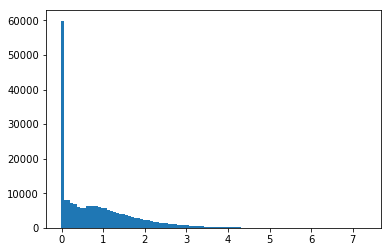

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

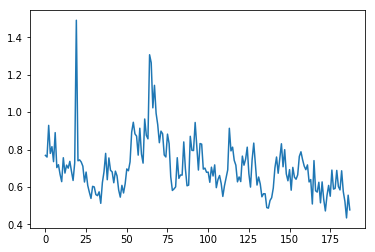

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.214058892904

 1.4579563851
1681

 0.214261266687

 1.48413042381
1682

 0.214489109706

 1.52131376664
1683

 0.214767263876

 1.4938763709
1684

 0.215535857673

 1.46478926148
1685

 0.216960127472

 1.4640817161
1686

 0.218592291478

 1.4277110531
1687

 0.218389792231

 1.41944461627
1688

 0.219296271203

 1.41228241819
1689

 0.219976412727

 1.41528645822
1690

 0.21958860283

 1.41095193334
1691

 0.219394384222

 1.43392191577
1692

 0.456481983338

 1.35357960305


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.855543


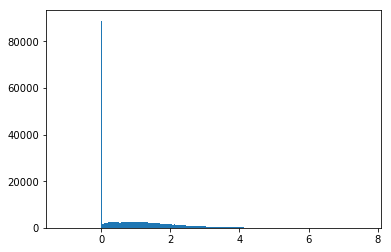

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.81446


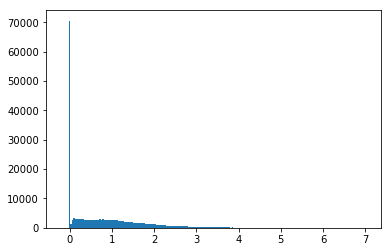

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.846315


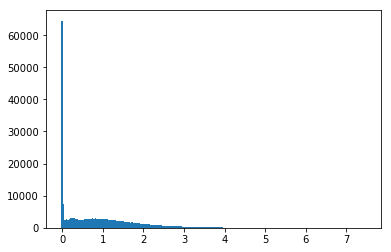

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.831095


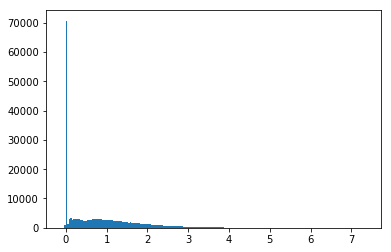

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21929627120345277

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21838979223125565

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21997641272709023

(54, 4100) 0.846315


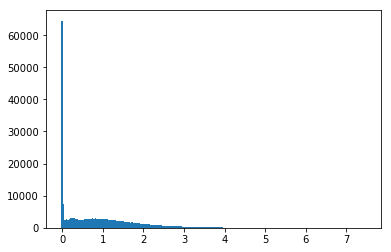

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True